In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
def non_zero(feature):
    count_all = 0
    count_non_zero = 0
    for i in feature:
        if i==0:
            count_all+=1
        else:
            count_non_zero +=1
            count_all+=1
    return int((count_non_zero/count_all)*100)

## Study 1674

In [3]:
rel_feature_table_1674 = pd.read_csv('1674-feature-table-rel.tsv', sep='\t')
rel_feature_table_1674.set_index('#OTU ID', inplace=True)
rel_feature_table_1674.head()

,1674.McG.F110714Ch1H1,1674.McG.F110714Ch1H2,1674.McG.F110714Ch1H3,1674.McG.F110714Ch1H4,1674.McG.F110714Ch1H5,1674.McG.F110714Ch1R1,1674.McG.F110714Ch1R2,1674.McG.F110714Ch1R3,1674.McG.F110714Ch1R4,1674.McG.F110714Ch1R5,...,1674.McG.P110718Gl3,1674.McG.P110718Nm1,1674.McG.P110718Nm2,1674.McG.P110718Nm3,1674.McG.P110718Sm1,1674.McG.P110718Sm2,1674.McG.P110718Sm3,1674.McG.P110718Wd1,1674.McG.P110718Wd2,1674.McG.P110718Wd3
#OTU ID,,,,,,,,,,,,,,,,,,,,,
ffdec27445e87a187122ce9abbe716c8,0.034258,0.025501,0.004041,0.008057,0.015086,0.033865,0.010282,0.006382,0.006651,0.016375,...,0.000441,0.001407,0.001055,0.000569,0.000000,0.000000,0.000000,0.0,0.000509,0.000729
79fefa5f25eae67650fc7fdd018d3ada,0.008991,0.005294,0.002632,0.020566,0.005641,0.007203,0.009092,0.009712,0.006360,0.006874,...,0.000992,0.002644,0.003004,0.001783,0.000000,0.001087,0.003400,0.0,0.001356,0.000000
a667438a0836bcd1fcd1f1dedd4cd93b,0.003324,0.005537,0.001520,0.006677,0.005000,0.010955,0.002809,0.002022,0.002162,0.005038,...,0.000257,0.000682,0.001867,0.000834,0.000793,0.000826,0.001241,0.0,0.000848,0.000307
bef5dba85921db1f647a8640059574d8,0.007158,0.006507,0.003856,0.008814,0.007094,0.006653,0.007807,0.010029,0.006236,0.006046,...,0.000000,0.001279,0.001867,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
eab7439b9bd3e0dd2136500b7558158a,0.004857,0.004041,0.009714,0.011040,0.009659,0.005903,0.006474,0.005510,0.008190,0.005758,...,0.000000,0.001663,0.000000,0.000796,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [4]:
metadata_1674 = pd.read_csv('1674_mapping_file.txt', sep='\t')
def soil_type(text):
    textList = text.split()
    return textList[1] + ' ' + textList[2][0:4]
metadata_1674['soil_type'] = metadata_1674['Description'].apply(soil_type)
metadata_1674.head()

,#SampleID,BarcodeSequence,LinkerPrimerSequence,center_name,center_project_name,experiment_design_description,illumina_technology,instrument_model,library_construction_protocol,linker,...,qiita_study_id,roof_park_name,sample_scientific_name,sample_taxid,sample_type,sampling_type,scientific_name,title,Description,soil_type
0,1674.McG.F110714Ch1R5,GCTCCTTAGAAG,GTGTGCCAGCMGCCGCGGTAA,ANL,Green roofs as biodiversity corridors in New Y...,"soil samples from parks and gardens in NY, NY",MiSeq,Illumina HiSeq 2000,"EMP V4 515f,806rbc protocol",GT,...,1674,Chelsea,soil metagenome,410658,soil,Fine Scale,soil metagenome,Green roofs as biodiversity corridors in New Y...,NYC green roofs soil in Manhattan,green roof
1,1674.McG.F110714Ch2H3,TATTCAGCGGAC,GTGTGCCAGCMGCCGCGGTAA,ANL,Green roofs as biodiversity corridors in New Y...,"soil samples from parks and gardens in NY, NY",MiSeq,Illumina HiSeq 2000,"EMP V4 515f,806rbc protocol",GT,...,1674,Chelsea,soil metagenome,410658,soil,Fine Scale,soil metagenome,Green roofs as biodiversity corridors in New Y...,NYC green roofs soil in Manhattan,green roof
2,1674.McG.F110714Ch2H4,GTTCCGGATTAG,GTGTGCCAGCMGCCGCGGTAA,ANL,Green roofs as biodiversity corridors in New Y...,"soil samples from parks and gardens in NY, NY",MiSeq,Illumina HiSeq 2000,"EMP V4 515f,806rbc protocol",GT,...,1674,Chelsea,soil metagenome,410658,soil,Fine Scale,soil metagenome,Green roofs as biodiversity corridors in New Y...,NYC green roofs soil in Manhattan,green roof
3,1674.McG.F110714Ch2R1,ATGTGCTGCTCG,GTGTGCCAGCMGCCGCGGTAA,ANL,Green roofs as biodiversity corridors in New Y...,"soil samples from parks and gardens in NY, NY",MiSeq,Illumina HiSeq 2000,"EMP V4 515f,806rbc protocol",GT,...,1674,Chelsea,soil metagenome,410658,soil,Fine Scale,soil metagenome,Green roofs as biodiversity corridors in New Y...,NYC green roofs soil in Manhattan,green roof
4,1674.McG.F110714Ch2R2,TACGTACGAAAC,GTGTGCCAGCMGCCGCGGTAA,ANL,Green roofs as biodiversity corridors in New Y...,"soil samples from parks and gardens in NY, NY",MiSeq,Illumina HiSeq 2000,"EMP V4 515f,806rbc protocol",GT,...,1674,Chelsea,soil metagenome,410658,soil,Fine Scale,soil metagenome,Green roofs as biodiversity corridors in New Y...,NYC green roofs soil in Manhattan,green roof


### Removing Rare Features/OTUs

In [5]:
rel_feature_table_1674['non_zero_percent'] = rel_feature_table_1674.apply(lambda 
                                                                          row: non_zero(row), axis=1) 
rel_feature_table_1674 = rel_feature_table_1674[rel_feature_table_1674.non_zero_percent > 20]
rel_feature_table_1674.drop('non_zero_percent', axis=1, inplace=True)
rel_feature_table_1674.head()

,1674.McG.F110714Ch1H1,1674.McG.F110714Ch1H2,1674.McG.F110714Ch1H3,1674.McG.F110714Ch1H4,1674.McG.F110714Ch1H5,1674.McG.F110714Ch1R1,1674.McG.F110714Ch1R2,1674.McG.F110714Ch1R3,1674.McG.F110714Ch1R4,1674.McG.F110714Ch1R5,...,1674.McG.P110718Gl3,1674.McG.P110718Nm1,1674.McG.P110718Nm2,1674.McG.P110718Nm3,1674.McG.P110718Sm1,1674.McG.P110718Sm2,1674.McG.P110718Sm3,1674.McG.P110718Wd1,1674.McG.P110718Wd2,1674.McG.P110718Wd3
#OTU ID,,,,,,,,,,,,,,,,,,,,,
ffdec27445e87a187122ce9abbe716c8,0.034258,0.025501,0.004041,0.008057,0.015086,0.033865,0.010282,0.006382,0.006651,0.016375,...,0.000441,0.001407,0.001055,0.000569,0.000000,0.000000,0.000000,0.0,0.000509,0.000729
79fefa5f25eae67650fc7fdd018d3ada,0.008991,0.005294,0.002632,0.020566,0.005641,0.007203,0.009092,0.009712,0.006360,0.006874,...,0.000992,0.002644,0.003004,0.001783,0.000000,0.001087,0.003400,0.0,0.001356,0.000000
a667438a0836bcd1fcd1f1dedd4cd93b,0.003324,0.005537,0.001520,0.006677,0.005000,0.010955,0.002809,0.002022,0.002162,0.005038,...,0.000257,0.000682,0.001867,0.000834,0.000793,0.000826,0.001241,0.0,0.000848,0.000307
bef5dba85921db1f647a8640059574d8,0.007158,0.006507,0.003856,0.008814,0.007094,0.006653,0.007807,0.010029,0.006236,0.006046,...,0.000000,0.001279,0.001867,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
eab7439b9bd3e0dd2136500b7558158a,0.004857,0.004041,0.009714,0.011040,0.009659,0.005903,0.006474,0.005510,0.008190,0.005758,...,0.000000,0.001663,0.000000,0.000796,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


#### Renormalize to get sum of features (here relative abundance) for each sample equal to one

In [6]:
rel_feature_table_1674 = rel_feature_table_1674.div(rel_feature_table_1674.sum(axis=1), axis=0)
#rel_feature_table_1674['sum'] = rel_feature_table_1674.sum(axis=1)
#rel_feature_table_1674.drop('sum', axis=1, inplace=True)

#### Transforming data (standardize) by coverting to z-score

In [7]:
rel_feature_table_1674_zscore = rel_feature_table_1674.apply(zscore)
rel_feature_table_1674_zscore.head()

C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


,1674.McG.F110714Ch1H1,1674.McG.F110714Ch1H2,1674.McG.F110714Ch1H3,1674.McG.F110714Ch1H4,1674.McG.F110714Ch1H5,1674.McG.F110714Ch1R1,1674.McG.F110714Ch1R2,1674.McG.F110714Ch1R3,1674.McG.F110714Ch1R4,1674.McG.F110714Ch1R5,...,1674.McG.P110718Gl3,1674.McG.P110718Nm1,1674.McG.P110718Nm2,1674.McG.P110718Nm3,1674.McG.P110718Sm1,1674.McG.P110718Sm2,1674.McG.P110718Sm3,1674.McG.P110718Wd1,1674.McG.P110718Wd2,1674.McG.P110718Wd3
#OTU ID,,,,,,,,,,,,,,,,,,,,,
ffdec27445e87a187122ce9abbe716c8,1.749084,1.271061,-0.205833,-0.082352,0.296977,1.604040,-0.110404,-0.284030,-0.178955,0.328957,...,-0.146181,-0.150974,-0.163599,-0.207157,-0.203847,-0.220727,-0.196661,-0.15391,-0.203589,-0.118497
79fefa5f25eae67650fc7fdd018d3ada,-0.013288,-0.305608,-0.252143,1.045996,-0.272354,-0.137973,-0.083438,0.015060,-0.115295,-0.255486,...,-0.036186,0.035612,0.111628,-0.015669,-0.203847,-0.051193,0.156767,-0.15391,-0.073415,-0.230058
a667438a0836bcd1fcd1f1dedd4cd93b,-0.531103,-0.311602,-0.323431,-0.122222,-0.345936,0.118857,-0.498589,-0.524052,-0.482076,-0.433366,...,-0.169041,-0.220434,-0.049739,-0.161787,-0.066442,-0.098959,-0.074719,-0.15391,-0.151355,-0.177434
bef5dba85921db1f647a8640059574d8,-0.099024,-0.111424,-0.151466,0.170084,-0.086815,-0.117389,-0.105580,0.120594,-0.061976,-0.263762,...,-0.212157,-0.119398,-0.007044,-0.277705,-0.203847,-0.220727,-0.196661,-0.15391,-0.263824,-0.230058
eab7439b9bd3e0dd2136500b7558158a,-0.225850,-0.287325,0.376505,0.587888,0.327162,-0.072426,-0.103426,-0.139555,0.288145,-0.176547,...,-0.212157,-0.014065,-0.279540,-0.118882,-0.203847,-0.220727,-0.196661,-0.15391,-0.263824,-0.230058


In [8]:
rel_feature_table_1674_transpose = rel_feature_table_1674_zscore.transpose()
rel_feature_table_1674_transpose.reset_index(inplace=True)
rel_feature_table_1674_transpose.head()

#OTU ID,index,ffdec27445e87a187122ce9abbe716c8,79fefa5f25eae67650fc7fdd018d3ada,a667438a0836bcd1fcd1f1dedd4cd93b,bef5dba85921db1f647a8640059574d8,eab7439b9bd3e0dd2136500b7558158a,4837e433f9f44527391672bd157c9d6d,bc47786135abd4fdff2f1144cdacd665,c5124f38c32d49527449e836f609e34b,a99635e1f164d23f3db9c07654eec02f,...,ed5ceaf11d7ddd3c69061169bd920a45,d7e4ac6ae00a87fac8e734f546174fb0,54acca42f90ac4db785a5ce0f2744d08,2f546fd66558fc5bcb667116675ce04a,9c2be9e818f0f125f66d667b698b5c04,e506659eea858e3b4e3b7e1df232cb42,f02af1d33354a1490111554a1bcce7f0,24d962bc261b10cb1240050d5bb40f89,b4d23eaa08f44da31b12552cc7c266da,a65e7f5b6c24a2aba7ca39b7fb4837c9
0,1674.McG.F110714Ch1H1,1.749084,-0.013288,-0.531103,-0.099024,-0.225850,0.298893,-0.809144,-0.479678,-0.809144,...,0.166919,1.041654,0.887936,-0.809144,-0.809144,-0.809144,-0.809144,-0.809144,-0.809144,0.686096
1,1674.McG.F110714Ch1H2,1.271061,-0.305608,-0.311602,-0.111424,-0.287325,0.296647,0.479815,-0.616920,-0.820288,...,-0.820288,0.464945,-0.820288,-0.820288,-0.820288,1.652685,1.231930,2.001365,-0.820288,-0.820288
2,1674.McG.F110714Ch1H3,-0.205833,-0.252143,-0.323431,-0.151466,0.376505,0.275158,-0.409077,0.574159,-0.409077,...,-0.409077,1.217811,1.778848,0.164452,1.649367,0.187183,-0.409077,-0.409077,-0.409077,0.175077
3,1674.McG.F110714Ch1H4,-0.082352,1.045996,-0.122222,0.170084,0.587888,-0.017110,0.030640,0.145457,-0.639355,...,-0.639355,-0.639355,-0.639355,-0.639355,1.398997,0.016690,-0.639355,-0.639355,0.758709,0.806774
4,1674.McG.F110714Ch1H5,0.296977,-0.272354,-0.345936,-0.086815,0.327162,-0.015138,-0.377672,-0.509013,-0.725656,...,-0.725656,0.397732,1.746549,1.056477,-0.725656,-0.725656,-0.725656,-0.725656,-0.725656,-0.725656


In [9]:
category_metadata_1674 = metadata_1674[['#SampleID', 'soil_type']]
category_metadata_1674.head()

,#SampleID,soil_type
0,1674.McG.F110714Ch1R5,green roof
1,1674.McG.F110714Ch2H3,green roof
2,1674.McG.F110714Ch2H4,green roof
3,1674.McG.F110714Ch2R1,green roof
4,1674.McG.F110714Ch2R2,green roof


In [10]:
rel_abundance_with_category_1674 = pd.merge(rel_feature_table_1674_transpose,category_metadata_1674, left_on = 'index', right_on='#SampleID')
rel_abundance_with_category_1674.set_index('#SampleID',inplace=True)
rel_abundance_with_category_1674.drop('index',axis=1, inplace=True)
rel_abundance_with_category_1674.head()

,ffdec27445e87a187122ce9abbe716c8,79fefa5f25eae67650fc7fdd018d3ada,a667438a0836bcd1fcd1f1dedd4cd93b,bef5dba85921db1f647a8640059574d8,eab7439b9bd3e0dd2136500b7558158a,4837e433f9f44527391672bd157c9d6d,bc47786135abd4fdff2f1144cdacd665,c5124f38c32d49527449e836f609e34b,a99635e1f164d23f3db9c07654eec02f,4703f69608c52b7eaf32fee24b5e906a,...,d7e4ac6ae00a87fac8e734f546174fb0,54acca42f90ac4db785a5ce0f2744d08,2f546fd66558fc5bcb667116675ce04a,9c2be9e818f0f125f66d667b698b5c04,e506659eea858e3b4e3b7e1df232cb42,f02af1d33354a1490111554a1bcce7f0,24d962bc261b10cb1240050d5bb40f89,b4d23eaa08f44da31b12552cc7c266da,a65e7f5b6c24a2aba7ca39b7fb4837c9,soil_type
#SampleID,,,,,,,,,,,,,,,,,,,,,
1674.McG.F110714Ch1H1,1.749084,-0.013288,-0.531103,-0.099024,-0.225850,0.298893,-0.809144,-0.479678,-0.809144,-0.340686,...,1.041654,0.887936,-0.809144,-0.809144,-0.809144,-0.809144,-0.809144,-0.809144,0.686096,green roof
1674.McG.F110714Ch1H2,1.271061,-0.305608,-0.311602,-0.111424,-0.287325,0.296647,0.479815,-0.616920,-0.820288,0.619196,...,0.464945,-0.820288,-0.820288,-0.820288,1.652685,1.231930,2.001365,-0.820288,-0.820288,green roof
1674.McG.F110714Ch1H3,-0.205833,-0.252143,-0.323431,-0.151466,0.376505,0.275158,-0.409077,0.574159,-0.409077,-0.312994,...,1.217811,1.778848,0.164452,1.649367,0.187183,-0.409077,-0.409077,-0.409077,0.175077,green roof
1674.McG.F110714Ch1H4,-0.082352,1.045996,-0.122222,0.170084,0.587888,-0.017110,0.030640,0.145457,-0.639355,0.867109,...,-0.639355,-0.639355,-0.639355,1.398997,0.016690,-0.639355,-0.639355,0.758709,0.806774,green roof
1674.McG.F110714Ch1H5,0.296977,-0.272354,-0.345936,-0.086815,0.327162,-0.015138,-0.377672,-0.509013,-0.725656,-0.192514,...,0.397732,1.746549,1.056477,-0.725656,-0.725656,-0.725656,-0.725656,-0.725656,-0.725656,green roof


In [11]:
rel_abundance_with_category_1674['soil_type'] = rel_abundance_with_category_1674['soil_type'].astype('category')
rel_abundance_with_category_1674['soil_type_num'] = rel_abundance_with_category_1674['soil_type'].cat.codes
rel_abundance_with_category_1674.head()

,ffdec27445e87a187122ce9abbe716c8,79fefa5f25eae67650fc7fdd018d3ada,a667438a0836bcd1fcd1f1dedd4cd93b,bef5dba85921db1f647a8640059574d8,eab7439b9bd3e0dd2136500b7558158a,4837e433f9f44527391672bd157c9d6d,bc47786135abd4fdff2f1144cdacd665,c5124f38c32d49527449e836f609e34b,a99635e1f164d23f3db9c07654eec02f,4703f69608c52b7eaf32fee24b5e906a,...,54acca42f90ac4db785a5ce0f2744d08,2f546fd66558fc5bcb667116675ce04a,9c2be9e818f0f125f66d667b698b5c04,e506659eea858e3b4e3b7e1df232cb42,f02af1d33354a1490111554a1bcce7f0,24d962bc261b10cb1240050d5bb40f89,b4d23eaa08f44da31b12552cc7c266da,a65e7f5b6c24a2aba7ca39b7fb4837c9,soil_type,soil_type_num
#SampleID,,,,,,,,,,,,,,,,,,,,,
1674.McG.F110714Ch1H1,1.749084,-0.013288,-0.531103,-0.099024,-0.225850,0.298893,-0.809144,-0.479678,-0.809144,-0.340686,...,0.887936,-0.809144,-0.809144,-0.809144,-0.809144,-0.809144,-0.809144,0.686096,green roof,0
1674.McG.F110714Ch1H2,1.271061,-0.305608,-0.311602,-0.111424,-0.287325,0.296647,0.479815,-0.616920,-0.820288,0.619196,...,-0.820288,-0.820288,-0.820288,1.652685,1.231930,2.001365,-0.820288,-0.820288,green roof,0
1674.McG.F110714Ch1H3,-0.205833,-0.252143,-0.323431,-0.151466,0.376505,0.275158,-0.409077,0.574159,-0.409077,-0.312994,...,1.778848,0.164452,1.649367,0.187183,-0.409077,-0.409077,-0.409077,0.175077,green roof,0
1674.McG.F110714Ch1H4,-0.082352,1.045996,-0.122222,0.170084,0.587888,-0.017110,0.030640,0.145457,-0.639355,0.867109,...,-0.639355,-0.639355,1.398997,0.016690,-0.639355,-0.639355,0.758709,0.806774,green roof,0
1674.McG.F110714Ch1H5,0.296977,-0.272354,-0.345936,-0.086815,0.327162,-0.015138,-0.377672,-0.509013,-0.725656,-0.192514,...,1.746549,1.056477,-0.725656,-0.725656,-0.725656,-0.725656,-0.725656,-0.725656,green roof,0


### Random Forest 1674

In [12]:
X_train_1674, X_test_1674, y_train_1674, y_test_1674 = train_test_split(
    rel_abundance_with_category_1674.drop(['soil_type', 'soil_type_num'], axis=1).dropna(), 
    rel_abundance_with_category_1674.dropna()['soil_type_num'], test_size=0.40, random_state=40)

rfc_1674 = RandomForestClassifier(n_estimators=502, random_state=np.random.seed(151), oob_score=True)
rfc_1674.fit(X_train_1674, y_train_1674)
rfc_pred_1674 = rfc_1674.predict(X_test_1674)

print(rfc_1674.oob_score_)

0.9666666666666667


In [13]:
print(confusion_matrix(y_test_1674,rfc_pred_1674))
print(classification_report(y_test_1674,rfc_pred_1674))

[[50  0]
 [ 3  8]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        50
           1       1.00      0.73      0.84        11

    accuracy                           0.95        61
   macro avg       0.97      0.86      0.91        61
weighted avg       0.95      0.95      0.95        61



In [14]:
accuracy_1674 = cross_val_score(rfc_1674, X_train_1674, y_train_1674, scoring='accuracy', cv = 10)
print(accuracy_1674.mean()*100)

96.63888888888887


### Feature selection

In [15]:
feature_names_1674 = rel_abundance_with_category_1674.drop(['soil_type', 'soil_type_num'], 
                                                      axis=1).columns
importances_1674 = rfc_1674.feature_importances_
std_1674 = np.std([tree.feature_importances_ for tree in rfc_1674.estimators_],
             axis=0)
indices_1674 = np.argsort(importances_1674)[::-1]
for i in range(20):
    print(str(i+1)+') ' , feature_names_1674[indices_1674[i]], 
          '(', importances_1674[indices_1674[i]], ')')

1)  402e6b453f35495ba41808ee3ff66042 ( 0.04436913388742486 )
2)  a99635e1f164d23f3db9c07654eec02f ( 0.04424620464506963 )
3)  6612b25e5570e7e51c3850d417657b02 ( 0.04116953910838147 )
4)  a9659abfa37b32ffde18297db3695eb4 ( 0.030091245782380135 )
5)  cbfa53f76b4ee926a08ecccee99a90c5 ( 0.03005261262372022 )
6)  ad329255e3b2cf0cc8d83addea921e6d ( 0.028826472039248707 )
7)  1cb0817324efa3c041bde3382bd6a353 ( 0.025734857544328485 )
8)  a32bb90e3a347c1d637e25fe0de1da62 ( 0.022341669825888397 )
9)  514d19c552fd160fa55822d3bde74dbc ( 0.020926733756930743 )
10)  0f581290a86914bd3a1ee88b75a36773 ( 0.020678710747294236 )
11)  439a63e608355cd7801dd13b51f86a79 ( 0.018381516494536912 )
12)  ff316ce1bedebf18920fbfe2b611cec7 ( 0.018174777642985727 )
13)  02cfe0f65445e2dc9dae8707aad367d2 ( 0.01702715766588975 )
14)  2fd65175c955b2c07c6844a2bb129472 ( 0.016759368223750022 )
15)  ecde4e723992d3c0d0e3874fe1e0f251 ( 0.01635637779814106 )
16)  47c0831001bb2e32e950fae5dd41586a ( 0.01585115311075025 )
17)  57a

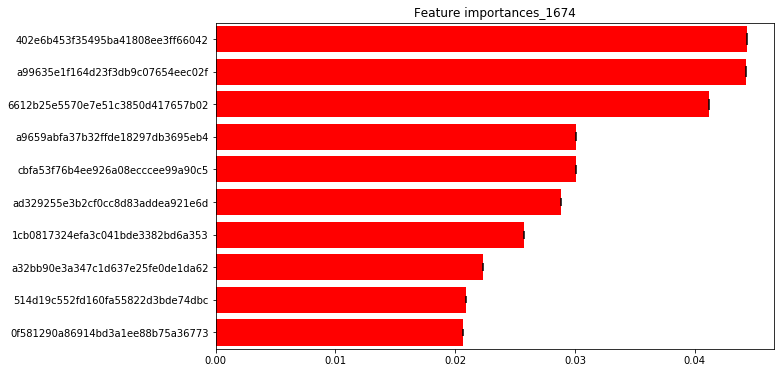

In [16]:
fig, ax = plt.subplots(figsize=(10,6))

plt.title("Feature importances_1674")
ax.barh(range(X_train_1674.shape[1]), importances_1674[indices_1674],
        color="r", yerr=std_1674[indices_1674])
plt.yticks(range(X_train_1674.shape[1]), [feature_names_1674[i] for i in indices_1674])
ax.set_ylim([-0.5,9.5])
ax.invert_yaxis() 
plt.show()

## Study 1041

In [17]:
rel_feature_table_1041 = pd.read_csv('1041-rel-feature-table.tsv', sep='\t')
rel_feature_table_1041.set_index('#OTU ID', inplace=True)
rel_feature_table_1041.head()

,1041.M028.10,1041.M028.100,1041.M028.10m.off.bottom,1041.M028.20,1041.M028.2m.off.bottom,1041.M028.5,1041.M028.50,1041.M041.10,1041.M041.100,1041.M041.10m.off.bottom,...,1041.S114.10,1041.S114.100,1041.S114.150,1041.S114.20,1041.S114.200,1041.S114.250,1041.S114.300,1041.S114.365,1041.S114.5,1041.S114.50
#OTU ID,,,,,,,,,,,,,,,,,,,,,
ec65e53e15427b35050b18856fa2f139,0.136529,0.138766,0.140891,0.187354,0.123489,0.143564,0.155012,0.152260,0.211450,0.193450,...,0.119440,0.168611,0.082488,0.096693,0.124688,0.103173,0.079899,0.098838,0.175877,0.107734
5e034a9ada2c176a66ca1ac6ac8d74c8,0.078762,0.057835,0.061371,0.049870,0.081305,0.062130,0.059704,0.121896,0.103402,0.123274,...,0.048213,0.069793,0.054072,0.067527,0.050578,0.048783,0.055619,0.048430,0.053889,0.060057
c9c610d91aeae3995f247fb1dec5c6ff,0.010816,0.005978,0.009125,0.005692,0.010417,0.007471,0.007867,0.024928,0.017384,0.020877,...,0.072721,0.062325,0.049598,0.055094,0.045891,0.075482,0.054917,0.070770,0.060836,0.084310
a7f0ed34c2694d74c40e88c75696b7d8,0.043148,0.045841,0.038239,0.044978,0.044225,0.041227,0.050607,0.030536,0.021752,0.025627,...,0.033458,0.036352,0.040859,0.031941,0.036314,0.034879,0.037802,0.040631,0.031515,0.040737
27876e23bb1763c292ce5ab9e1f1fc87,0.018795,0.022998,0.016014,0.019285,0.016366,0.013836,0.019159,0.008697,0.015082,0.012695,...,0.032993,0.029185,0.034499,0.031394,0.025497,0.026457,0.032502,0.029549,0.030327,0.035907


In [18]:
metadata_1041 = pd.read_csv('1041_mapping_file.txt', sep='\t')
metadata_1041.dropna(inplace=True)
def depth_range(depth):
    if int(depth) < 100:
        return 'Less than 100'
    elif int(depth) >= 100:
        return 'Greater than 100'
    
metadata_1041['depth_range'] = [depth_range(x) for x in metadata_1041['depth']]

metadata_1041.head()
metadata_1041['depth'].unique()

array([  5.,  10., 150., 200.,  20.,  50., 100., 250., 300., 365.])

### Removing Rare Features/OTUs

In [19]:
rel_feature_table_1041['non_zero_percent'] = rel_feature_table_1041.apply(lambda 
                                                                          row: non_zero(row), axis=1) 
rel_feature_table_1041 = rel_feature_table_1041[rel_feature_table_1041.non_zero_percent > 20]
rel_feature_table_1041.drop('non_zero_percent', axis=1, inplace=True)
rel_feature_table_1041.head()

,1041.M028.10,1041.M028.100,1041.M028.10m.off.bottom,1041.M028.20,1041.M028.2m.off.bottom,1041.M028.5,1041.M028.50,1041.M041.10,1041.M041.100,1041.M041.10m.off.bottom,...,1041.S114.10,1041.S114.100,1041.S114.150,1041.S114.20,1041.S114.200,1041.S114.250,1041.S114.300,1041.S114.365,1041.S114.5,1041.S114.50
#OTU ID,,,,,,,,,,,,,,,,,,,,,
ec65e53e15427b35050b18856fa2f139,0.136529,0.138766,0.140891,0.187354,0.123489,0.143564,0.155012,0.152260,0.211450,0.193450,...,0.119440,0.168611,0.082488,0.096693,0.124688,0.103173,0.079899,0.098838,0.175877,0.107734
5e034a9ada2c176a66ca1ac6ac8d74c8,0.078762,0.057835,0.061371,0.049870,0.081305,0.062130,0.059704,0.121896,0.103402,0.123274,...,0.048213,0.069793,0.054072,0.067527,0.050578,0.048783,0.055619,0.048430,0.053889,0.060057
c9c610d91aeae3995f247fb1dec5c6ff,0.010816,0.005978,0.009125,0.005692,0.010417,0.007471,0.007867,0.024928,0.017384,0.020877,...,0.072721,0.062325,0.049598,0.055094,0.045891,0.075482,0.054917,0.070770,0.060836,0.084310
a7f0ed34c2694d74c40e88c75696b7d8,0.043148,0.045841,0.038239,0.044978,0.044225,0.041227,0.050607,0.030536,0.021752,0.025627,...,0.033458,0.036352,0.040859,0.031941,0.036314,0.034879,0.037802,0.040631,0.031515,0.040737
27876e23bb1763c292ce5ab9e1f1fc87,0.018795,0.022998,0.016014,0.019285,0.016366,0.013836,0.019159,0.008697,0.015082,0.012695,...,0.032993,0.029185,0.034499,0.031394,0.025497,0.026457,0.032502,0.029549,0.030327,0.035907


#### Renormalize to get sum of features (here relative abundance) for each sample equal to one

In [20]:
rel_feature_table_1041 = rel_feature_table_1041.div(rel_feature_table_1041.sum(axis=1), axis=0)
#rel_feature_table_1041['sum'] = rel_feature_table_1041.sum(axis=1)
#rel_feature_table_1041.drop('sum', axis=1, inplace=True)

#### Transforming data (standardize) by coverting to z-score

In [21]:
rel_feature_table_1041_zscore = rel_feature_table_1041.apply(zscore)
rel_feature_table_1041_zscore.head()

,1041.M028.10,1041.M028.100,1041.M028.10m.off.bottom,1041.M028.20,1041.M028.2m.off.bottom,1041.M028.5,1041.M028.50,1041.M041.10,1041.M041.100,1041.M041.10m.off.bottom,...,1041.S114.10,1041.S114.100,1041.S114.150,1041.S114.20,1041.S114.200,1041.S114.250,1041.S114.300,1041.S114.365,1041.S114.5,1041.S114.50
#OTU ID,,,,,,,,,,,,,,,,,,,,,
ec65e53e15427b35050b18856fa2f139,0.220891,0.218278,0.172618,0.648504,0.035069,0.158516,0.292355,0.196568,0.572841,0.398846,...,-0.115920,0.485644,-0.390211,-0.281279,-0.077745,-0.099359,-0.399038,-0.152912,0.433506,-0.073302
5e034a9ada2c176a66ca1ac6ac8d74c8,0.262128,0.008860,0.008072,0.005663,0.169275,0.005914,0.013014,0.568780,0.446817,0.544292,...,-0.386465,0.119856,-0.288206,-0.113095,-0.301581,-0.211897,-0.252061,-0.233036,-0.144576,-0.063249
c9c610d91aeae3995f247fb1dec5c6ff,-0.458697,-0.527771,-0.457455,-0.480156,-0.480498,-0.439145,-0.492031,-0.219873,-0.264003,-0.231180,...,0.731051,0.656446,0.050833,0.173767,0.016769,0.855640,0.203695,0.683166,0.491724,1.181441
a7f0ed34c2694d74c40e88c75696b7d8,0.413715,0.450639,0.207216,0.553581,0.296445,0.232823,0.529517,0.008380,-0.099852,-0.059490,...,-0.037458,0.235477,0.099246,-0.110304,0.024242,0.137969,0.060420,0.265289,0.029399,0.345126
27876e23bb1763c292ce5ab9e1f1fc87,-0.059337,0.069266,-0.166830,0.043523,-0.199665,-0.209898,-0.063204,-0.392652,-0.144572,-0.230069,...,0.264806,0.284579,0.196197,0.109219,-0.061271,0.120429,0.176816,0.199779,0.250905,0.535471


In [22]:
rel_feature_table_1041_transpose = rel_feature_table_1041_zscore.transpose()
rel_feature_table_1041_transpose.reset_index(inplace=True)
rel_feature_table_1041_transpose.head()

#OTU ID,index,ec65e53e15427b35050b18856fa2f139,5e034a9ada2c176a66ca1ac6ac8d74c8,c9c610d91aeae3995f247fb1dec5c6ff,a7f0ed34c2694d74c40e88c75696b7d8,27876e23bb1763c292ce5ab9e1f1fc87,812352c932f739d2f4e5ee0bcbe1988b,11041309666bece56a926956c8f33678,ce462b206102332fe233d79794eefcb9,721780ca8920406834a7209cd7747446,...,a20a0bc5ff6fdddeb93f5eb0c980e02a,e61e605328b3d1042601cdf3172e3bd4,8048eeb4afb59409b068e4447066f7b0,040fadc1d4e92d4560ace9595bdaf345,c613023d9c576fa2095f3cc1a9687081,904881b0b4bdc4c77d37c2b4699e5846,fade3a725409c78167467293a8001270,af92d4cb52b8a8e4094e3695751fc16b,bc20cda4f2ca3e3d17e5d28dea9c34c9,a46755a98f04b4c155be4b1939a29049
0,1041.M028.10,0.220891,0.262128,-0.458697,0.413715,-0.059337,-0.501453,0.160521,-0.375099,1.994716,...,0.565281,3.086596,2.990428,-0.672455,-0.672455,-0.672455,-0.672455,-0.672455,-0.672455,-0.672455
1,1041.M028.100,0.218278,0.008860,-0.527771,0.450639,0.069266,-0.374709,-0.104367,-0.487443,3.040728,...,-0.639356,-0.639356,-0.639356,-0.639356,-0.639356,-0.639356,-0.639356,2.107411,-0.639356,1.851858
2,1041.M028.10m.off.bottom,0.172618,0.008072,-0.457455,0.207216,-0.166830,-0.428886,0.091701,-0.366585,1.742123,...,1.286866,-0.610686,2.197066,-0.610686,-0.610686,-0.610686,-0.610686,-0.610686,1.537544,-0.610686
3,1041.M028.20,0.648504,0.005663,-0.480156,0.553581,0.043523,-0.455383,0.023872,-0.489794,4.047960,...,0.839029,4.846736,-0.594189,-0.594189,-0.594189,-0.594189,-0.594189,-0.594189,-0.594189,-0.594189
4,1041.M028.2m.off.bottom,0.035069,0.169275,-0.480498,0.296445,-0.199665,-0.483591,-0.009909,-0.411839,1.441768,...,0.718855,-0.656771,4.092668,-0.656771,-0.656771,-0.656771,-0.656771,-0.656771,2.457937,1.482879


In [23]:
category_metadata_1041 = metadata_1041[['#SampleID', 'depth_range']]
category_metadata_1041.head()

,#SampleID,depth_range
0,1041.M028.5,Less than 100
1,1041.M028.10,Less than 100
2,1041.M041.10,Less than 100
4,1041.S008.5,Less than 100
6,1041.S019.150,Greater than 100


In [24]:
rel_abundance_with_category_1041 = pd.merge(rel_feature_table_1041_transpose,category_metadata_1041, 
                                            left_on = 'index', right_on='#SampleID')
rel_abundance_with_category_1041.set_index('#SampleID',inplace=True)
rel_abundance_with_category_1041.drop('index',axis=1, inplace=True)
rel_abundance_with_category_1041.head()

,ec65e53e15427b35050b18856fa2f139,5e034a9ada2c176a66ca1ac6ac8d74c8,c9c610d91aeae3995f247fb1dec5c6ff,a7f0ed34c2694d74c40e88c75696b7d8,27876e23bb1763c292ce5ab9e1f1fc87,812352c932f739d2f4e5ee0bcbe1988b,11041309666bece56a926956c8f33678,ce462b206102332fe233d79794eefcb9,721780ca8920406834a7209cd7747446,b6a2d8f963b9a927215f9180634e321b,...,e61e605328b3d1042601cdf3172e3bd4,8048eeb4afb59409b068e4447066f7b0,040fadc1d4e92d4560ace9595bdaf345,c613023d9c576fa2095f3cc1a9687081,904881b0b4bdc4c77d37c2b4699e5846,fade3a725409c78167467293a8001270,af92d4cb52b8a8e4094e3695751fc16b,bc20cda4f2ca3e3d17e5d28dea9c34c9,a46755a98f04b4c155be4b1939a29049,depth_range
#SampleID,,,,,,,,,,,,,,,,,,,,,
1041.M028.10,0.220891,0.262128,-0.458697,0.413715,-0.059337,-0.501453,0.160521,-0.375099,1.994716,-0.327393,...,3.086596,2.990428,-0.672455,-0.672455,-0.672455,-0.672455,-0.672455,-0.672455,-0.672455,Less than 100
1041.M028.100,0.218278,0.008860,-0.527771,0.450639,0.069266,-0.374709,-0.104367,-0.487443,3.040728,-0.405680,...,-0.639356,-0.639356,-0.639356,-0.639356,-0.639356,-0.639356,2.107411,-0.639356,1.851858,Greater than 100
1041.M028.20,0.648504,0.005663,-0.480156,0.553581,0.043523,-0.455383,0.023872,-0.489794,4.047960,-0.311095,...,4.846736,-0.594189,-0.594189,-0.594189,-0.594189,-0.594189,-0.594189,-0.594189,-0.594189,Less than 100
1041.M028.5,0.158516,0.005914,-0.439145,0.232823,-0.209898,-0.374531,-0.041576,-0.395054,1.885253,-0.395314,...,2.966411,-0.550602,-0.550602,-0.550602,-0.550602,-0.550602,-0.550602,-0.550602,3.652238,Less than 100
1041.M028.50,0.292355,0.013014,-0.492031,0.529517,-0.063204,-0.468856,0.048646,-0.393110,1.707253,-0.309048,...,-0.634033,1.766249,-0.634033,-0.634033,-0.634033,-0.634033,-0.634033,3.038910,-0.634033,Less than 100


In [25]:
rel_abundance_with_category_1041['depth_range'] = rel_abundance_with_category_1041['depth_range'].astype('category')
rel_abundance_with_category_1041['depth_range_num'] = rel_abundance_with_category_1041['depth_range'].cat.codes
rel_abundance_with_category_1041.head()

,ec65e53e15427b35050b18856fa2f139,5e034a9ada2c176a66ca1ac6ac8d74c8,c9c610d91aeae3995f247fb1dec5c6ff,a7f0ed34c2694d74c40e88c75696b7d8,27876e23bb1763c292ce5ab9e1f1fc87,812352c932f739d2f4e5ee0bcbe1988b,11041309666bece56a926956c8f33678,ce462b206102332fe233d79794eefcb9,721780ca8920406834a7209cd7747446,b6a2d8f963b9a927215f9180634e321b,...,8048eeb4afb59409b068e4447066f7b0,040fadc1d4e92d4560ace9595bdaf345,c613023d9c576fa2095f3cc1a9687081,904881b0b4bdc4c77d37c2b4699e5846,fade3a725409c78167467293a8001270,af92d4cb52b8a8e4094e3695751fc16b,bc20cda4f2ca3e3d17e5d28dea9c34c9,a46755a98f04b4c155be4b1939a29049,depth_range,depth_range_num
#SampleID,,,,,,,,,,,,,,,,,,,,,
1041.M028.10,0.220891,0.262128,-0.458697,0.413715,-0.059337,-0.501453,0.160521,-0.375099,1.994716,-0.327393,...,2.990428,-0.672455,-0.672455,-0.672455,-0.672455,-0.672455,-0.672455,-0.672455,Less than 100,1
1041.M028.100,0.218278,0.008860,-0.527771,0.450639,0.069266,-0.374709,-0.104367,-0.487443,3.040728,-0.405680,...,-0.639356,-0.639356,-0.639356,-0.639356,-0.639356,2.107411,-0.639356,1.851858,Greater than 100,0
1041.M028.20,0.648504,0.005663,-0.480156,0.553581,0.043523,-0.455383,0.023872,-0.489794,4.047960,-0.311095,...,-0.594189,-0.594189,-0.594189,-0.594189,-0.594189,-0.594189,-0.594189,-0.594189,Less than 100,1
1041.M028.5,0.158516,0.005914,-0.439145,0.232823,-0.209898,-0.374531,-0.041576,-0.395054,1.885253,-0.395314,...,-0.550602,-0.550602,-0.550602,-0.550602,-0.550602,-0.550602,-0.550602,3.652238,Less than 100,1
1041.M028.50,0.292355,0.013014,-0.492031,0.529517,-0.063204,-0.468856,0.048646,-0.393110,1.707253,-0.309048,...,1.766249,-0.634033,-0.634033,-0.634033,-0.634033,-0.634033,3.038910,-0.634033,Less than 100,1


## Random Forest 1041

In [26]:
X_train_1041, X_test_1041, y_train_1041, y_test_1041 = train_test_split(
    rel_abundance_with_category_1041.drop(['depth_range', 'depth_range_num'], axis=1).dropna(), 
    rel_abundance_with_category_1041.dropna()['depth_range_num'], test_size=0.40, random_state=40)

rfc_1041 = RandomForestClassifier(n_estimators=501, random_state=np.random.seed(151), oob_score=True)
rfc_1041.fit(X_train_1041, y_train_1041)
rfc_pred_1041 = rfc_1041.predict(X_test_1041)

print(rfc_1041.oob_score_)

0.6086956521739131


In [27]:
print(confusion_matrix(y_test_1041,rfc_pred_1041))
print(classification_report(y_test_1041,rfc_pred_1041))

[[1 5]
 [5 5]]
              precision    recall  f1-score   support

           0       0.17      0.17      0.17         6
           1       0.50      0.50      0.50        10

    accuracy                           0.38        16
   macro avg       0.33      0.33      0.33        16
weighted avg       0.38      0.38      0.38        16



In [28]:
accuracy_1041 = cross_val_score(rfc_1041, X_train_1041, y_train_1041, scoring='accuracy', cv = 10)
print(accuracy_1041.mean()*100)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


70.0


### Feature Selection

In [29]:
feature_names_1041 = rel_abundance_with_category_1041.drop(['depth_range', 'depth_range_num'], 
                                                      axis=1).columns
importances_1041 = rfc_1041.feature_importances_
std_1041 = np.std([tree.feature_importances_ for tree in rfc_1041.estimators_],
             axis=0)
indices_1041 = np.argsort(importances_1041)[::-1]
for i in range(20):
    print(str(i+1)+') ' , feature_names_1041[indices_1041[i]], 
          '(', importances_1041[indices_1041[i]], ')')

1)  4c30f04a3c1ee307e2d833024d3d040f ( 0.016986665670560737 )
2)  9126211bbb719dfe488a3e94aa893334 ( 0.013760380448239379 )
3)  969da04da40d8494553b91ced4ea61cc ( 0.013343721093745778 )
4)  de9639e77631be6cc80d7042fcfc7556 ( 0.012535763818075354 )
5)  0095349217d500bf6ab7c2eb786b333d ( 0.012491490474960407 )
6)  b62ca2226505036f5cc800c296a7748f ( 0.010409732852347624 )
7)  cbac518b6738b085764913800ef6d9d9 ( 0.009865826735579876 )
8)  55a57a225f25d74efbe9fd47bf3c8fe9 ( 0.008067128822012245 )
9)  596d2d6939c769a9218375c3a2364ced ( 0.007992967966176628 )
10)  d2102bc024f86a1942cf2b33a44964b4 ( 0.007558772753944722 )
11)  b541cd9df82f3c443f30cf66cbcf25b5 ( 0.007518434674539133 )
12)  b29b4e1dd2f69a14202f20f63ae40400 ( 0.007436867043503971 )
13)  856b611db66223dd0fd95e1091e190cf ( 0.007105066885506009 )
14)  e8357e625c4762a294ee06e15ff89465 ( 0.00674330512623466 )
15)  43cb4c17435e5dddfb346509953f96a0 ( 0.006686721806662525 )
16)  3defec9bfd03c4f185ef92efc939ade8 ( 0.006419527735022989 )
17

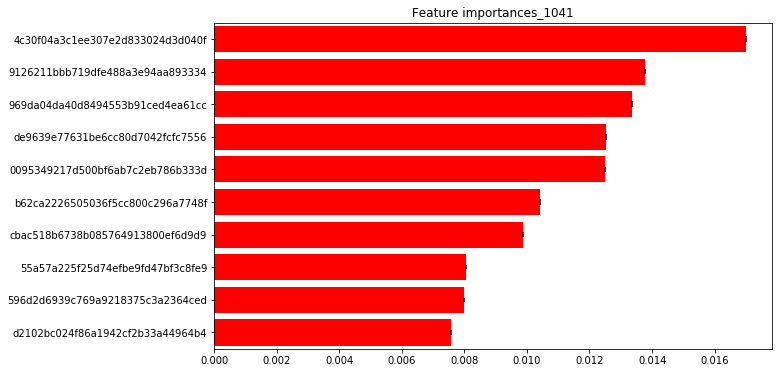

In [30]:
fig, ax = plt.subplots(figsize=(10,6))

plt.title("Feature importances_1041")
ax.barh(range(X_train_1041.shape[1]), importances_1041[indices_1041],
        color="r", yerr=std_1041[indices_1041])
plt.yticks(range(X_train_1041.shape[1]), [feature_names_1041[i] for i in indices_1041])
ax.set_ylim([-0.5,9.5])
ax.invert_yaxis() 
plt.show()

## Study 2080

In [31]:
rel_feature_table_2080 = pd.read_csv('2080-rel-feature-table.tsv', sep='\t')
rel_feature_table_2080.set_index('#OTU ID', inplace=True)
rel_feature_table_2080.head()

,2080.S16D2165,2080.S16D40,2080.S16D4611,2080.S16D765,2080.S16D90,2080.S24D2085,2080.S24D35,2080.S24D365,2080.S24D4898,2080.S24D85,...,2080.S63D435,2080.S63D60.85,2080.S71D2500,2080.S71D350.400,2080.S71D4336,2080.S71D62,2080.S79D240,2080.S79D5,2080.S79D740,2080.S79D97
#OTU ID,,,,,,,,,,,,,,,,,,,,,
2f80980eb77ae5369075aa0b127be74a,0.304310,0.034600,0.071180,0.144620,0.064656,0.122290,0.013854,0.113325,0.087390,0.068432,...,0.148580,0.018193,0.033670,0.065075,0.199545,0.052483,0.049899,0.006303,0.084966,0.006449
953ec5a9b78e897fc2aad9734d7a7972,0.035428,0.027518,0.010178,0.034146,0.012083,0.080219,0.004595,0.019964,0.009538,0.017820,...,0.035967,0.016458,0.186285,0.018017,0.061035,0.007116,0.013234,0.002737,0.085912,0.047483
d588c5e361aca6c5853b6372d668343d,0.009624,0.000000,0.000000,0.000000,0.000000,0.012919,0.000415,0.003376,0.000000,0.000824,...,0.018422,0.003284,0.014404,0.012158,0.130391,0.007008,0.029536,0.001168,0.006088,0.009089
9af2d1b921c255c00dbe6e21b67ff5a7,0.000000,0.204131,0.000464,0.000300,0.000000,0.000000,0.160891,0.000367,0.000528,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
b5106330fdfe2c83e0c80a9b37465df8,0.003034,0.000000,0.001923,0.054853,0.000000,0.003551,0.000000,0.063672,0.006798,0.000000,...,0.055039,0.018525,0.001359,0.119787,0.005096,0.051809,0.191235,0.023922,0.070810,0.166777


In [32]:
metadata_2080 = pd.read_csv('2080_mapping_file.txt', sep='\t')
metadata_2080.head()

,#SampleID,BarcodeSequence,LinkerPrimerSequence,center_name,center_project_name,experiment_design_description,illumina_technology,instrument_model,library_construction_protocol,linker,...,silicate,silicate_range,temp,temp_range,temperature_deg_c,title,tot_carb,tot_carb_range,tot_depth_water_col,Description
0,2080.S16D2165,GATCATTCTCTC,GTGTGCCAGCMGCCGCGGTAA,ANL,Seyler_North_Atlantic_water_column,"In April-May 2012, we participated in a resear...",MiSeq,Illumina HiSeq 2000,"EMP V4 515f,806rbc protocol",GT,...,16.65,16.65,3.4789,3.4789,3.4789,Seyler_North_Atlantic_water_column,2161.0,2161,4625,S16D2165 0.2um filtered sea water
1,2080.S16D40,ATTATCGTCCCT,GTGTGCCAGCMGCCGCGGTAA,ANL,Seyler_North_Atlantic_water_column,"In April-May 2012, we participated in a resear...",MiSeq,Illumina HiSeq 2000,"EMP V4 515f,806rbc protocol",GT,...,0.49,0.49,27.5977,27.5977,27.5977,Seyler_North_Atlantic_water_column,2017.2,2017.2,4625,S16D40 0.2um filtered sea water
2,2080.S16D4611,TCTGAGGTTGCC,GTGTGCCAGCMGCCGCGGTAA,ANL,Seyler_North_Atlantic_water_column,"In April-May 2012, we participated in a resear...",MiSeq,Illumina HiSeq 2000,"EMP V4 515f,806rbc protocol",GT,...,44.75,44.75,2.1390,2.139,2.1390,Seyler_North_Atlantic_water_column,2189.0,2189,4625,S16D4611 0.2um filtered sea water
3,2080.S16D765,AGACATACCGTA,GTGTGCCAGCMGCCGCGGTAA,ANL,Seyler_North_Atlantic_water_column,"In April-May 2012, we participated in a resear...",MiSeq,Illumina HiSeq 2000,"EMP V4 515f,806rbc protocol",GT,...,24.99,24.99,6.0080,6.008,6.0080,Seyler_North_Atlantic_water_column,2219.9,2219.9,4625,S16D765 0.2um filtered sea water
4,2080.S16D90,GATCCTCATGCG,GTGTGCCAGCMGCCGCGGTAA,ANL,Seyler_North_Atlantic_water_column,"In April-May 2012, we participated in a resear...",MiSeq,Illumina HiSeq 2000,"EMP V4 515f,806rbc protocol",GT,...,1.90,1.9,24.6294,24.6294,24.6294,Seyler_North_Atlantic_water_column,2083.0,2083,4625,S16D90 0.2um filtered sea water


### Removing Rare Features/OTUs

In [33]:
rel_feature_table_2080['non_zero_percent'] = rel_feature_table_2080.apply(lambda 
                                                                          row: non_zero(row), axis=1)
rel_feature_table_2080 = rel_feature_table_2080[rel_feature_table_2080.non_zero_percent > 20]
rel_feature_table_2080.drop('non_zero_percent', axis=1, inplace=True)
rel_feature_table_2080.head()

,2080.S16D2165,2080.S16D40,2080.S16D4611,2080.S16D765,2080.S16D90,2080.S24D2085,2080.S24D35,2080.S24D365,2080.S24D4898,2080.S24D85,...,2080.S63D435,2080.S63D60.85,2080.S71D2500,2080.S71D350.400,2080.S71D4336,2080.S71D62,2080.S79D240,2080.S79D5,2080.S79D740,2080.S79D97
#OTU ID,,,,,,,,,,,,,,,,,,,,,
2f80980eb77ae5369075aa0b127be74a,0.304310,0.034600,0.071180,0.144620,0.064656,0.122290,0.013854,0.113325,0.087390,0.068432,...,0.148580,0.018193,0.033670,0.065075,0.199545,0.052483,0.049899,0.006303,0.084966,0.006449
953ec5a9b78e897fc2aad9734d7a7972,0.035428,0.027518,0.010178,0.034146,0.012083,0.080219,0.004595,0.019964,0.009538,0.017820,...,0.035967,0.016458,0.186285,0.018017,0.061035,0.007116,0.013234,0.002737,0.085912,0.047483
d588c5e361aca6c5853b6372d668343d,0.009624,0.000000,0.000000,0.000000,0.000000,0.012919,0.000415,0.003376,0.000000,0.000824,...,0.018422,0.003284,0.014404,0.012158,0.130391,0.007008,0.029536,0.001168,0.006088,0.009089
9af2d1b921c255c00dbe6e21b67ff5a7,0.000000,0.204131,0.000464,0.000300,0.000000,0.000000,0.160891,0.000367,0.000528,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
b5106330fdfe2c83e0c80a9b37465df8,0.003034,0.000000,0.001923,0.054853,0.000000,0.003551,0.000000,0.063672,0.006798,0.000000,...,0.055039,0.018525,0.001359,0.119787,0.005096,0.051809,0.191235,0.023922,0.070810,0.166777


#### Renormalize to get sum of features (here relative abundance) for each sample equal to one

In [34]:
rel_feature_table_2080 = rel_feature_table_2080.div(rel_feature_table_2080.sum(axis=1), axis=0)
#rel_feature_table_2080['sum'] = rel_feature_table_2080.sum(axis=1)
#rel_feature_table_2080.drop('sum', axis=1, inplace=True)

#### Transforming data (standardize) by coverting to z-score

In [35]:
rel_feature_table_2080_zscore = rel_feature_table_2080.apply(zscore)
rel_feature_table_2080_zscore.head()

,2080.S16D2165,2080.S16D40,2080.S16D4611,2080.S16D765,2080.S16D90,2080.S24D2085,2080.S24D35,2080.S24D365,2080.S24D4898,2080.S24D85,...,2080.S63D435,2080.S63D60.85,2080.S71D2500,2080.S71D350.400,2080.S71D4336,2080.S71D62,2080.S79D240,2080.S79D5,2080.S79D740,2080.S79D97
#OTU ID,,,,,,,,,,,,,,,,,,,,,
2f80980eb77ae5369075aa0b127be74a,0.032068,-0.387332,-0.391873,-0.157254,-0.373807,-0.335102,-0.404150,-0.192845,-0.326768,-0.306148,...,-0.246120,-0.196828,-0.255006,-0.423430,0.070005,-0.246320,-0.355953,-0.158898,-0.235335,-0.427736
953ec5a9b78e897fc2aad9734d7a7972,-0.237134,-0.190492,-0.423815,-0.122515,-0.387432,0.040048,-0.391201,-0.240061,-0.386427,-0.281686,...,-0.203919,-0.035969,1.622227,-0.379946,0.235467,-0.296594,-0.328642,-0.142007,0.608431,0.450721
d588c5e361aca6c5853b6372d668343d,-0.453839,-0.460657,-0.486501,-0.527457,-0.475336,-0.415513,-0.424433,-0.408877,-0.447442,-0.417044,...,-0.363987,-0.198743,-0.157477,-0.424103,1.054803,-0.285311,-0.098701,-0.159102,-0.376905,-0.255016
9af2d1b921c255c00dbe6e21b67ff5a7,-0.552329,2.819836,-0.481821,-0.521631,-0.475336,-0.519090,1.696933,-0.443341,-0.441913,-0.424648,...,-0.593529,-0.247237,-0.331217,-0.577275,-0.326750,-0.381528,-0.475365,-0.175601,-0.464349,-0.454267
b5106330fdfe2c83e0c80a9b37465df8,-0.492164,-0.460657,-0.460101,0.922635,-0.475336,-0.463917,-0.428281,1.040400,-0.350493,-0.424648,...,0.735495,0.282838,-0.299453,2.347260,-0.222114,0.996849,4.250731,0.479019,1.506662,6.631277


In [36]:
rel_feature_table_2080_transpose = rel_feature_table_2080_zscore.transpose()
rel_feature_table_2080_transpose.reset_index(inplace=True)
rel_feature_table_2080_transpose.head()

#OTU ID,index,2f80980eb77ae5369075aa0b127be74a,953ec5a9b78e897fc2aad9734d7a7972,d588c5e361aca6c5853b6372d668343d,9af2d1b921c255c00dbe6e21b67ff5a7,b5106330fdfe2c83e0c80a9b37465df8,0364841e30b0a2f78df7f6ac7dfa740d,2993ee81a46c4564f7c589027be55520,d8a411e0b99818bc8dcb8a989b8f03af,6fee021cf468e0067229e9eff1878da5,...,6d6ef2ece400571b01f596f6ae756ca6,8739547c832629f0407f3e85e51a91b7,d362f13afb247bdffa6e37140d3a80a5,36f61ec531777b240efddeb06a885cba,11299309d9de91e0257b3b4c4c37a27b,a9cb3f4daaf6da8d2a37d007a8a24835,b341cf2e10ac80104b91bf0d051f2008,08c6aafb8c80d154384abc1058292628,1011c9fa61ba6e76a3f813e8d3d7976b,431388fc3a6b4ee5f1a0898be0ed1a6b
0,2080.S16D2165,0.032068,-0.237134,-0.453839,-0.552329,-0.492164,0.897857,-0.367430,-0.552329,-0.361411,...,-0.552329,-0.552329,1.348720,-0.552329,-0.028340,2.125600,5.034822,-0.499586,-0.552329,0.112114
1,2080.S16D40,-0.387332,-0.190492,-0.460657,2.819836,-0.460657,-0.460657,-0.402123,-0.460657,-0.460657,...,-0.460657,-0.460657,-0.460657,-0.460657,1.986078,-0.460657,-0.460657,-0.460657,-0.460657,-0.460657
2,2080.S16D4611,-0.391873,-0.423815,-0.486501,-0.481821,-0.460101,0.402980,-0.403995,-0.486501,-0.148272,...,1.686014,0.706845,-0.486501,3.190060,-0.141623,4.213639,0.317917,-0.486501,-0.486501,-0.486501
3,2080.S16D765,-0.157254,-0.122515,-0.527457,-0.521631,0.922635,0.922322,-0.050085,-0.494691,-0.391579,...,-0.527457,0.820724,-0.527457,-0.527457,-0.527457,-0.527457,-0.527457,-0.493842,-0.527457,-0.527457
4,2080.S16D90,-0.373807,-0.387432,-0.475336,-0.475336,-0.475336,-0.475336,-0.346256,-0.475336,-0.432403,...,-0.475336,-0.475336,-0.475336,-0.475336,0.144848,-0.475336,-0.475336,-0.419154,-0.475336,-0.475336


In [37]:
category_metadata_2080 = metadata_2080[['#SampleID', 'env_feature']]
category_metadata_2080.head()

,#SampleID,env_feature
0,2080.S16D2165,abyssalpelagic zone
1,2080.S16D40,photic zone
2,2080.S16D4611,abyssalpelagic zone
3,2080.S16D765,bathypelagic zone
4,2080.S16D90,photic zone


In [38]:
rel_abundance_with_category_2080 = pd.merge(rel_feature_table_2080_transpose,category_metadata_2080, left_on = 'index', right_on='#SampleID')
rel_abundance_with_category_2080.set_index('#SampleID',inplace=True)
rel_abundance_with_category_2080.drop('index',axis=1, inplace=True)
rel_abundance_with_category_2080.head()

,2f80980eb77ae5369075aa0b127be74a,953ec5a9b78e897fc2aad9734d7a7972,d588c5e361aca6c5853b6372d668343d,9af2d1b921c255c00dbe6e21b67ff5a7,b5106330fdfe2c83e0c80a9b37465df8,0364841e30b0a2f78df7f6ac7dfa740d,2993ee81a46c4564f7c589027be55520,d8a411e0b99818bc8dcb8a989b8f03af,6fee021cf468e0067229e9eff1878da5,09fc0204f283937a3a329591f65700a2,...,8739547c832629f0407f3e85e51a91b7,d362f13afb247bdffa6e37140d3a80a5,36f61ec531777b240efddeb06a885cba,11299309d9de91e0257b3b4c4c37a27b,a9cb3f4daaf6da8d2a37d007a8a24835,b341cf2e10ac80104b91bf0d051f2008,08c6aafb8c80d154384abc1058292628,1011c9fa61ba6e76a3f813e8d3d7976b,431388fc3a6b4ee5f1a0898be0ed1a6b,env_feature
#SampleID,,,,,,,,,,,,,,,,,,,,,
2080.S16D2165,0.032068,-0.237134,-0.453839,-0.552329,-0.492164,0.897857,-0.367430,-0.552329,-0.361411,-0.552329,...,-0.552329,1.348720,-0.552329,-0.028340,2.125600,5.034822,-0.499586,-0.552329,0.112114,abyssalpelagic zone
2080.S16D40,-0.387332,-0.190492,-0.460657,2.819836,-0.460657,-0.460657,-0.402123,-0.460657,-0.460657,-0.460657,...,-0.460657,-0.460657,-0.460657,1.986078,-0.460657,-0.460657,-0.460657,-0.460657,-0.460657,photic zone
2080.S16D4611,-0.391873,-0.423815,-0.486501,-0.481821,-0.460101,0.402980,-0.403995,-0.486501,-0.148272,-0.486501,...,0.706845,-0.486501,3.190060,-0.141623,4.213639,0.317917,-0.486501,-0.486501,-0.486501,abyssalpelagic zone
2080.S16D765,-0.157254,-0.122515,-0.527457,-0.521631,0.922635,0.922322,-0.050085,-0.494691,-0.391579,-0.527457,...,0.820724,-0.527457,-0.527457,-0.527457,-0.527457,-0.527457,-0.493842,-0.527457,-0.527457,bathypelagic zone
2080.S16D90,-0.373807,-0.387432,-0.475336,-0.475336,-0.475336,-0.475336,-0.346256,-0.475336,-0.432403,-0.475336,...,-0.475336,-0.475336,-0.475336,0.144848,-0.475336,-0.475336,-0.419154,-0.475336,-0.475336,photic zone


In [39]:
rel_abundance_with_category_2080['env_feature'] = rel_abundance_with_category_2080['env_feature'].astype('category')
rel_abundance_with_category_2080['env_feature_num'] = rel_abundance_with_category_2080['env_feature'].cat.codes
rel_abundance_with_category_2080.head()

,2f80980eb77ae5369075aa0b127be74a,953ec5a9b78e897fc2aad9734d7a7972,d588c5e361aca6c5853b6372d668343d,9af2d1b921c255c00dbe6e21b67ff5a7,b5106330fdfe2c83e0c80a9b37465df8,0364841e30b0a2f78df7f6ac7dfa740d,2993ee81a46c4564f7c589027be55520,d8a411e0b99818bc8dcb8a989b8f03af,6fee021cf468e0067229e9eff1878da5,09fc0204f283937a3a329591f65700a2,...,d362f13afb247bdffa6e37140d3a80a5,36f61ec531777b240efddeb06a885cba,11299309d9de91e0257b3b4c4c37a27b,a9cb3f4daaf6da8d2a37d007a8a24835,b341cf2e10ac80104b91bf0d051f2008,08c6aafb8c80d154384abc1058292628,1011c9fa61ba6e76a3f813e8d3d7976b,431388fc3a6b4ee5f1a0898be0ed1a6b,env_feature,env_feature_num
#SampleID,,,,,,,,,,,,,,,,,,,,,
2080.S16D2165,0.032068,-0.237134,-0.453839,-0.552329,-0.492164,0.897857,-0.367430,-0.552329,-0.361411,-0.552329,...,1.348720,-0.552329,-0.028340,2.125600,5.034822,-0.499586,-0.552329,0.112114,abyssalpelagic zone,0
2080.S16D40,-0.387332,-0.190492,-0.460657,2.819836,-0.460657,-0.460657,-0.402123,-0.460657,-0.460657,-0.460657,...,-0.460657,-0.460657,1.986078,-0.460657,-0.460657,-0.460657,-0.460657,-0.460657,photic zone,4
2080.S16D4611,-0.391873,-0.423815,-0.486501,-0.481821,-0.460101,0.402980,-0.403995,-0.486501,-0.148272,-0.486501,...,-0.486501,3.190060,-0.141623,4.213639,0.317917,-0.486501,-0.486501,-0.486501,abyssalpelagic zone,0
2080.S16D765,-0.157254,-0.122515,-0.527457,-0.521631,0.922635,0.922322,-0.050085,-0.494691,-0.391579,-0.527457,...,-0.527457,-0.527457,-0.527457,-0.527457,-0.527457,-0.493842,-0.527457,-0.527457,bathypelagic zone,1
2080.S16D90,-0.373807,-0.387432,-0.475336,-0.475336,-0.475336,-0.475336,-0.346256,-0.475336,-0.432403,-0.475336,...,-0.475336,-0.475336,0.144848,-0.475336,-0.475336,-0.419154,-0.475336,-0.475336,photic zone,4


### Random Forest 2080

In [40]:
X_train_2080, X_test_2080, y_train_2080, y_test_2080 = train_test_split(
    rel_abundance_with_category_2080.drop(['env_feature', 'env_feature_num'], axis=1), 
    rel_abundance_with_category_2080['env_feature_num'], test_size=0.40, random_state=40)

rfc_2080 = RandomForestClassifier(n_estimators=502, random_state=np.random.seed(151), oob_score=True)
rfc_2080.fit(X_train_2080, y_train_2080)
rfc_pred_2080 = rfc_2080.predict(X_test_2080)

print(rfc_2080.oob_score_)

0.7878787878787878


In [41]:
print(confusion_matrix(y_test_2080,rfc_pred_2080))
print(classification_report(y_test_2080,rfc_pred_2080))

[[9 0 1 0 0]
 [0 0 1 0 0]
 [1 0 2 0 0]
 [0 1 0 0 1]
 [1 0 0 0 5]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.00      0.00      0.00         1
           2       0.50      0.67      0.57         3
           3       0.00      0.00      0.00         2
           4       0.83      0.83      0.83         6

    accuracy                           0.73        22
   macro avg       0.43      0.48      0.45        22
weighted avg       0.67      0.73      0.69        22



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
accuracy_2080 = cross_val_score(rfc_2080, X_train_2080, y_train_2080, scoring='accuracy', cv = 10)
print(accuracy_2080.mean()*100)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


87.5


### Feature Selection

In [43]:
feature_names_2080 = rel_abundance_with_category_2080.drop(['env_feature', 'env_feature_num'], 
                                                      axis=1).columns
importances_2080 = rfc_2080.feature_importances_
std_2080 = np.std([tree.feature_importances_ for tree in rfc_2080.estimators_],
             axis=0)
indices_2080 = np.argsort(importances_2080)[::-1]
for i in range(20):
    print(str(i+1)+') ' , feature_names_2080[indices_2080[i]], 
          '(', importances_2080[indices_2080[i]], ')')

1)  b3eea669fe392c4c7015332a0c074662 ( 0.029990041035868182 )
2)  ea5fbbc9953cd6453169c1df31bc9e44 ( 0.021267556062887733 )
3)  b9fe3d9ba1b05542b13dc67a137d6840 ( 0.02001688949788048 )
4)  0c31e5f858d8564af4bbdb56c24ce6f8 ( 0.019990794296380274 )
5)  db7435dc087a3e73bbb7d9eb2be57b0d ( 0.018550998469934275 )
6)  97806f1a69e1b8b26d98cb3613e7bb14 ( 0.018086312288113984 )
7)  88828165be9e1752e4207eb7e00882f3 ( 0.01699170717142554 )
8)  04d31201751df485bdb9abf4acdc2679 ( 0.016261964186573104 )
9)  142de2ed2b239b39dc068812ff9bf526 ( 0.015845233603323225 )
10)  ffc42622215881c447c562c2623dd27b ( 0.015765262554452382 )
11)  8e71f70b985fffc701ec1e82e82d1bef ( 0.015595160018215811 )
12)  74a9977a77efcc48381998845613f790 ( 0.01446545886055705 )
13)  6d8c960b3ab40feecdc132ce09d733c5 ( 0.013370304451369061 )
14)  b75bd14a477dc59bcff1c89f0dc5f264 ( 0.011598840738199006 )
15)  5bbf4436117b0c484c353b39b38d078b ( 0.011220868899150218 )
16)  7ddc95dccee24e09c207d49a2db082be ( 0.010826442408736762 )
17) 

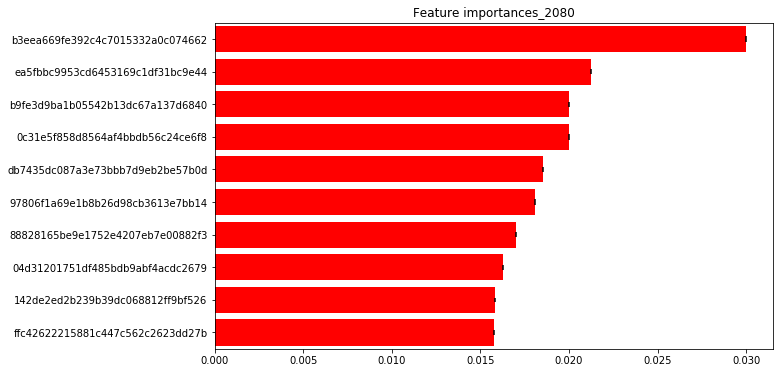

In [44]:
fig, ax = plt.subplots(figsize=(10,6))

plt.title("Feature importances_2080")
ax.barh(range(X_train_2080.shape[1]), importances_2080[indices_2080],
        color="r", yerr=std_2080[indices_2080])
plt.yticks(range(X_train_2080.shape[1]), [feature_names_2080[i] for i in indices_2080])
ax.set_ylim([-0.5,9.5])
ax.invert_yaxis() 
plt.show()

## Study 889

In [45]:
rel_feature_table_889 = pd.read_csv('889-rel-feature-table.tsv', sep='\t')
rel_feature_table_889.set_index('#OTU ID', inplace=True)
rel_feature_table_889.head()

,889.25May.1,889.25May.2,889.25May.3,889.25May.4,889.26May.1,889.26May.2,889.26May.3,889.26May.4
#OTU ID,,,,,,,,
d335da6ae81c9477caaf2805d7b06f6e,0.033455,0.036417,0.029014,0.011712,0.031369,0.023039,0.038670,0.010691
963995d54e10eb17c4fa477ab01ca8f2,0.020350,0.028570,0.039753,0.013709,0.017478,0.023652,0.020771,0.009495
0ec4c6155cd7772258c09cb4bebd84be,0.013773,0.006023,0.000000,0.000000,0.012240,0.069798,0.030052,0.002990
293e3bc035269ee105768b681be3f107,0.018398,0.016799,0.022330,0.008252,0.013037,0.017722,0.020882,0.006205
ab0fb1c9cfae4a48c4e898ddafc41ddc,0.013516,0.016689,0.018276,0.012444,0.015315,0.013292,0.015910,0.013606


In [46]:
metadata_889 = pd.read_csv('889_mapping_file.txt', sep='\t')
metadata_889.head()

,#SampleID,BarcodeSequence,LinkerPrimerSequence,center_name,center_project_name,experiment_design_description,illumina_technology,instrument_model,library_construction_protocol,linker,...,sample_taxid,sample_type,scientific_name,silicate,temp,temperature_deg_c,title,tot_nitro,tot_part_carb,Description
0,889.25May.1,CGATATCAGTAG,GTGTGCCAGCMGCCGCGGTAA,ANL,Rees_VulcanoIsland_MedSea,CO2 effect on phytoplankton,HiSeq,Illumina HiSeq 2000,"EMP V4 515f,806rbc protocol",GT,...,412755,sea water,marine metagenome,16.95,18.58,18.58,Rees_Vulcano_island_MedSea,2.16,9.82,Sterivex Filter 25May.1
1,889.25May.2,TGTGTTACTCCT,GTGTGCCAGCMGCCGCGGTAA,ANL,Rees_VulcanoIsland_MedSea,CO2 effect on phytoplankton,HiSeq,Illumina HiSeq 2000,"EMP V4 515f,806rbc protocol",GT,...,412755,sea water,marine metagenome,9.65,18.49,18.49,Rees_Vulcano_island_MedSea,1.88,7.66,Sterivex Filter 25May.2
2,889.25May.3,TCGCCTATAAGG,GTGTGCCAGCMGCCGCGGTAA,ANL,Rees_VulcanoIsland_MedSea,CO2 effect on phytoplankton,HiSeq,Illumina HiSeq 2000,"EMP V4 515f,806rbc protocol",GT,...,412755,sea water,marine metagenome,2.46,18.44,18.44,Rees_Vulcano_island_MedSea,1.47,5.06,Sterivex Filter 25May.3
3,889.25May.4,TAACCCGATAGA,GTGTGCCAGCMGCCGCGGTAA,ANL,Rees_VulcanoIsland_MedSea,CO2 effect on phytoplankton,HiSeq,Illumina HiSeq 2000,"EMP V4 515f,806rbc protocol",GT,...,412755,sea water,marine metagenome,3.34,18.44,18.44,Rees_Vulcano_island_MedSea,2.56,8.44,Sterivex Filter 25May.4
4,889.26May.1,CATAAGGGAGGC,GTGTGCCAGCMGCCGCGGTAA,ANL,Rees_VulcanoIsland_MedSea,CO2 effect on phytoplankton,HiSeq,Illumina HiSeq 2000,"EMP V4 515f,806rbc protocol",GT,...,412755,sea water,marine metagenome,21.83,19.26,19.26,Rees_Vulcano_island_MedSea,2.56,7.75,Sterivex Filter 26May.1


### Removing Rare Features/OTUs

In [47]:
rel_feature_table_889['non_zero_percent'] = rel_feature_table_889.apply(lambda 
                                                                          row: non_zero(row), axis=1)
rel_feature_table_889 = rel_feature_table_889[rel_feature_table_889.non_zero_percent > 20]
rel_feature_table_889.drop('non_zero_percent', axis=1, inplace=True)
rel_feature_table_889.head()

,889.25May.1,889.25May.2,889.25May.3,889.25May.4,889.26May.1,889.26May.2,889.26May.3,889.26May.4
#OTU ID,,,,,,,,
d335da6ae81c9477caaf2805d7b06f6e,0.033455,0.036417,0.029014,0.011712,0.031369,0.023039,0.038670,0.010691
963995d54e10eb17c4fa477ab01ca8f2,0.020350,0.028570,0.039753,0.013709,0.017478,0.023652,0.020771,0.009495
0ec4c6155cd7772258c09cb4bebd84be,0.013773,0.006023,0.000000,0.000000,0.012240,0.069798,0.030052,0.002990
293e3bc035269ee105768b681be3f107,0.018398,0.016799,0.022330,0.008252,0.013037,0.017722,0.020882,0.006205
ab0fb1c9cfae4a48c4e898ddafc41ddc,0.013516,0.016689,0.018276,0.012444,0.015315,0.013292,0.015910,0.013606


#### Renormalize to get sum of featuers (here relative abundance) equal to one for each sample

In [48]:
rel_feature_table_889 = rel_feature_table_889.div(rel_feature_table_889.sum(axis=1), axis=0)
#rel_feature_table_889['sum'] = rel_feature_table_889.sum(axis=1)
#rel_feature_table_889.drop('sum', axis=1, inplace=True)

#### Transforming data (standardize) by converting to z-score

In [49]:
rel_feature_table_889_zscore = rel_feature_table_889.apply(zscore)
rel_feature_table_889_zscore.head()

,889.25May.1,889.25May.2,889.25May.3,889.25May.4,889.26May.1,889.26May.2,889.26May.3,889.26May.4
#OTU ID,,,,,,,,
d335da6ae81c9477caaf2805d7b06f6e,0.204871,0.322591,0.125767,-0.478002,0.033593,-0.023276,0.493379,-0.472131
963995d54e10eb17c4fa477ab01ca8f2,-0.038652,0.287516,0.687453,-0.358008,-0.217689,0.149481,0.127189,-0.447601
0ec4c6155cd7772258c09cb4bebd84be,-0.132380,-0.479455,-0.688135,-0.748358,-0.271643,2.450597,0.748609,-0.614722
293e3bc035269ee105768b681be3f107,0.159581,0.104875,0.398027,-0.418067,-0.190879,0.193212,0.424317,-0.470474
ab0fb1c9cfae4a48c4e898ddafc41ddc,-0.061000,0.132395,0.235039,-0.231106,-0.063562,0.001922,0.212117,-0.140497


In [50]:
rel_feature_table_889_transpose = rel_feature_table_889_zscore.transpose()
rel_feature_table_889_transpose.reset_index(inplace=True)
rel_feature_table_889_transpose.head()

#OTU ID,index,d335da6ae81c9477caaf2805d7b06f6e,963995d54e10eb17c4fa477ab01ca8f2,0ec4c6155cd7772258c09cb4bebd84be,293e3bc035269ee105768b681be3f107,ab0fb1c9cfae4a48c4e898ddafc41ddc,c1b237f82b89140a0157db834a7e42dd,7f33c52589017c676148274b0b97f77f,55d99134142f3b56da1f864c44c9b794,c6fad9835673402308555359d46ab126,...,763cb5dfc11e26c04856c5d0582e9ff3,f31c81649a9b68d0a552dd6166bc71d6,47247e15a810dd9287fa7a0a1d887216,5d5fffe7c88cbb55bd35d5fcdded0abb,81522099ba45d3a21092cf64a9ae3dcd,ed3ae6de69e326969341cadc2a7f28f7,7d246402316284342941dde4561d0802,bfa3343bf8b3298d80f5ac2612ac6ea1,5eb4f79bd3a551c2f24c7b1fadc97bd7,57f63d889a0dcd2517996a2dae41f6fd
0,889.25May.1,0.204871,-0.038652,-0.132380,0.159581,-0.061000,0.084444,-0.435679,-0.112328,0.094433,...,-0.770686,-0.770686,-0.770686,-0.770686,2.824837,-0.770686,-0.770686,-0.770686,-0.770686,-0.770686
1,889.25May.2,0.322591,0.287516,-0.479455,0.104875,0.132395,0.494959,-0.313990,0.161582,0.389188,...,-0.765495,-0.765495,-0.765495,-0.765495,-0.765495,-0.765495,-0.765495,-0.765495,-0.765495,-0.765495
2,889.25May.3,0.125767,0.687453,-0.688135,0.398027,0.235039,0.297920,0.140073,0.354995,0.243475,...,-0.688135,-0.688135,-0.688135,-0.688135,-0.688135,2.980799,-0.688135,-0.688135,-0.688135,2.651562
3,889.25May.4,-0.478002,-0.358008,-0.748358,-0.418067,-0.231106,-0.279294,0.097885,-0.178843,-0.369845,...,1.581955,1.918435,-0.748358,-0.748358,-0.748358,-0.748358,1.094468,-0.748358,-0.748358,-0.748358
4,889.26May.1,0.033593,-0.217689,-0.271643,-0.190879,-0.063562,-0.277346,-0.362462,-0.244919,-0.222392,...,-0.770016,1.761965,-0.770016,-0.770016,1.562865,-0.770016,-0.770016,2.158138,-0.770016,1.671661


In [51]:
category_metadata_889 = metadata_889[['#SampleID', 'latitude']]
category_metadata_889.head()

,#SampleID,latitude
0,889.25May.1,38.419
1,889.25May.2,38.419
2,889.25May.3,38.420
3,889.25May.4,38.422
4,889.26May.1,38.419


In [52]:
rel_abundance_with_category_889 = pd.merge(rel_feature_table_889_transpose,category_metadata_889, left_on = 'index', right_on='#SampleID')
rel_abundance_with_category_889.set_index('#SampleID',inplace=True)
rel_abundance_with_category_889.drop('index',axis=1, inplace=True)
rel_abundance_with_category_889.head()

,d335da6ae81c9477caaf2805d7b06f6e,963995d54e10eb17c4fa477ab01ca8f2,0ec4c6155cd7772258c09cb4bebd84be,293e3bc035269ee105768b681be3f107,ab0fb1c9cfae4a48c4e898ddafc41ddc,c1b237f82b89140a0157db834a7e42dd,7f33c52589017c676148274b0b97f77f,55d99134142f3b56da1f864c44c9b794,c6fad9835673402308555359d46ab126,4ce4a28baeb4041422d4acd8a2e85764,...,f31c81649a9b68d0a552dd6166bc71d6,47247e15a810dd9287fa7a0a1d887216,5d5fffe7c88cbb55bd35d5fcdded0abb,81522099ba45d3a21092cf64a9ae3dcd,ed3ae6de69e326969341cadc2a7f28f7,7d246402316284342941dde4561d0802,bfa3343bf8b3298d80f5ac2612ac6ea1,5eb4f79bd3a551c2f24c7b1fadc97bd7,57f63d889a0dcd2517996a2dae41f6fd,latitude
#SampleID,,,,,,,,,,,,,,,,,,,,,
889.25May.1,0.204871,-0.038652,-0.132380,0.159581,-0.061000,0.084444,-0.435679,-0.112328,0.094433,0.194727,...,-0.770686,-0.770686,-0.770686,2.824837,-0.770686,-0.770686,-0.770686,-0.770686,-0.770686,38.419
889.25May.2,0.322591,0.287516,-0.479455,0.104875,0.132395,0.494959,-0.313990,0.161582,0.389188,0.235171,...,-0.765495,-0.765495,-0.765495,-0.765495,-0.765495,-0.765495,-0.765495,-0.765495,-0.765495,38.419
889.25May.3,0.125767,0.687453,-0.688135,0.398027,0.235039,0.297920,0.140073,0.354995,0.243475,0.344745,...,-0.688135,-0.688135,-0.688135,-0.688135,2.980799,-0.688135,-0.688135,-0.688135,2.651562,38.420
889.25May.4,-0.478002,-0.358008,-0.748358,-0.418067,-0.231106,-0.279294,0.097885,-0.178843,-0.369845,-0.378171,...,1.918435,-0.748358,-0.748358,-0.748358,-0.748358,1.094468,-0.748358,-0.748358,-0.748358,38.422
889.26May.1,0.033593,-0.217689,-0.271643,-0.190879,-0.063562,-0.277346,-0.362462,-0.244919,-0.222392,-0.178427,...,1.761965,-0.770016,-0.770016,1.562865,-0.770016,-0.770016,2.158138,-0.770016,1.671661,38.419


In [53]:
rel_abundance_with_category_889['latitude'] = rel_abundance_with_category_889['latitude'].astype('category')
rel_abundance_with_category_889['latitude_num'] = rel_abundance_with_category_889['latitude'].cat.codes
rel_abundance_with_category_889.head()

,d335da6ae81c9477caaf2805d7b06f6e,963995d54e10eb17c4fa477ab01ca8f2,0ec4c6155cd7772258c09cb4bebd84be,293e3bc035269ee105768b681be3f107,ab0fb1c9cfae4a48c4e898ddafc41ddc,c1b237f82b89140a0157db834a7e42dd,7f33c52589017c676148274b0b97f77f,55d99134142f3b56da1f864c44c9b794,c6fad9835673402308555359d46ab126,4ce4a28baeb4041422d4acd8a2e85764,...,47247e15a810dd9287fa7a0a1d887216,5d5fffe7c88cbb55bd35d5fcdded0abb,81522099ba45d3a21092cf64a9ae3dcd,ed3ae6de69e326969341cadc2a7f28f7,7d246402316284342941dde4561d0802,bfa3343bf8b3298d80f5ac2612ac6ea1,5eb4f79bd3a551c2f24c7b1fadc97bd7,57f63d889a0dcd2517996a2dae41f6fd,latitude,latitude_num
#SampleID,,,,,,,,,,,,,,,,,,,,,
889.25May.1,0.204871,-0.038652,-0.132380,0.159581,-0.061000,0.084444,-0.435679,-0.112328,0.094433,0.194727,...,-0.770686,-0.770686,2.824837,-0.770686,-0.770686,-0.770686,-0.770686,-0.770686,38.419,0
889.25May.2,0.322591,0.287516,-0.479455,0.104875,0.132395,0.494959,-0.313990,0.161582,0.389188,0.235171,...,-0.765495,-0.765495,-0.765495,-0.765495,-0.765495,-0.765495,-0.765495,-0.765495,38.419,0
889.25May.3,0.125767,0.687453,-0.688135,0.398027,0.235039,0.297920,0.140073,0.354995,0.243475,0.344745,...,-0.688135,-0.688135,-0.688135,2.980799,-0.688135,-0.688135,-0.688135,2.651562,38.420,1
889.25May.4,-0.478002,-0.358008,-0.748358,-0.418067,-0.231106,-0.279294,0.097885,-0.178843,-0.369845,-0.378171,...,-0.748358,-0.748358,-0.748358,-0.748358,1.094468,-0.748358,-0.748358,-0.748358,38.422,2
889.26May.1,0.033593,-0.217689,-0.271643,-0.190879,-0.063562,-0.277346,-0.362462,-0.244919,-0.222392,-0.178427,...,-0.770016,-0.770016,1.562865,-0.770016,-0.770016,2.158138,-0.770016,1.671661,38.419,0


## Random Forest 889

In [61]:
X_train_889, X_test_889, y_train_889, y_test_889 = train_test_split(
    rel_abundance_with_category_889.drop(['latitude', 'latitude_num'], axis=1), 
    rel_abundance_with_category_889['latitude_num'], test_size=0.25, random_state=40)

rfc_889 = RandomForestClassifier(n_estimators=502, random_state=np.random.seed(151), oob_score=True)
rfc_889.fit(X_train_889, y_train_889)
rfc_pred_889 = rfc_889.predict(X_test_889)

print(rfc_889.oob_score_)

0.3333333333333333


In [62]:
print(confusion_matrix(y_test_889,rfc_pred_889))
print(classification_report(y_test_889,rfc_pred_889))

[[1 0]
 [1 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [63]:
accuracy_889 = cross_val_score(rfc_889, X_train_889, y_train_889, scoring='accuracy', cv = 2)
print(accuracy_889.mean()*100)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


50.0


### Feature Selection

In [64]:
feature_names_889 = rel_abundance_with_category_889.drop(['latitude', 'latitude_num'], 
                                                      axis=1).columns
importances_889 = rfc_889.feature_importances_
std_889 = np.std([tree.feature_importances_ for tree in rfc_889.estimators_],
             axis=0)
indices_889 = np.argsort(importances_889)[::-1]
for i in range(20):
    print(str(i+1)+') ' , feature_names_889[indices_889[i]], 
          '(', importances_889[indices_889[i]], ')')

1)  a8d47ab56ffbd9564a16842f1db90cba ( 0.009465855307640296 )
2)  9dc38cb404650eca0349227ef20697d1 ( 0.009342922121826788 )
3)  0fdb57ae19c0ff014f84279802a2dddc ( 0.00878972278566599 )
4)  f8d0e27c8236b18d410620f2c3450e1b ( 0.008390189931772082 )
5)  3c9231e84e578aeb61b7f36eb0f615ed ( 0.008113590263691683 )
6)  9757df7c93ea8f5dcac5858f0e2b15ed ( 0.007929190484971418 )
7)  d7f404bd1d36d5076a230f2f1cd86d68 ( 0.00765259081689102 )
8)  306a48558c7eaaf4dbd351ffab26b670 ( 0.007375991148810622 )
9)  59e4a476fd455f6d018e31dafac2bbae ( 0.007191591370090356 )
10)  a2065f901634c6c033d32ea351361b79 ( 0.007099391480730223 )
11)  0931d4f3d26f3653947d0acb760a3983 ( 0.006761325219743069 )
12)  1e37994f66a5d74e6e6b0acdaea0f064 ( 0.006423258958755917 )
13)  77c781879296e403387329f274c651b7 ( 0.006146659290675518 )
14)  5696722f800f23df6a025cdd45f7c6e7 ( 0.006146659290675518 )
15)  721780ca8920406834a7209cd7747446 ( 0.006146659290675518 )
16)  45a4e46c54678ed94fa13e272e203801 ( 0.006085192697768763 )
17)

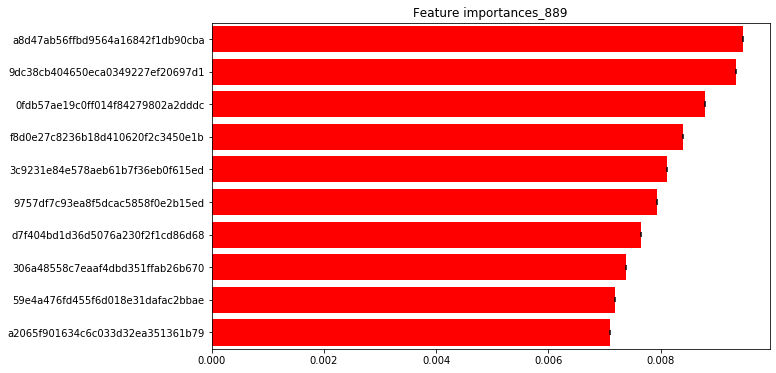

In [65]:
fig, ax = plt.subplots(figsize=(10,6))

plt.title("Feature importances_889")
ax.barh(range(X_train_889.shape[1]), importances_889[indices_889],
        color="r", yerr=std_889[indices_889])
plt.yticks(range(X_train_889.shape[1]), [feature_names_889[i] for i in indices_889])
ax.set_ylim([-0.5,9.5])
ax.invert_yaxis() 
plt.show()

## Study 1034

In [66]:
rel_feature_table_1034 = pd.read_csv('1034-rel-feature-table.tsv', sep='\t')
rel_feature_table_1034.set_index('#OTU ID', inplace=True)
rel_feature_table_1034.head()

,1034.CHA1,1034.CHA10,1034.CHA11,1034.CHA12,1034.CHA2,1034.CHA3,1034.CHB1,1034.CHB10,1034.CHB2,1034.CHB3,...,1034.ZKE2,1034.ZKE3,1034.ZKE4,1034.ZKE5,1034.ZKG1,1034.ZKG4,1034.ZKH1,1034.ZKH2,1034.ZKH3,1034.ZKH4
#OTU ID,,,,,,,,,,,,,,,,,,,,,
6807a93b344ecb5064c0615c7f013930,0.0,0.650794,0.162138,0.319703,0.000000,0.011092,0.014248,0.176380,0.0,0.000000,...,0.0,0.0,0.033662,0.0,0.0,0.626506,0.0,0.033223,0.0,0.074713
5b7cff435c4f7e39e49cab63bda2faf7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
559c21519d1b28875eff1446c8f8f9d8,0.0,0.000000,0.048203,0.078067,0.018182,0.000000,0.026714,0.064417,0.0,0.045455,...,0.0,1.0,0.055008,0.0,0.0,0.120482,1.0,0.027685,0.0,0.048851
ca7b15384f4cd40f2831c1c2df96642c,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
fdda5e9e359c6a3671f83f0762486b4d,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [67]:
metadata_1034 = pd.read_csv('1034_mapping_file.txt', sep='\t')
metadata_1034.head()

,#SampleID,BarcodeSequence,LinkerPrimerSequence,center_name,center_project_name,experiment_design_description,illumina_technology,instrument_model,library_construction_protocol,linker,...,qiita_empo_2,qiita_empo_3,qiita_study_id,sample_scientific_name,sample_taxid,sample_type,scientific_name,title,type_sample,Description
0,1034.CHB3,ATGTTTAGACGG,GTGTGCCAGCMGCCGCGGTAA,Institutt for biologi,CryoCARB2,European and Russian collaboration to investig...,HiSeq,Illumina HiSeq 2000,"EMP V4 515f,806rbc protocol",GT,...,NaN,NaN,1034,soil metagenome,410658,Soil,soil metagenome,CryoCARB Permafrost soil microbiome,"Ajj (young, less decomposed)","soil metagenome,Ajj (young, less decomposed)"
1,1034.CHB4,TGCGGGATTCAT,GTGTGCCAGCMGCCGCGGTAA,Institutt for biologi,CryoCARB2,European and Russian collaboration to investig...,HiSeq,Illumina HiSeq 2000,"EMP V4 515f,806rbc protocol",GT,...,Non-saline,Soil (non-saline),1034,soil metagenome,410658,Soil,soil metagenome,CryoCARB Permafrost soil microbiome,Cg,"soil metagenome,Cg"
2,1034.CHB5,AGCCTCATGATG,GTGTGCCAGCMGCCGCGGTAA,Institutt for biologi,CryoCARB2,European and Russian collaboration to investig...,HiSeq,Illumina HiSeq 2000,"EMP V4 515f,806rbc protocol",GT,...,Non-saline,Soil (non-saline),1034,soil metagenome,410658,Soil,soil metagenome,CryoCARB Permafrost soil microbiome,Bg1,"soil metagenome,Bg1"
3,1034.CHB6,TTAAACCGCGCC,GTGTGCCAGCMGCCGCGGTAA,Institutt for biologi,CryoCARB2,European and Russian collaboration to investig...,HiSeq,Illumina HiSeq 2000,"EMP V4 515f,806rbc protocol",GT,...,Non-saline,Soil (non-saline),1034,soil metagenome,410658,Soil,soil metagenome,CryoCARB Permafrost soil microbiome,AB,"soil metagenome,AB"
4,1034.CHB7,CTATCGGAAGAT,GTGTGCCAGCMGCCGCGGTAA,Institutt for biologi,CryoCARB2,European and Russian collaboration to investig...,HiSeq,Illumina HiSeq 2000,"EMP V4 515f,806rbc protocol",GT,...,Non-saline,Soil (non-saline),1034,soil metagenome,410658,Soil,soil metagenome,CryoCARB Permafrost soil microbiome,O,"soil metagenome,O"


### Removing Rare Features/OTUs

In [68]:
rel_feature_table_1034['non_zero_percent'] = rel_feature_table_1034.apply(lambda 
                                                                          row: non_zero(row), axis=1)
rel_feature_table_1034 = rel_feature_table_1034[rel_feature_table_1034.non_zero_percent > 10]
rel_feature_table_1034.drop('non_zero_percent', axis=1, inplace=True)
rel_feature_table_1034.head()

,1034.CHA1,1034.CHA10,1034.CHA11,1034.CHA12,1034.CHA2,1034.CHA3,1034.CHB1,1034.CHB10,1034.CHB2,1034.CHB3,...,1034.ZKE2,1034.ZKE3,1034.ZKE4,1034.ZKE5,1034.ZKG1,1034.ZKG4,1034.ZKH1,1034.ZKH2,1034.ZKH3,1034.ZKH4
#OTU ID,,,,,,,,,,,,,,,,,,,,,
6807a93b344ecb5064c0615c7f013930,0.0,0.650794,0.162138,0.319703,0.000000,0.011092,0.014248,0.176380,0.000000,0.000000,...,0.0,0.0,0.033662,0.000000,0.000000,0.626506,0.0,0.033223,0.0,0.074713
559c21519d1b28875eff1446c8f8f9d8,0.0,0.000000,0.048203,0.078067,0.018182,0.000000,0.026714,0.064417,0.000000,0.045455,...,0.0,1.0,0.055008,0.000000,0.000000,0.120482,1.0,0.027685,0.0,0.048851
ae65a5f26cc5d56a613cfcdf9e0061d8,0.0,0.000000,0.017528,0.000000,0.000000,0.000000,0.014248,0.000000,0.047809,0.000000,...,0.0,0.0,0.015599,0.722222,0.015493,0.000000,0.0,0.000000,0.0,0.000000
5ef76d95fb667b12db2b5d50b2bc2e5f,0.0,0.095238,0.030675,0.000000,0.000000,0.000000,0.044524,0.000000,0.063745,0.000000,...,0.0,0.0,0.055829,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
867655a30d4390642cf12a147a86be48,0.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000


#### Renormalize to get sum of features (here relative abundance) equal to one for each sample

In [69]:
rel_feature_table_1034 = rel_feature_table_1034.div(rel_feature_table_1034.sum(axis=1), axis=0)
#rel_feature_table_1034['sum'] = rel_feature_table_1034.sum(axis=1)
#rel_feature_table_1034.drop('sum', axis=1, inplace=True)

#### Transforming data (standardize) by converting to z-score

In [70]:
rel_feature_table_1034_zscore = rel_feature_table_1034.apply(zscore)
rel_feature_table_1034_zscore.head()

C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


,1034.CHA1,1034.CHA10,1034.CHA11,1034.CHA12,1034.CHA2,1034.CHA3,1034.CHB1,1034.CHB10,1034.CHB2,1034.CHB3,...,1034.ZKE2,1034.ZKE3,1034.ZKE4,1034.ZKE5,1034.ZKG1,1034.ZKG4,1034.ZKH1,1034.ZKH2,1034.ZKH3,1034.ZKH4
#OTU ID,,,,,,,,,,,,,,,,,,,,,
6807a93b344ecb5064c0615c7f013930,-0.171499,2.257329,-0.354243,-0.189568,-0.175313,-0.388572,-0.325405,-0.212353,-0.249460,-0.174199,...,-0.171499,-0.171499,-0.455204,-0.245348,-0.302085,0.710623,-0.171499,-0.342058,-0.371345,-0.414281
559c21519d1b28875eff1446c8f8f9d8,-0.171499,-0.292645,-0.397155,-0.268850,-0.044248,-0.400959,-0.069577,-0.210027,-0.249460,-0.081700,...,-0.171499,5.830952,-0.286228,-0.245348,-0.302085,0.247578,5.830952,-0.248632,-0.371345,-0.342018
ae65a5f26cc5d56a613cfcdf9e0061d8,-0.171499,-0.292645,-0.442612,-0.434067,-0.175313,-0.400959,-0.027789,-0.430430,0.582190,-0.174199,...,-0.171499,-0.171499,-0.372611,4.392493,-0.146285,-0.279155,-0.171499,-0.413590,-0.371345,-0.503562
5ef76d95fb667b12db2b5d50b2bc2e5f,-0.171499,2.577213,-0.244119,-0.434067,-0.175313,-0.400959,1.081358,-0.430430,1.202603,-0.174199,...,-0.171499,-0.171499,0.108743,-0.245348,-0.302085,-0.279155,-0.171499,-0.413590,-0.371345,-0.503562
867655a30d4390642cf12a147a86be48,-0.171499,4.530112,-0.596289,-0.434067,-0.175313,-0.400959,-0.386482,-0.430430,-0.249460,-0.174199,...,-0.171499,-0.171499,-0.503179,-0.245348,-0.302085,-0.279155,-0.171499,-0.413590,-0.371345,-0.503562


In [71]:
rel_feature_table_1034_transpose = rel_feature_table_1034_zscore.transpose()
rel_feature_table_1034_transpose.reset_index(inplace=True)
rel_feature_table_1034_transpose.head()

#OTU ID,index,6807a93b344ecb5064c0615c7f013930,559c21519d1b28875eff1446c8f8f9d8,ae65a5f26cc5d56a613cfcdf9e0061d8,5ef76d95fb667b12db2b5d50b2bc2e5f,867655a30d4390642cf12a147a86be48,31f4c8bd6ddea3382fbc96b7c951dfb2,2bbf50c498f8d59d755cfa2d6698d8ec,513cb5bacb5b910d654db0c5b579da29,75b57fa7a8029d6eca6227defdd29d2c,...,49f0e65bb8db1cf84b199b0460649e50,492a7f280f5666c279c2c3cba52d0829,78aa653de6374839a16c769208dc0ed0,87bd4c426a1f620abdb6762a3e85e8f7,a3eaf0c4b0a148347ad8813b1bf06021,cef1a222b60483e46e74ac8ecda6628e,02f2ad6d98325286c8822883f6da8305,20c045715d3fd7018f5672c32fe9df93,6c275bb4e552064243759e41729672f6,8de7361033070aacc8dd75dff7212f73
0,1034.CHA1,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,...,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499
1,1034.CHA10,2.257329,-0.292645,-0.292645,2.577213,4.530112,-0.292645,-0.292645,-0.292645,-0.292645,...,-0.292645,-0.292645,-0.292645,-0.292645,-0.292645,-0.292645,-0.292645,-0.292645,-0.292645,-0.292645
2,1034.CHA11,-0.354243,-0.397155,-0.442612,-0.244119,-0.596289,-0.596289,2.652403,0.724041,-0.596289,...,1.884655,-0.596289,0.084198,2.555490,0.429710,-0.596289,-0.596289,-0.596289,-0.596289,-0.596289
3,1034.CHA12,-0.189568,-0.268850,-0.434067,-0.434067,-0.434067,1.506408,-0.434067,-0.434067,-0.434067,...,-0.434067,-0.434067,-0.434067,-0.434067,-0.434067,-0.434067,-0.434067,-0.434067,-0.434067,-0.434067
4,1034.CHA2,-0.175313,-0.044248,-0.175313,-0.175313,-0.175313,-0.175313,-0.175313,-0.175313,-0.175313,...,-0.175313,-0.175313,-0.175313,5.829563,-0.175313,-0.175313,-0.175313,-0.175313,-0.175313,-0.175313


In [72]:
category_metadata_1034 = metadata_1034[['#SampleID', 'country']]
category_metadata_1034.head()

,#SampleID,country
0,1034.CHB3,GAZ:Russia
1,1034.CHB4,GAZ:Russia
2,1034.CHB5,GAZ:Russia
3,1034.CHB6,GAZ:Russia
4,1034.CHB7,GAZ:Russia


In [73]:
rel_abundance_with_category_1034 = pd.merge(rel_feature_table_1034_transpose,category_metadata_1034, 
                                           left_on = 'index', right_on='#SampleID')
rel_abundance_with_category_1034.set_index('#SampleID',inplace=True)
rel_abundance_with_category_1034.drop('index',axis=1, inplace=True)
rel_abundance_with_category_1034

,6807a93b344ecb5064c0615c7f013930,559c21519d1b28875eff1446c8f8f9d8,ae65a5f26cc5d56a613cfcdf9e0061d8,5ef76d95fb667b12db2b5d50b2bc2e5f,867655a30d4390642cf12a147a86be48,31f4c8bd6ddea3382fbc96b7c951dfb2,2bbf50c498f8d59d755cfa2d6698d8ec,513cb5bacb5b910d654db0c5b579da29,75b57fa7a8029d6eca6227defdd29d2c,a6c716fca210a9293831b2f6fc118031,...,492a7f280f5666c279c2c3cba52d0829,78aa653de6374839a16c769208dc0ed0,87bd4c426a1f620abdb6762a3e85e8f7,a3eaf0c4b0a148347ad8813b1bf06021,cef1a222b60483e46e74ac8ecda6628e,02f2ad6d98325286c8822883f6da8305,20c045715d3fd7018f5672c32fe9df93,6c275bb4e552064243759e41729672f6,8de7361033070aacc8dd75dff7212f73,country
#SampleID,,,,,,,,,,,,,,,,,,,,,
1034.CHA1,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,...,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,GAZ:Russia
1034.CHA10,2.257329,-0.292645,-0.292645,2.577213,4.530112,-0.292645,-0.292645,-0.292645,-0.292645,-0.292645,...,-0.292645,-0.292645,-0.292645,-0.292645,-0.292645,-0.292645,-0.292645,-0.292645,-0.292645,GAZ:Russia
1034.CHA11,-0.354243,-0.397155,-0.442612,-0.244119,-0.596289,-0.596289,2.652403,0.724041,-0.596289,0.079386,...,-0.596289,0.084198,2.555490,0.429710,-0.596289,-0.596289,-0.596289,-0.596289,-0.596289,GAZ:Russia
1034.CHA12,-0.189568,-0.268850,-0.434067,-0.434067,-0.434067,1.506408,-0.434067,-0.434067,-0.434067,-0.434067,...,-0.434067,-0.434067,-0.434067,-0.434067,-0.434067,-0.434067,-0.434067,-0.434067,-0.434067,GAZ:Russia
1034.CHA2,-0.175313,-0.044248,-0.175313,-0.175313,-0.175313,-0.175313,-0.175313,-0.175313,-0.175313,-0.175313,...,-0.175313,-0.175313,5.829563,-0.175313,-0.175313,-0.175313,-0.175313,-0.175313,-0.175313,GAZ:Russia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034.ZKG4,0.710623,0.247578,-0.279155,-0.279155,-0.279155,-0.279155,-0.279155,-0.279155,-0.279155,-0.279155,...,-0.279155,-0.279155,-0.279155,-0.279155,-0.279155,-0.279155,-0.279155,-0.279155,-0.279155,GAZ:Greenland
1034.ZKH1,-0.171499,5.830952,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,...,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,GAZ:Greenland
1034.ZKH2,-0.342058,-0.248632,-0.413590,-0.413590,-0.413590,-0.413590,-0.413590,-0.413590,-0.413590,0.283413,...,-0.413590,-0.413590,-0.413590,-0.413590,-0.413590,3.034521,3.315981,1.675417,-0.413590,GAZ:Greenland


In [74]:
rel_abundance_with_category_1034['country'] = rel_abundance_with_category_1034['country'].astype('category')
rel_abundance_with_category_1034['country_num'] = rel_abundance_with_category_1034['country'].cat.codes
rel_abundance_with_category_1034.head()

,6807a93b344ecb5064c0615c7f013930,559c21519d1b28875eff1446c8f8f9d8,ae65a5f26cc5d56a613cfcdf9e0061d8,5ef76d95fb667b12db2b5d50b2bc2e5f,867655a30d4390642cf12a147a86be48,31f4c8bd6ddea3382fbc96b7c951dfb2,2bbf50c498f8d59d755cfa2d6698d8ec,513cb5bacb5b910d654db0c5b579da29,75b57fa7a8029d6eca6227defdd29d2c,a6c716fca210a9293831b2f6fc118031,...,78aa653de6374839a16c769208dc0ed0,87bd4c426a1f620abdb6762a3e85e8f7,a3eaf0c4b0a148347ad8813b1bf06021,cef1a222b60483e46e74ac8ecda6628e,02f2ad6d98325286c8822883f6da8305,20c045715d3fd7018f5672c32fe9df93,6c275bb4e552064243759e41729672f6,8de7361033070aacc8dd75dff7212f73,country,country_num
#SampleID,,,,,,,,,,,,,,,,,,,,,
1034.CHA1,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,...,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,GAZ:Russia,1
1034.CHA10,2.257329,-0.292645,-0.292645,2.577213,4.530112,-0.292645,-0.292645,-0.292645,-0.292645,-0.292645,...,-0.292645,-0.292645,-0.292645,-0.292645,-0.292645,-0.292645,-0.292645,-0.292645,GAZ:Russia,1
1034.CHA11,-0.354243,-0.397155,-0.442612,-0.244119,-0.596289,-0.596289,2.652403,0.724041,-0.596289,0.079386,...,0.084198,2.555490,0.429710,-0.596289,-0.596289,-0.596289,-0.596289,-0.596289,GAZ:Russia,1
1034.CHA12,-0.189568,-0.268850,-0.434067,-0.434067,-0.434067,1.506408,-0.434067,-0.434067,-0.434067,-0.434067,...,-0.434067,-0.434067,-0.434067,-0.434067,-0.434067,-0.434067,-0.434067,-0.434067,GAZ:Russia,1
1034.CHA2,-0.175313,-0.044248,-0.175313,-0.175313,-0.175313,-0.175313,-0.175313,-0.175313,-0.175313,-0.175313,...,-0.175313,5.829563,-0.175313,-0.175313,-0.175313,-0.175313,-0.175313,-0.175313,GAZ:Russia,1


## Random Forest 1034

In [79]:
X_train_1034, X_test_1034, y_train_1034, y_test_1034 = train_test_split(
    rel_abundance_with_category_1034.drop(['country', 'country_num'], axis=1).dropna(), 
    rel_abundance_with_category_1034.dropna()['country_num'], test_size=0.4, random_state=40)

rfc_1034 = RandomForestClassifier(n_estimators=501, random_state=np.random.seed(151), 
                                  oob_score=True, warm_start=True)
rfc_1034.fit(X_train_1034, y_train_1034)
rfc_pred_1034 = rfc_1034.predict(X_test_1034)

print(rfc_1034.oob_score_)

0.7142857142857143


In [80]:
print(confusion_matrix(y_test_1034,rfc_pred_1034))
print(classification_report(y_test_1034,rfc_pred_1034))

[[ 0  6]
 [ 0 28]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.82      1.00      0.90        28

    accuracy                           0.82        34
   macro avg       0.41      0.50      0.45        34
weighted avg       0.68      0.82      0.74        34



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [81]:
accuracy_1034 = cross_val_score(rfc_1034, X_train_1034, y_train_1034, scoring='accuracy', cv = 10)
print(accuracy_1034.mean()*100)

66.5


### Feature Selection

In [82]:
feature_names_1034 = rel_abundance_with_category_1034.drop(['country', 'country_num'], 
                                                      axis=1).columns
importances_1034 = rfc_1034.feature_importances_
std_1034 = np.std([tree.feature_importances_ for tree in rfc_1034.estimators_],
             axis=0)
indices_1034 = np.argsort(importances_1034)[::-1]
for i in range(20):
    print(str(i+1)+') ' , feature_names_1034[indices_1034[i]], 
          '(', importances_1034[indices_1034[i]], ')')

1)  a6c716fca210a9293831b2f6fc118031 ( 0.06753581670904754 )
2)  513cb5bacb5b910d654db0c5b579da29 ( 0.059789935883088015 )
3)  ba61b01de5b94eb73836df59b93aca2f ( 0.0501097633597724 )
4)  559c21519d1b28875eff1446c8f8f9d8 ( 0.04715338483874477 )
5)  a3eaf0c4b0a148347ad8813b1bf06021 ( 0.04665200073247566 )
6)  6807a93b344ecb5064c0615c7f013930 ( 0.04361305290822823 )
7)  02f2ad6d98325286c8822883f6da8305 ( 0.043381104107611555 )
8)  2bbf50c498f8d59d755cfa2d6698d8ec ( 0.04196331853377778 )
9)  a1989e9d0b6e1faaeaa6db4b3c9acce0 ( 0.03853240907479122 )
10)  20c045715d3fd7018f5672c32fe9df93 ( 0.037078833444203256 )
11)  0feaba0d3565692dceea58607add94f3 ( 0.0332473641246983 )
12)  31f4c8bd6ddea3382fbc96b7c951dfb2 ( 0.031749698653392035 )
13)  fa17008877101dd82e4fb2345c70d217 ( 0.028778461646580385 )
14)  b9b0772c984bb697f8acc3b7a24e2d29 ( 0.02367528169686596 )
15)  867655a30d4390642cf12a147a86be48 ( 0.02349927387672209 )
16)  87bd4c426a1f620abdb6762a3e85e8f7 ( 0.023434540359413357 )
17)  7425bc72

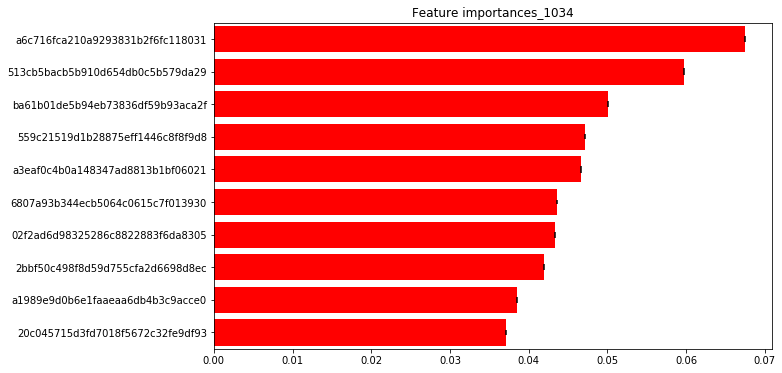

In [83]:
fig, ax = plt.subplots(figsize=(10,6))

plt.title("Feature importances_1034")
ax.barh(range(X_train_1034.shape[1]), importances_1034[indices_1034],
        color="r", yerr=std_1034[indices_1034])
plt.yticks(range(X_train_1034.shape[1]), [feature_names_1034[i] for i in indices_1034])
ax.set_ylim([-0.5,9.5])
ax.invert_yaxis() 
plt.show()

## Study 1579

In [84]:
rel_feature_table_1579 = pd.read_csv('1579-rel-feature-table.tsv', sep='\t')
rel_feature_table_1579.set_index('#OTU ID', inplace=True)
rel_feature_table_1579.head()

,1579.C.1.0,1579.C.2.0,1579.C.3.0,1579.C.3.15,1579.C.3.30,1579.C.4.0,1579.C.4.15,1579.C.4.30,1579.D.1.0,1579.D.1.15,...,1579.WM.1.0,1579.WM.1.15,1579.WM.1.30,1579.WM.2.15,1579.WM.2.30,1579.WM.3.15,1579.WM.3.30,1579.WM.4.0,1579.WM.4.30,1579.WM.Cow
#OTU ID,,,,,,,,,,,,,,,,,,,,,
3235fcc103953270c22e1361109f17c5,0.003331,0.004317,0.010408,0.007244,0.004366,0.007057,0.008961,0.001779,0.004010,0.005520,...,0.032313,0.029359,0.027253,0.033717,0.025639,0.007029,0.003578,0.018038,0.011975,0.000000
6ecd6ae4608256b437515e6ad6fb02cb,0.024381,0.007344,0.000588,0.000893,0.001127,0.004442,0.000454,0.000000,0.008149,0.001262,...,0.023024,0.017794,0.019637,0.006747,0.040628,0.003005,0.000775,0.018511,0.001934,0.006808
a0ef8d47be342d4ecf14266c3141cd9b,0.022556,0.016661,0.021600,0.057673,0.031831,0.018259,0.045143,0.009818,0.000000,0.002247,...,0.007057,0.000000,0.002590,0.005696,0.004371,0.037809,0.009155,0.013343,0.010302,0.000000
32e118c9e7869894bab8e4bbeb29e2ec,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000124,0.000000,0.002432,0.000068,0.006661,0.000000,0.015694,0.000000
ecc95de27390f17481f22552111f4519,0.003207,0.005293,0.008114,0.002908,0.002237,0.005779,0.004263,0.000753,0.001556,0.008063,...,0.005462,0.004893,0.006468,0.010215,0.008393,0.002988,0.001874,0.010208,0.003124,0.000000


In [85]:
metadata_1579 = pd.read_csv('1579_mapping_file.txt', sep='\t')
def description(desc):
    desc_list = desc.split()
    elevation = desc_list[-1]
    elevation = elevation[0:len(elevation)-1]
    if int(elevation)>1000:
        return 'Greater than 1000'
    elif int(elevation)<=1000:
        return 'Less than 1000'
metadata_1579['soil_elevation'] = [description(x) for x in metadata_1579['Description']]
metadata_1579.head()

,#SampleID,BarcodeSequence,LinkerPrimerSequence,center_name,center_project_name,experiment_design_description,illumina_technology,instrument_model,library_construction_protocol,linker,...,qiita_empo_3,qiita_study_id,sample_scientific_name,sample_taxid,sample_type,scientific_name,title,water_content_soil,Description,soil_elevation
0,1579.H.3.30,CCTCGGGTACTA,GTGTGCCAGCMGCCGCGGTAA,ANL,Hawaii Kohala Volcanic soils,volcanic soils from Hawaii Kohana,HiSeq,Illumina HiSeq 2000,"EMP V4 515f,806rbc protocol",GT,...,Soil (non-saline),1579,soil metagenome,410658,soil,soil metagenome,Hawaii Kohala Volcanic Soils,0.62,soil elevation 992m,Less than 1000
1,1579.H.4.0,AACCTCGGATAA,GTGTGCCAGCMGCCGCGGTAA,ANL,Hawaii Kohala Volcanic soils,volcanic soils from Hawaii Kohana,HiSeq,Illumina HiSeq 2000,"EMP V4 515f,806rbc protocol",GT,...,Soil (non-saline),1579,soil metagenome,410658,soil,soil metagenome,Hawaii Kohala Volcanic Soils,0.58,soil elevation 992m,Less than 1000
2,1579.H.4.30,TTACGTGGCGAT,GTGTGCCAGCMGCCGCGGTAA,ANL,Hawaii Kohala Volcanic soils,volcanic soils from Hawaii Kohana,HiSeq,Illumina HiSeq 2000,"EMP V4 515f,806rbc protocol",GT,...,NaN,1579,soil metagenome,410658,soil,soil metagenome,Hawaii Kohala Volcanic Soils,0.36,soil elevation 992m,Less than 1000
3,1579.F.3.30,TTGGACGTCCAC,GTGTGCCAGCMGCCGCGGTAA,ANL,Hawaii Kohala Volcanic soils,volcanic soils from Hawaii Kohana,HiSeq,Illumina HiSeq 2000,"EMP V4 515f,806rbc protocol",GT,...,Soil (non-saline),1579,soil metagenome,410658,soil,soil metagenome,Hawaii Kohala Volcanic Soils,0.16,soil elevation 833m,Less than 1000
4,1579.I.1.0,TTCCACACGTGG,GTGTGCCAGCMGCCGCGGTAA,ANL,Hawaii Kohala Volcanic soils,volcanic soils from Hawaii Kohana,HiSeq,Illumina HiSeq 2000,"EMP V4 515f,806rbc protocol",GT,...,Soil (non-saline),1579,soil metagenome,410658,soil,soil metagenome,Hawaii Kohala Volcanic Soils,1.18,soil elevation 1090m,Greater than 1000


### Removing Rare Features/OTUs

In [86]:
rel_feature_table_1579['non_zero_percent'] = rel_feature_table_1579.apply(lambda 
                                                                          row: non_zero(row), axis=1)
rel_feature_table_1579 = rel_feature_table_1579[rel_feature_table_1579.non_zero_percent > 20]
rel_feature_table_1579.drop('non_zero_percent', axis=1, inplace=True)
rel_feature_table_1579.head()

,1579.C.1.0,1579.C.2.0,1579.C.3.0,1579.C.3.15,1579.C.3.30,1579.C.4.0,1579.C.4.15,1579.C.4.30,1579.D.1.0,1579.D.1.15,...,1579.WM.1.0,1579.WM.1.15,1579.WM.1.30,1579.WM.2.15,1579.WM.2.30,1579.WM.3.15,1579.WM.3.30,1579.WM.4.0,1579.WM.4.30,1579.WM.Cow
#OTU ID,,,,,,,,,,,,,,,,,,,,,
3235fcc103953270c22e1361109f17c5,0.003331,0.004317,0.010408,0.007244,0.004366,0.007057,0.008961,0.001779,0.004010,0.005520,...,0.032313,0.029359,0.027253,0.033717,0.025639,0.007029,0.003578,0.018038,0.011975,0.000000
6ecd6ae4608256b437515e6ad6fb02cb,0.024381,0.007344,0.000588,0.000893,0.001127,0.004442,0.000454,0.000000,0.008149,0.001262,...,0.023024,0.017794,0.019637,0.006747,0.040628,0.003005,0.000775,0.018511,0.001934,0.006808
a0ef8d47be342d4ecf14266c3141cd9b,0.022556,0.016661,0.021600,0.057673,0.031831,0.018259,0.045143,0.009818,0.000000,0.002247,...,0.007057,0.000000,0.002590,0.005696,0.004371,0.037809,0.009155,0.013343,0.010302,0.000000
32e118c9e7869894bab8e4bbeb29e2ec,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000124,0.000000,0.002432,0.000068,0.006661,0.000000,0.015694,0.000000
ecc95de27390f17481f22552111f4519,0.003207,0.005293,0.008114,0.002908,0.002237,0.005779,0.004263,0.000753,0.001556,0.008063,...,0.005462,0.004893,0.006468,0.010215,0.008393,0.002988,0.001874,0.010208,0.003124,0.000000


#### Renormalize to get sum of features (here relative abundances) equal to one for each sample

In [87]:
rel_feature_table_1579 = rel_feature_table_1579.div(rel_feature_table_1579.sum(axis=1), axis=0)
#rel_feature_table_1579['sum'] = rel_feature_table_1579.sum(axis=1)
#rel_feature_table_1579.drop('sum', axis=1, inplace=True)

#### Transforming data (standardize) by converting to z-score

In [88]:
rel_feature_table_1579_zscore = rel_feature_table_1579.apply(zscore)
rel_feature_table_1579_zscore.head()

C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


,1579.C.1.0,1579.C.2.0,1579.C.3.0,1579.C.3.15,1579.C.3.30,1579.C.4.0,1579.C.4.15,1579.C.4.30,1579.D.1.0,1579.D.1.15,...,1579.WM.1.0,1579.WM.1.15,1579.WM.1.30,1579.WM.2.15,1579.WM.2.30,1579.WM.3.15,1579.WM.3.30,1579.WM.4.0,1579.WM.4.30,1579.WM.Cow
#OTU ID,,,,,,,,,,,,,,,,,,,,,
3235fcc103953270c22e1361109f17c5,-0.269159,-0.242187,-0.079076,-0.159926,-0.211449,-0.216793,-0.079664,-0.138864,-0.274920,-0.306380,...,0.258488,0.184970,0.364958,0.471597,0.228320,-0.197423,-0.245003,-0.074642,-0.020887,-0.08048
6ecd6ae4608256b437515e6ad6fb02cb,0.740238,-0.083197,-0.432721,-0.340654,-0.328218,-0.278515,-0.334785,-0.179112,-0.030959,-0.440361,...,0.172852,0.068610,0.270745,-0.290392,0.972158,-0.280169,-0.338984,0.036281,-0.345372,0.37163
a0ef8d47be342d4ecf14266c3141cd9b,1.123716,0.603328,0.963777,2.691252,1.879524,0.832922,2.121511,0.221295,-0.434109,-0.356212,...,-0.205209,-0.290636,-0.400635,-0.234350,-0.300128,1.343228,0.219921,0.058016,0.202916,-0.08048
32e118c9e7869894bab8e4bbeb29e2ec,-0.393439,-0.384087,-0.459486,-0.373450,-0.383623,-0.503237,-0.352000,-0.179112,-0.434109,-0.493733,...,-0.506325,-0.290636,-0.551063,-0.543550,-0.398879,-0.371341,0.075701,-0.472253,0.571607,-0.08048
ecc95de27390f17481f22552111f4519,-0.171895,-0.061906,0.089607,-0.214752,-0.220307,-0.068891,-0.112126,-0.147563,-0.319746,0.012984,...,-0.266959,-0.143867,-0.152947,0.025922,-0.072214,-0.235127,-0.248881,-0.055607,-0.230911,-0.08048


In [89]:
rel_feature_table_1579_transpose = rel_feature_table_1579_zscore.transpose()
rel_feature_table_1579_transpose.reset_index(inplace=True)
rel_feature_table_1579_transpose.head()

#OTU ID,index,3235fcc103953270c22e1361109f17c5,6ecd6ae4608256b437515e6ad6fb02cb,a0ef8d47be342d4ecf14266c3141cd9b,32e118c9e7869894bab8e4bbeb29e2ec,ecc95de27390f17481f22552111f4519,e0d18e0b56cd25d24aca29244df5919c,eba510472114252ffee7e2ad66ec62ff,be326adf331fd70310e3aaa3d661055c,40f530dffc869736548782590bf5645f,...,08144b59f8c6c9061e70562d16572615,b53a93306098c3e757c6449d2ca1214a,600caf88de32356348cf189dccd78a34,7364e77cf74afea8e1367b3d65395367,9441d52cd7e4dee967f19954c7868076,20e254a14b1b0f77f9182a097f5db8dd,cb5fadaf85601282d8242363e2f815f5,25f8ea8ed00a773a34168d64618f00ee,b0d487ffa0d4114af1a4078ca9321273,b84feaa91099a8b71b01f3c726fc1794
0,1579.C.1.0,-0.269159,0.740238,1.123716,-0.393439,-0.171895,-0.393439,-0.393439,-0.393439,-0.393439,...,-0.393439,-0.393439,-0.393439,-0.393439,1.873703,-0.393439,-0.393439,-0.393439,0.336190,-0.393439
1,1579.C.2.0,-0.242187,-0.083197,0.603328,-0.384087,-0.061906,-0.378894,-0.384087,-0.303946,-0.384087,...,-0.384087,-0.384087,-0.384087,0.579156,-0.384087,-0.384087,-0.384087,-0.384087,-0.384087,-0.384087
2,1579.C.3.0,-0.079076,-0.432721,0.963777,-0.459486,0.089607,-0.459486,-0.459486,-0.459486,-0.459486,...,-0.459486,-0.459486,-0.459486,0.935149,-0.459486,-0.459486,-0.459486,-0.459486,-0.459486,-0.459486
3,1579.C.3.15,-0.159926,-0.340654,2.691252,-0.373450,-0.214752,-0.058764,-0.373450,-0.373450,-0.373450,...,-0.373450,-0.373450,-0.373450,0.344308,-0.373450,-0.373450,-0.373450,-0.373450,-0.373450,-0.373450
4,1579.C.3.30,-0.211449,-0.328218,1.879524,-0.383623,-0.220307,11.442945,-0.383623,-0.383623,-0.383623,...,-0.383623,-0.383623,-0.383623,0.097548,-0.383623,-0.383623,-0.383623,-0.383623,3.121068,-0.383623


In [90]:
category_metadata_1579 = metadata_1579[['#SampleID', 'soil_elevation']]
category_metadata_1579.head()

,#SampleID,soil_elevation
0,1579.H.3.30,Less than 1000
1,1579.H.4.0,Less than 1000
2,1579.H.4.30,Less than 1000
3,1579.F.3.30,Less than 1000
4,1579.I.1.0,Greater than 1000


In [91]:
rel_abundance_with_category_1579 = pd.merge(rel_feature_table_1579_transpose,category_metadata_1579, 
                                           left_on = 'index', right_on='#SampleID')
rel_abundance_with_category_1579.set_index('#SampleID',inplace=True)
rel_abundance_with_category_1579.drop('index',axis=1, inplace=True)
rel_abundance_with_category_1579.head()

,3235fcc103953270c22e1361109f17c5,6ecd6ae4608256b437515e6ad6fb02cb,a0ef8d47be342d4ecf14266c3141cd9b,32e118c9e7869894bab8e4bbeb29e2ec,ecc95de27390f17481f22552111f4519,e0d18e0b56cd25d24aca29244df5919c,eba510472114252ffee7e2ad66ec62ff,be326adf331fd70310e3aaa3d661055c,40f530dffc869736548782590bf5645f,850f15673a84dd26fbcd44a27d96e412,...,b53a93306098c3e757c6449d2ca1214a,600caf88de32356348cf189dccd78a34,7364e77cf74afea8e1367b3d65395367,9441d52cd7e4dee967f19954c7868076,20e254a14b1b0f77f9182a097f5db8dd,cb5fadaf85601282d8242363e2f815f5,25f8ea8ed00a773a34168d64618f00ee,b0d487ffa0d4114af1a4078ca9321273,b84feaa91099a8b71b01f3c726fc1794,soil_elevation
#SampleID,,,,,,,,,,,,,,,,,,,,,
1579.C.1.0,-0.269159,0.740238,1.123716,-0.393439,-0.171895,-0.393439,-0.393439,-0.393439,-0.393439,-0.393439,...,-0.393439,-0.393439,-0.393439,1.873703,-0.393439,-0.393439,-0.393439,0.336190,-0.393439,Less than 1000
1579.C.2.0,-0.242187,-0.083197,0.603328,-0.384087,-0.061906,-0.378894,-0.384087,-0.303946,-0.384087,-0.384087,...,-0.384087,-0.384087,0.579156,-0.384087,-0.384087,-0.384087,-0.384087,-0.384087,-0.384087,Less than 1000
1579.C.3.0,-0.079076,-0.432721,0.963777,-0.459486,0.089607,-0.459486,-0.459486,-0.459486,-0.459486,-0.459486,...,-0.459486,-0.459486,0.935149,-0.459486,-0.459486,-0.459486,-0.459486,-0.459486,-0.459486,Less than 1000
1579.C.3.15,-0.159926,-0.340654,2.691252,-0.373450,-0.214752,-0.058764,-0.373450,-0.373450,-0.373450,-0.373450,...,-0.373450,-0.373450,0.344308,-0.373450,-0.373450,-0.373450,-0.373450,-0.373450,-0.373450,Less than 1000
1579.C.3.30,-0.211449,-0.328218,1.879524,-0.383623,-0.220307,11.442945,-0.383623,-0.383623,-0.383623,-0.383623,...,-0.383623,-0.383623,0.097548,-0.383623,-0.383623,-0.383623,-0.383623,3.121068,-0.383623,Less than 1000


In [92]:
rel_abundance_with_category_1579['soil_elevation'] = rel_abundance_with_category_1579['soil_elevation'].astype('category')
rel_abundance_with_category_1579['soil_elevation_num'] = rel_abundance_with_category_1579['soil_elevation'].cat.codes
rel_abundance_with_category_1579.head()

,3235fcc103953270c22e1361109f17c5,6ecd6ae4608256b437515e6ad6fb02cb,a0ef8d47be342d4ecf14266c3141cd9b,32e118c9e7869894bab8e4bbeb29e2ec,ecc95de27390f17481f22552111f4519,e0d18e0b56cd25d24aca29244df5919c,eba510472114252ffee7e2ad66ec62ff,be326adf331fd70310e3aaa3d661055c,40f530dffc869736548782590bf5645f,850f15673a84dd26fbcd44a27d96e412,...,600caf88de32356348cf189dccd78a34,7364e77cf74afea8e1367b3d65395367,9441d52cd7e4dee967f19954c7868076,20e254a14b1b0f77f9182a097f5db8dd,cb5fadaf85601282d8242363e2f815f5,25f8ea8ed00a773a34168d64618f00ee,b0d487ffa0d4114af1a4078ca9321273,b84feaa91099a8b71b01f3c726fc1794,soil_elevation,soil_elevation_num
#SampleID,,,,,,,,,,,,,,,,,,,,,
1579.C.1.0,-0.269159,0.740238,1.123716,-0.393439,-0.171895,-0.393439,-0.393439,-0.393439,-0.393439,-0.393439,...,-0.393439,-0.393439,1.873703,-0.393439,-0.393439,-0.393439,0.336190,-0.393439,Less than 1000,1
1579.C.2.0,-0.242187,-0.083197,0.603328,-0.384087,-0.061906,-0.378894,-0.384087,-0.303946,-0.384087,-0.384087,...,-0.384087,0.579156,-0.384087,-0.384087,-0.384087,-0.384087,-0.384087,-0.384087,Less than 1000,1
1579.C.3.0,-0.079076,-0.432721,0.963777,-0.459486,0.089607,-0.459486,-0.459486,-0.459486,-0.459486,-0.459486,...,-0.459486,0.935149,-0.459486,-0.459486,-0.459486,-0.459486,-0.459486,-0.459486,Less than 1000,1
1579.C.3.15,-0.159926,-0.340654,2.691252,-0.373450,-0.214752,-0.058764,-0.373450,-0.373450,-0.373450,-0.373450,...,-0.373450,0.344308,-0.373450,-0.373450,-0.373450,-0.373450,-0.373450,-0.373450,Less than 1000,1
1579.C.3.30,-0.211449,-0.328218,1.879524,-0.383623,-0.220307,11.442945,-0.383623,-0.383623,-0.383623,-0.383623,...,-0.383623,0.097548,-0.383623,-0.383623,-0.383623,-0.383623,3.121068,-0.383623,Less than 1000,1


## Random Forest 1579

In [93]:
X_train_1579, X_test_1579, y_train_1579, y_test_1579 = train_test_split(
    rel_abundance_with_category_1579.drop(['soil_elevation', 'soil_elevation_num'], axis=1).dropna(), 
    rel_abundance_with_category_1579.dropna()['soil_elevation_num'], test_size=0.4, random_state=40)

rfc_1579 = RandomForestClassifier(n_estimators=502, random_state=np.random.seed(151), oob_score=True)
rfc_1579.fit(X_train_1579, y_train_1579)
rfc_pred_1579 = rfc_1579.predict(X_test_1579)

print(rfc_1579.oob_score_)

0.9066666666666666


In [94]:
print(confusion_matrix(y_test_1579,rfc_pred_1579))
print(classification_report(y_test_1579,rfc_pred_1579))

[[26  1]
 [ 5 19]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        27
           1       0.95      0.79      0.86        24

    accuracy                           0.88        51
   macro avg       0.89      0.88      0.88        51
weighted avg       0.89      0.88      0.88        51



In [95]:
accuracy_1579 = cross_val_score(rfc_1579, X_train_1579, y_train_1579, scoring='accuracy', cv = 10)
print(accuracy_1579.mean()*100)

93.21428571428572


### Feature Selection

In [96]:
feature_names_1579 = rel_abundance_with_category_1579.drop(['soil_elevation', 'soil_elevation_num'], 
                                                      axis=1).columns
importances_1579 = rfc_1579.feature_importances_
std_1579 = np.std([tree.feature_importances_ for tree in rfc_1579.estimators_],
             axis=0)
indices_1579 = np.argsort(importances_1579)[::-1]
for i in range(20):
    print(str(i+1)+') ' , feature_names_1579[indices_1579[i]], 
          '(', importances_1579[indices_1579[i]], ')')

1)  21f4412e5b73c8dc848e001f11c5b002 ( 0.05961456634860215 )
2)  db6eefd2dc3f6d771c746e73393990c9 ( 0.04409691230203578 )
3)  f7ddef84b7ef15dfc87ea16c6d0ac04a ( 0.04237554188367433 )
4)  92feed5d2eb10a832389b02032c80da6 ( 0.03483713242795025 )
5)  7c0c305c83bf0fbe7e18c5d86638fc1f ( 0.02949833212868398 )
6)  b3dbfcad8179358504f5444ff51a0e7f ( 0.02004101222144782 )
7)  bce3c61ac15a0548e9aa779361929ccd ( 0.019460297261617958 )
8)  f12bec2eb2e9766a504c1b56f807f55d ( 0.019313965103304666 )
9)  79aad48cb49a6990ea19ba6ae7cc71c2 ( 0.017425499086153068 )
10)  5178e1c6ea88c8e42a99ea43b85bae3e ( 0.017286387611970076 )
11)  93a68dc81565d7bfe833d1ad4aeb65d6 ( 0.017050866923507085 )
12)  87e66212ce8c6347704668b308d98f22 ( 0.01657759921238137 )
13)  6abf111c0f1b87739407a874f6574151 ( 0.01563029178951621 )
14)  0cac973620b7c0cbde29787e6f4e6547 ( 0.015392644668105002 )
15)  8b1b8c33cd978b0e155d24e7f7860577 ( 0.01427281767628373 )
16)  7ed74d68db82dfa460fc99f77f63488c ( 0.013824629949161546 )
17)  020e6

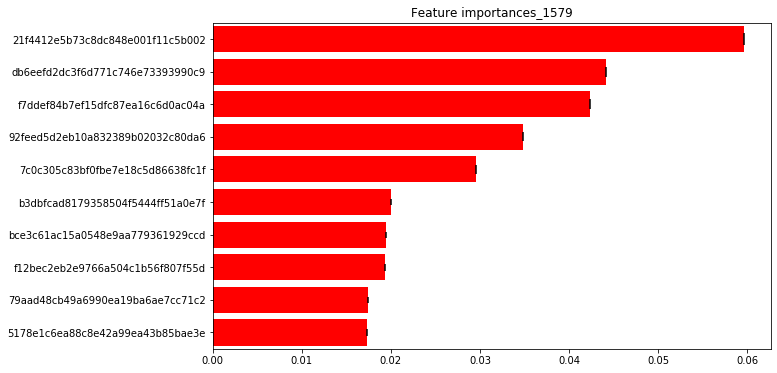

In [97]:
fig, ax = plt.subplots(figsize=(10,6))

plt.title("Feature importances_1579")
ax.barh(range(X_train_1579.shape[1]), importances_1579[indices_1579],
        color="r", yerr=std_1579[indices_1579])
plt.yticks(range(X_train_1579.shape[1]), [feature_names_1579[i] for i in indices_1579])
ax.set_ylim([-0.5,9.5])
ax.invert_yaxis() 
plt.show()

## Study 662

In [98]:
rel_feature_table_662 = pd.read_csv('662-rel-feature-table.tsv', sep='\t')
rel_feature_table_662.set_index('#OTU ID', inplace=True)
rel_feature_table_662.head()

,662.C1,662.C2,662.M1,662.M10,662.M11,662.M12,662.M13,662.M14,662.M15,662.M16,...,662.M41,662.M42,662.M43,662.M44,662.M5a,662.M5b,662.M6,662.M7,662.M8,662.M9
#OTU ID,,,,,,,,,,,,,,,,,,,,,
806f07222b2ee06190d1ed0232cb1246,0.099178,0.144333,0.033895,0.007538,0.000883,0.016008,0.396589,0.026009,0.131672,0.352920,...,0.000289,0.000000,0.000165,0.000226,0.001564,0.000565,0.000641,0.010513,0.107001,0.000439
4c7817b6390ccf9ff48bc118b91836f1,0.176916,0.119365,0.004133,0.000932,0.000000,0.000952,0.082834,0.004951,0.620542,0.411490,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000545,0.009399,0.000000
1d55aced8cd1c9a1acc8d57e4e126b1b,0.000948,0.000000,0.237229,0.000185,0.000000,0.003125,0.014543,0.001359,0.000000,0.000000,...,0.001412,0.001369,0.003084,0.000000,0.000533,0.000661,0.203195,0.002280,0.005315,0.017328
034a3d249fe2c4f09503e0dc82ff3185,0.004877,0.031146,0.040542,0.000311,0.000406,0.000000,0.000000,0.000000,0.000182,0.000000,...,0.000000,0.000000,0.002649,0.000000,0.036467,0.049545,0.097780,0.001109,0.013542,0.035044
9b4716f3e2a2dfdd307b02890dad480d,0.015569,0.007657,0.004648,0.001746,0.000212,0.000832,0.001766,0.000949,0.013526,0.036444,...,0.000070,0.000239,0.000118,0.000369,0.000841,0.000224,0.000088,0.001158,0.014578,0.000340


In [99]:
metadata_662 = pd.read_csv('662_mapping_file.txt', sep='\t')
metadata_662.head()

,#SampleID,BarcodeSequence,LinkerPrimerSequence,center_name,center_project_name,experiment_design_description,illumina_technology,instrument_model,library_construction_protocol,linker,...,qiita_empo_2,qiita_empo_3,qiita_study_id,sample_scientific_name,sample_taxid,sample_type,scientific_name,substrate_sampled,title,Description
0,662.M5b,AGAGAGACAGGT,GTGTGCCAGCMGCCGCGGTAA,U Chicago,Intertidal microbes 16s for 2009 and 2015,A 16s study of marine microbes in the intertid...,HiSeq,Illumina HiSeq 2000,"EMP V4 515f, 806rbc protocol",GT,...,Saline,Surface (saline),662,biofilm metagenome,718308,biofilm,biofilm metagenome,glass crucible lid,Intertidal microbes 16s for 2009 and 2015,biofilm brushed from crucible lid M5b
1,662.M6,CTAGCGTGCGTT,GTGTGCCAGCMGCCGCGGTAA,U Chicago,Intertidal microbes 16s for 2009 and 2016,A 16s study of marine microbes in the intertid...,HiSeq,Illumina HiSeq 2000,"EMP V4 515f, 806rbc protocol",GT,...,Saline,Surface (saline),662,biofilm metagenome,718308,biofilm,biofilm metagenome,glass crucible lid,Intertidal microbes 16s for 2009 and 2016,biofilm brushed from crucible lid M6
2,662.M7,CTAAGACGTCGT,GTGTGCCAGCMGCCGCGGTAA,U Chicago,Intertidal microbes 16s for 2009 and 2017,A 16s study of marine microbes in the intertid...,HiSeq,Illumina HiSeq 2000,"EMP V4 515f, 806rbc protocol",GT,...,Saline,Surface (saline),662,biofilm metagenome,718308,biofilm,biofilm metagenome,glass crucible lid,Intertidal microbes 16s for 2009 and 2017,biofilm brushed from crucible lid M7
3,662.M8,GATAGCACTCGT,GTGTGCCAGCMGCCGCGGTAA,U Chicago,Intertidal microbes 16s for 2009 and 2018,A 16s study of marine microbes in the intertid...,HiSeq,Illumina HiSeq 2000,"EMP V4 515f, 806rbc protocol",GT,...,Saline,Surface (saline),662,biofilm metagenome,718308,biofilm,biofilm metagenome,rock,Intertidal microbes 16s for 2009 and 2018,biofilm brushed from rock M8
4,662.M9,CATCGACGAGTT,GTGTGCCAGCMGCCGCGGTAA,U Chicago,Intertidal microbes 16s for 2009 and 2019,A 16s study of marine microbes in the intertid...,HiSeq,Illumina HiSeq 2000,"EMP V4 515f, 806rbc protocol",GT,...,Saline,Surface (saline),662,biofilm metagenome,718308,biofilm,biofilm metagenome,rock,Intertidal microbes 16s for 2009 and 2019,biofilm brushed from rock M9


### Removing Rare Features/OTUs

In [100]:
rel_feature_table_662['non_zero_percent'] = rel_feature_table_662.apply(lambda 
                                                                          row: non_zero(row), axis=1)
rel_feature_table_662 = rel_feature_table_662[rel_feature_table_662.non_zero_percent > 20]
rel_feature_table_662.drop('non_zero_percent', axis=1, inplace=True)
rel_feature_table_662.head()

,662.C1,662.C2,662.M1,662.M10,662.M11,662.M12,662.M13,662.M14,662.M15,662.M16,...,662.M41,662.M42,662.M43,662.M44,662.M5a,662.M5b,662.M6,662.M7,662.M8,662.M9
#OTU ID,,,,,,,,,,,,,,,,,,,,,
806f07222b2ee06190d1ed0232cb1246,0.099178,0.144333,0.033895,0.007538,0.000883,0.016008,0.396589,0.026009,0.131672,0.352920,...,0.000289,0.000000,0.000165,0.000226,0.001564,0.000565,0.000641,0.010513,0.107001,0.000439
4c7817b6390ccf9ff48bc118b91836f1,0.176916,0.119365,0.004133,0.000932,0.000000,0.000952,0.082834,0.004951,0.620542,0.411490,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000545,0.009399,0.000000
1d55aced8cd1c9a1acc8d57e4e126b1b,0.000948,0.000000,0.237229,0.000185,0.000000,0.003125,0.014543,0.001359,0.000000,0.000000,...,0.001412,0.001369,0.003084,0.000000,0.000533,0.000661,0.203195,0.002280,0.005315,0.017328
034a3d249fe2c4f09503e0dc82ff3185,0.004877,0.031146,0.040542,0.000311,0.000406,0.000000,0.000000,0.000000,0.000182,0.000000,...,0.000000,0.000000,0.002649,0.000000,0.036467,0.049545,0.097780,0.001109,0.013542,0.035044
9b4716f3e2a2dfdd307b02890dad480d,0.015569,0.007657,0.004648,0.001746,0.000212,0.000832,0.001766,0.000949,0.013526,0.036444,...,0.000070,0.000239,0.000118,0.000369,0.000841,0.000224,0.000088,0.001158,0.014578,0.000340


#### Renormalize to get sum of features (here relative abundances) equal to one for each sample

In [101]:
rel_feature_table_662 = rel_feature_table_662.div(rel_feature_table_662.sum(axis=1), axis=0)
#rel_feature_table_662['sum'] = rel_feature_table_662.sum(axis=1)
#rel_feature_table_662.drop('sum', axis=1, inplace=True)

#### Transforming data (standardize) by coverting to z-score

In [102]:
rel_feature_table_662_zscore = rel_feature_table_662.apply(zscore)
rel_feature_table_662_zscore.head()

,662.C1,662.C2,662.M1,662.M10,662.M11,662.M12,662.M13,662.M14,662.M15,662.M16,...,662.M41,662.M42,662.M43,662.M44,662.M5a,662.M5b,662.M6,662.M7,662.M8,662.M9
#OTU ID,,,,,,,,,,,,,,,,,,,,,
806f07222b2ee06190d1ed0232cb1246,0.574921,0.930730,0.089332,-0.292687,-0.068919,-0.227559,4.451750,-0.163390,1.443975,5.136400,...,-0.528406,-0.438828,-0.667725,-0.452409,-0.377328,-0.326212,-0.429807,-0.439029,0.133907,-0.417650
4c7817b6390ccf9ff48bc118b91836f1,1.684135,1.028657,-0.203020,-0.331402,-0.135687,-0.303660,1.030811,-0.277272,9.483785,7.922746,...,-0.530293,-0.438828,-0.668967,-0.453815,-0.389174,-0.330669,-0.435015,-0.488191,-0.468862,-0.421631
1d55aced8cd1c9a1acc8d57e4e126b1b,-0.237781,-0.226974,4.488957,-0.336686,-0.135687,-0.278688,0.077020,-0.299704,-0.107942,-0.129861,...,-0.512307,-0.424060,-0.623644,-0.453815,-0.381301,-0.320506,2.780929,-0.469482,-0.481386,-0.115232
034a3d249fe2c4f09503e0dc82ff3185,-0.149045,0.412148,0.806235,-0.334023,-0.057112,-0.310096,-0.259742,-0.315156,-0.102466,-0.129861,...,-0.530293,-0.438828,-0.617881,-0.453815,0.317555,0.669562,1.596165,-0.477544,-0.326767,0.391670
9b4716f3e2a2dfdd307b02890dad480d,-0.029452,-0.121262,-0.176526,-0.320475,-0.108105,-0.302713,-0.223626,-0.305623,0.166459,0.806171,...,-0.529511,-0.436547,-0.667440,-0.449861,-0.378211,-0.327630,-0.433779,-0.481774,-0.387589,-0.416320


In [103]:
rel_feature_table_662_transpose = rel_feature_table_662_zscore.transpose()
rel_feature_table_662_transpose.reset_index(inplace=True)
rel_feature_table_662_transpose.head()

#OTU ID,index,806f07222b2ee06190d1ed0232cb1246,4c7817b6390ccf9ff48bc118b91836f1,1d55aced8cd1c9a1acc8d57e4e126b1b,034a3d249fe2c4f09503e0dc82ff3185,9b4716f3e2a2dfdd307b02890dad480d,a3ab62ff725bac0f9e83ea0541aac2aa,d1ca2ca6050e76f1527b4d403dd69734,27cc054547519452d57055b6b898d318,115c613109e1feba04bffc274c570f0f,...,59247418ac5b4f976515eec6ee05d816,6c4aafcc8b714c2c63de3a376bd64381,f2cfe7fd672709d02928c31559373c9e,7c15ed21e54728c879e2e86d9ece03f1,e490db5b624ff6710e53b15aa0f579fe,104469b00be16e826f3cbea3cd748d68,db36c3aed986860d600e0fdecf9a245c,9c9e862c926c0dfa68ece49aaf25e144,b5202f32bb633c3811a14c82d7453509,20fb19136419ba2826c941aa152fa0eb
0,662.C1,0.574921,1.684135,-0.237781,-0.149045,-0.029452,0.103037,-0.224531,-0.226039,-0.253218,...,0.203928,-0.253218,-0.253218,-0.253218,-0.253218,-0.253218,0.637429,-0.253218,-0.253218,2.675911
1,662.C2,0.930730,1.028657,-0.226974,0.412148,-0.121262,-0.212050,-0.205140,-0.226974,-0.226974,...,-0.226974,-0.226974,-0.226974,-0.226974,-0.226974,1.116970,-0.226974,-0.226974,-0.226974,-0.226974
2,662.M1,0.089332,-0.203020,4.488957,0.806235,-0.176526,0.166691,-0.222664,6.387625,1.730115,...,-0.258675,-0.258675,-0.258675,-0.258675,-0.258675,-0.258675,-0.258675,-0.258675,-0.258675,-0.258675
3,662.M10,-0.292687,-0.331402,-0.336686,-0.334023,-0.320475,-0.254226,-0.223982,-0.334771,-0.338895,...,-0.338895,-0.338895,-0.338895,-0.338895,-0.338895,1.854086,-0.338895,-0.338895,-0.338895,1.438890
4,662.M11,-0.068919,-0.135687,-0.135687,-0.057112,-0.108105,-0.135687,-0.135687,0.113946,-0.135687,...,1.679981,-0.135687,-0.135687,-0.135687,-0.135687,-0.135687,-0.135687,-0.135687,-0.135687,-0.135687


In [104]:
category_metadata_662 = metadata_662[['#SampleID', 'substrate_sampled']]
category_metadata_662.head()

,#SampleID,substrate_sampled
0,662.M5b,glass crucible lid
1,662.M6,glass crucible lid
2,662.M7,glass crucible lid
3,662.M8,rock
4,662.M9,rock


In [105]:
rel_abundance_with_category_662 = pd.merge(rel_feature_table_662_transpose,category_metadata_662, 
                                           left_on = 'index', right_on='#SampleID')
rel_abundance_with_category_662.set_index('#SampleID',inplace=True)
rel_abundance_with_category_662.drop('index',axis=1, inplace=True)
rel_abundance_with_category_662.head()

,806f07222b2ee06190d1ed0232cb1246,4c7817b6390ccf9ff48bc118b91836f1,1d55aced8cd1c9a1acc8d57e4e126b1b,034a3d249fe2c4f09503e0dc82ff3185,9b4716f3e2a2dfdd307b02890dad480d,a3ab62ff725bac0f9e83ea0541aac2aa,d1ca2ca6050e76f1527b4d403dd69734,27cc054547519452d57055b6b898d318,115c613109e1feba04bffc274c570f0f,e18d454c7188ec54fd1304db5386c19a,...,6c4aafcc8b714c2c63de3a376bd64381,f2cfe7fd672709d02928c31559373c9e,7c15ed21e54728c879e2e86d9ece03f1,e490db5b624ff6710e53b15aa0f579fe,104469b00be16e826f3cbea3cd748d68,db36c3aed986860d600e0fdecf9a245c,9c9e862c926c0dfa68ece49aaf25e144,b5202f32bb633c3811a14c82d7453509,20fb19136419ba2826c941aa152fa0eb,substrate_sampled
#SampleID,,,,,,,,,,,,,,,,,,,,,
662.C1,0.574921,1.684135,-0.237781,-0.149045,-0.029452,0.103037,-0.224531,-0.226039,-0.253218,-0.253218,...,-0.253218,-0.253218,-0.253218,-0.253218,-0.253218,0.637429,-0.253218,-0.253218,2.675911,Mytilus californianus shell
662.C2,0.930730,1.028657,-0.226974,0.412148,-0.121262,-0.212050,-0.205140,-0.226974,-0.226974,-0.226974,...,-0.226974,-0.226974,-0.226974,-0.226974,1.116970,-0.226974,-0.226974,-0.226974,-0.226974,Mytilus californianus shell
662.M1,0.089332,-0.203020,4.488957,0.806235,-0.176526,0.166691,-0.222664,6.387625,1.730115,-0.258675,...,-0.258675,-0.258675,-0.258675,-0.258675,-0.258675,-0.258675,-0.258675,-0.258675,-0.258675,glass crucible lid
662.M10,-0.292687,-0.331402,-0.336686,-0.334023,-0.320475,-0.254226,-0.223982,-0.334771,-0.338895,-0.338895,...,-0.338895,-0.338895,-0.338895,-0.338895,1.854086,-0.338895,-0.338895,-0.338895,1.438890,rock
662.M11,-0.068919,-0.135687,-0.135687,-0.057112,-0.108105,-0.135687,-0.135687,0.113946,-0.135687,-0.135687,...,-0.135687,-0.135687,-0.135687,-0.135687,-0.135687,-0.135687,-0.135687,-0.135687,-0.135687,Prionitis red algae


In [106]:
rel_abundance_with_category_662['substrate_sampled'] = rel_abundance_with_category_662['substrate_sampled'].astype('category')
rel_abundance_with_category_662['substrate_sampled_num'] = rel_abundance_with_category_662['substrate_sampled'].cat.codes
rel_abundance_with_category_662.head()

,806f07222b2ee06190d1ed0232cb1246,4c7817b6390ccf9ff48bc118b91836f1,1d55aced8cd1c9a1acc8d57e4e126b1b,034a3d249fe2c4f09503e0dc82ff3185,9b4716f3e2a2dfdd307b02890dad480d,a3ab62ff725bac0f9e83ea0541aac2aa,d1ca2ca6050e76f1527b4d403dd69734,27cc054547519452d57055b6b898d318,115c613109e1feba04bffc274c570f0f,e18d454c7188ec54fd1304db5386c19a,...,f2cfe7fd672709d02928c31559373c9e,7c15ed21e54728c879e2e86d9ece03f1,e490db5b624ff6710e53b15aa0f579fe,104469b00be16e826f3cbea3cd748d68,db36c3aed986860d600e0fdecf9a245c,9c9e862c926c0dfa68ece49aaf25e144,b5202f32bb633c3811a14c82d7453509,20fb19136419ba2826c941aa152fa0eb,substrate_sampled,substrate_sampled_num
#SampleID,,,,,,,,,,,,,,,,,,,,,
662.C1,0.574921,1.684135,-0.237781,-0.149045,-0.029452,0.103037,-0.224531,-0.226039,-0.253218,-0.253218,...,-0.253218,-0.253218,-0.253218,-0.253218,0.637429,-0.253218,-0.253218,2.675911,Mytilus californianus shell,3
662.C2,0.930730,1.028657,-0.226974,0.412148,-0.121262,-0.212050,-0.205140,-0.226974,-0.226974,-0.226974,...,-0.226974,-0.226974,-0.226974,1.116970,-0.226974,-0.226974,-0.226974,-0.226974,Mytilus californianus shell,3
662.M1,0.089332,-0.203020,4.488957,0.806235,-0.176526,0.166691,-0.222664,6.387625,1.730115,-0.258675,...,-0.258675,-0.258675,-0.258675,-0.258675,-0.258675,-0.258675,-0.258675,-0.258675,glass crucible lid,7
662.M10,-0.292687,-0.331402,-0.336686,-0.334023,-0.320475,-0.254226,-0.223982,-0.334771,-0.338895,-0.338895,...,-0.338895,-0.338895,-0.338895,1.854086,-0.338895,-0.338895,-0.338895,1.438890,rock,8
662.M11,-0.068919,-0.135687,-0.135687,-0.057112,-0.108105,-0.135687,-0.135687,0.113946,-0.135687,-0.135687,...,-0.135687,-0.135687,-0.135687,-0.135687,-0.135687,-0.135687,-0.135687,-0.135687,Prionitis red algae,5


## Random Forest 662

In [107]:
X_train_662, X_test_662, y_train_662, y_test_662 = train_test_split(
    rel_abundance_with_category_662.drop(['substrate_sampled', 'substrate_sampled_num'], axis=1).dropna(), 
    rel_abundance_with_category_662.dropna()['substrate_sampled_num'], test_size=0.4, random_state=40)

rfc_662 = RandomForestClassifier(n_estimators=1001, random_state=np.random.seed(151), oob_score=True)
rfc_662.fit(X_train_662, y_train_662)
rfc_pred_662 = rfc_662.predict(X_test_662)

print(rfc_662.oob_score_)

0.6428571428571429


In [108]:
print(confusion_matrix(y_test_662,rfc_pred_662))
print(classification_report(y_test_662,rfc_pred_662))

[[1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 3 0 3]
 [0 0 0 0 0 0 0 0 2]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.62      1.00      0.77         5
           7       0.00      0.00      0.00         6
           8       0.40      1.00      0.57         2

    accuracy                           0.42        19
   macro avg       0.22      0.28      0.22        19
weighted avg       0.31      0.42      0.33        19



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [109]:
accuracy_662 = cross_val_score(rfc_662, X_train_662, y_train_662, scoring='accuracy', cv = 10)
print(accuracy_662.mean()*100)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


79.41666666666667


### Feature Selection

In [110]:
feature_names_662 = rel_abundance_with_category_662.drop(['substrate_sampled', 'substrate_sampled_num'], 
                                                      axis=1).columns
importances_662 = rfc_662.feature_importances_
std_662 = np.std([tree.feature_importances_ for tree in rfc_662.estimators_],
             axis=0)
indices_662 = np.argsort(importances_662)[::-1]
for i in range(20):
    print(str(i+1)+') ' , feature_names_662[indices_662[i]], 
          '(', importances_662[indices_662[i]], ')')

1)  d1ca2ca6050e76f1527b4d403dd69734 ( 0.012803287021204143 )
2)  6a11fbbe0cd724d68ba66e7f31b72470 ( 0.012314207757551586 )
3)  b5138f74349bb319025ea7b401b0b933 ( 0.012125609108477618 )
4)  f7432094e6694eb6e00476449a3d0737 ( 0.011875713908605581 )
5)  7bf604601796fe5c517e3f52840b77de ( 0.011505706739732544 )
6)  8dbeeaa38fd73bb84090c8e06838084c ( 0.010847432518648538 )
7)  ca0faabff4ea9c4d1eb4014eeab82f46 ( 0.01050065856786937 )
8)  aa48dd3198f6ede9238761414d3de0af ( 0.009542547855056305 )
9)  e4f8334c46bd5338750784fc2d5d64e0 ( 0.00951085892804723 )
10)  c0123e1dcfb7bf43eb1d9d600a3891aa ( 0.009440662739639238 )
11)  27cc054547519452d57055b6b898d318 ( 0.009287666751306494 )
12)  579165c334fd8556b37b2effba60ee1e ( 0.0091441860791124 )
13)  afede6d9aa8210bc3d25c9253a7a4f84 ( 0.008996991690382447 )
14)  ea243fe675bc2b974179000a978cd9d4 ( 0.008936435005624709 )
15)  7d35bdf2770b0a33669a31f3aeb0eecc ( 0.008477530566662016 )
16)  a7131863722fb99a44ad1ff828841cce ( 0.008358254075878657 )
17)  

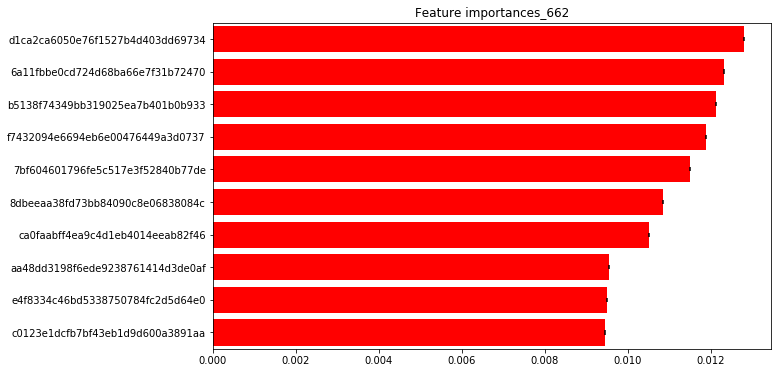

In [111]:
fig, ax = plt.subplots(figsize=(10,6))

plt.title("Feature importances_662")
ax.barh(range(X_train_662.shape[1]), importances_662[indices_662],
        color="r", yerr=std_662[indices_662])
plt.yticks(range(X_train_662.shape[1]), [feature_names_662[i] for i in indices_662])
ax.set_ylim([-0.5,9.5])
ax.invert_yaxis() 
plt.show()

## Study PRJEB11496 ENA

In [112]:
rel_feature_table_11496 = pd.read_csv('rel-feature-table-PRJEB11496.tsv', sep='\t')
rel_feature_table_11496.set_index('#OTU ID', inplace=True)
rel_feature_table_11496.head()

,ERR1144112,ERR1144113,ERR1144114,ERR1144115,ERR1144116,ERR1144117,ERR1144118,ERR1144119,ERR1144120,ERR1144121,...,ERR1144126,ERR1144127,ERR1144128,ERR1144129,ERR1144130,ERR1144131,ERR1144132,ERR1144133,ERR1144134,ERR1144135
#OTU ID,,,,,,,,,,,,,,,,,,,,,
0fd37bd1907b7290a345be00eea52f4f,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.060171,0.107931,0.353671,0.090455,0.445159,0.449914,0.571211,0.073912,0.345528,0.278411
b51805b804b6cc246d245c4337156c73,0.000153,0.003170,0.000000,0.000000,0.036352,0.034680,0.004864,0.035705,0.047230,0.001686,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ad7cea3f47c9e64cbe5f5544c27fb1c5,0.038262,0.004982,0.035244,0.024896,0.008682,0.004269,0.009261,0.008861,0.005133,0.010354,...,0.006765,0.010229,0.005702,0.004906,0.003547,0.003245,0.002963,0.004863,0.006020,0.006939
a7c0e5b81d8f91d217059d6d45bb4a9c,0.018380,0.009375,0.021555,0.014255,0.010490,0.007970,0.008752,0.008217,0.008015,0.010117,...,0.014077,0.016514,0.011572,0.006844,0.005312,0.008883,0.008495,0.012478,0.016758,0.010602
3f1cc8a0edd0da50ade33268031fe9df,0.016333,0.002315,0.025403,0.009847,0.015197,0.006608,0.003643,0.013913,0.020756,0.004201,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [113]:
metadata_11496 = pd.read_csv('Metadata_PRJEB11496.tsv', sep='\t')
metadata_11496.head()

,#SampleID,sample_accession,experiment_accession,tax_id,scientific_name,instrument_platform,nominal_length,library_layout,library_strategy,library_source,...,center_name,first_public,experiment_title,fastq_ftp,submitted_ftp,sra_ftp,sample_alias,sample_title,site_id,site_name
0,ERR1144112,SAMEA3672678,ERX1222922,749907,sediment metagenome,ILLUMINA,250,PAIRED,AMPLICON,METAGENOMIC,...,Central Michigan University,12/23/2015,Illumina MiSeq paired end sequencing,ftp.sra.ebi.ac.uk/vol1/fastq/ERR114/002/ERR114...,ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR1144112/1...,ftp.sra.ebi.ac.uk/vol1/err/ERR114/002/ERR1144112,ANT_C1_1,C1.E108,C1,Western Antarctica
1,ERR1144113,SAMEA3672679,ERX1222923,749907,sediment metagenome,ILLUMINA,250,PAIRED,AMPLICON,METAGENOMIC,...,Central Michigan University,12/23/2015,Illumina MiSeq paired end sequencing,ftp.sra.ebi.ac.uk/vol1/fastq/ERR114/003/ERR114...,ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR1144113/1...,ftp.sra.ebi.ac.uk/vol1/err/ERR114/003/ERR1144113,ANT_C1_10,C1.E64,C1,Western Antarctica
2,ERR1144114,SAMEA3672680,ERX1222924,749907,sediment metagenome,ILLUMINA,250,PAIRED,AMPLICON,METAGENOMIC,...,Central Michigan University,12/23/2015,Illumina MiSeq paired end sequencing,ftp.sra.ebi.ac.uk/vol1/fastq/ERR114/004/ERR114...,ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR1144114/1...,ftp.sra.ebi.ac.uk/vol1/err/ERR114/004/ERR1144114,ANT_C1_11,C1.E75,C1,Western Antarctica
3,ERR1144115,SAMEA3672681,ERX1222925,749907,sediment metagenome,ILLUMINA,250,PAIRED,AMPLICON,METAGENOMIC,...,Central Michigan University,12/23/2015,Illumina MiSeq paired end sequencing,ftp.sra.ebi.ac.uk/vol1/fastq/ERR114/005/ERR114...,ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR1144115/1...,ftp.sra.ebi.ac.uk/vol1/err/ERR114/005/ERR1144115,ANT_C1_12,C1.E11,C1,Western Antarctica
4,ERR1144116,SAMEA3672682,ERX1222926,749907,sediment metagenome,ILLUMINA,250,PAIRED,AMPLICON,METAGENOMIC,...,Central Michigan University,12/23/2015,Illumina MiSeq paired end sequencing,ftp.sra.ebi.ac.uk/vol1/fastq/ERR114/006/ERR114...,ftp.sra.ebi.ac.uk/vol1/run/ERR114/ERR1144116/1...,ftp.sra.ebi.ac.uk/vol1/err/ERR114/006/ERR1144116,ANT_C1_13,C1.E17,C1,Western Antarctica


### Removing Rare Features/OTUs

In [114]:
rel_feature_table_11496['non_zero_percent'] = rel_feature_table_11496.apply(lambda 
                                                                          row: non_zero(row), axis=1)
rel_feature_table_11496 = rel_feature_table_11496[rel_feature_table_11496.non_zero_percent > 20]
rel_feature_table_11496.drop('non_zero_percent', axis=1, inplace=True)
rel_feature_table_11496.head()

,ERR1144112,ERR1144113,ERR1144114,ERR1144115,ERR1144116,ERR1144117,ERR1144118,ERR1144119,ERR1144120,ERR1144121,...,ERR1144126,ERR1144127,ERR1144128,ERR1144129,ERR1144130,ERR1144131,ERR1144132,ERR1144133,ERR1144134,ERR1144135
#OTU ID,,,,,,,,,,,,,,,,,,,,,
0fd37bd1907b7290a345be00eea52f4f,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.060171,0.107931,0.353671,0.090455,0.445159,0.449914,0.571211,0.073912,0.345528,0.278411
b51805b804b6cc246d245c4337156c73,0.000153,0.003170,0.000000,0.000000,0.036352,0.034680,0.004864,0.035705,0.047230,0.001686,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ad7cea3f47c9e64cbe5f5544c27fb1c5,0.038262,0.004982,0.035244,0.024896,0.008682,0.004269,0.009261,0.008861,0.005133,0.010354,...,0.006765,0.010229,0.005702,0.004906,0.003547,0.003245,0.002963,0.004863,0.006020,0.006939
a7c0e5b81d8f91d217059d6d45bb4a9c,0.018380,0.009375,0.021555,0.014255,0.010490,0.007970,0.008752,0.008217,0.008015,0.010117,...,0.014077,0.016514,0.011572,0.006844,0.005312,0.008883,0.008495,0.012478,0.016758,0.010602
3f1cc8a0edd0da50ade33268031fe9df,0.016333,0.002315,0.025403,0.009847,0.015197,0.006608,0.003643,0.013913,0.020756,0.004201,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### Renormalize to get sum of features (here relative abundance) equal to one for each sample 

In [115]:
rel_feature_table_11496 = rel_feature_table_11496.div(rel_feature_table_11496.sum(axis=1), axis=0)
#rel_feature_table_11496['sum'] = rel_feature_table_11496.sum(axis=1)
#rel_feature_table_11496.drop('sum', axis=1, inplace=True)

#### Transforming data (standardize) by conversting to z-score

In [116]:
rel_feature_table_11496_zscore = rel_feature_table_11496.apply(zscore)
rel_feature_table_11496_zscore.head()

,ERR1144112,ERR1144113,ERR1144114,ERR1144115,ERR1144116,ERR1144117,ERR1144118,ERR1144119,ERR1144120,ERR1144121,...,ERR1144126,ERR1144127,ERR1144128,ERR1144129,ERR1144130,ERR1144131,ERR1144132,ERR1144133,ERR1144134,ERR1144135
#OTU ID,,,,,,,,,,,,,,,,,,,,,
0fd37bd1907b7290a345be00eea52f4f,-0.787721,-0.726731,-0.765457,-0.694584,-0.980920,-0.771505,-0.793459,-0.894900,-0.864227,-0.967616,...,-0.156701,0.213348,1.922648,0.125481,4.209440,3.774829,6.948453,-0.022159,1.736812,1.555067
b51805b804b6cc246d245c4337156c73,-0.778215,-0.559343,-0.765457,-0.694584,1.555168,1.317366,-0.508285,1.366052,2.318230,-0.856999,...,-0.454178,-0.419943,-0.388493,-0.376076,-0.339561,-0.261332,-0.318229,-0.416584,-0.368963,-0.409051
ad7cea3f47c9e64cbe5f5544c27fb1c5,1.603530,-0.462795,1.663340,0.971203,-0.373318,-0.513546,-0.248821,-0.331986,-0.517220,-0.286088,...,-0.035753,0.330898,0.077685,-0.035739,0.113942,0.102794,0.153365,-0.091940,0.089982,0.203362
a7c0e5b81d8f91d217059d6d45bb4a9c,0.199279,-0.299982,0.510895,0.124923,-0.350113,-0.357719,-0.351190,-0.446423,-0.398724,-0.395427,...,0.293881,0.621577,0.424304,0.031805,0.243867,0.595279,0.843423,0.299141,0.728841,0.394881
3f1cc8a0edd0da50ade33268031fe9df,0.825737,-0.532846,2.001703,0.346856,0.700286,-0.140332,-0.454812,0.502096,1.353542,-0.530571,...,-0.454178,-0.419943,-0.388493,-0.376076,-0.339561,-0.261332,-0.318229,-0.416584,-0.368963,-0.409051


In [117]:
rel_feature_table_11496_transpose = rel_feature_table_11496_zscore.transpose()
rel_feature_table_11496_transpose.reset_index(inplace=True)
rel_feature_table_11496_transpose.head()

#OTU ID,index,0fd37bd1907b7290a345be00eea52f4f,b51805b804b6cc246d245c4337156c73,ad7cea3f47c9e64cbe5f5544c27fb1c5,a7c0e5b81d8f91d217059d6d45bb4a9c,3f1cc8a0edd0da50ade33268031fe9df,bd704202329f8ef0e1b2266e6861ca88,e45a612e36aeaa4e8fa5d18d8f151c36,29e8ae0f8c939e1939fe1a0c2ef72098,74968ebe072e538fb82e979d8986ad5b,...,56b5057779fa4d860593ca961e579d91,a49dc4995b9c5155a4d36b42657e4ca9,ae8ab79c10f4dfe766da29853e2d44a1,b08e46f6fd64da88a4bb5ec70eafbf2c,1468f6fcb343eef09f6aba2e858ff4ff,cfd8eee55c3b83214cb2c9c0120c8b1f,99b37a45fccbe2df7d0e1664e3fad9f9,fd586f334c946c1f4283cfe296beeaf4,aa4655d57b1659c56844c1959421edad,117edf1447b71b674365eb0dfb55d462
0,ERR1144112,-0.787721,-0.778215,1.603530,0.199279,0.825737,0.488462,0.109557,-0.423218,-0.730809,...,-0.787721,-0.787721,0.510433,0.505175,-0.787721,-0.787721,-0.787721,-0.124129,-0.787721,-0.787721
1,ERR1144113,-0.726731,-0.559343,-0.462795,-0.299982,-0.532846,-0.488858,0.787263,0.398838,-0.291505,...,-0.726731,-0.726731,2.645662,-0.726731,-0.726731,-0.726731,-0.726731,0.307611,-0.726731,-0.726731
2,ERR1144114,-0.765457,-0.765457,1.663340,0.510895,2.001703,-0.034119,-0.473822,-0.458935,-0.575902,...,-0.765457,-0.765457,-0.765457,-0.765457,2.759263,-0.765457,-0.765457,-0.434199,-0.765457,-0.254507
3,ERR1144115,-0.694584,-0.694584,0.971203,0.124923,0.346856,1.335559,0.192640,-0.320069,-0.267581,...,-0.694584,-0.178625,-0.694584,2.754261,0.426559,0.948970,-0.694584,3.362022,0.462456,2.433980
4,ERR1144116,-0.980920,1.555168,-0.373318,-0.350113,0.700286,-0.434812,-0.400823,-0.473001,-0.977398,...,-0.980920,-0.980920,-0.980920,-0.980920,0.408501,-0.980920,3.272808,5.417472,-0.980920,-0.980920


In [118]:
category_metadata_11496 = metadata_11496[['#SampleID', 'site_name']]
category_metadata_11496.head()

,#SampleID,site_name
0,ERR1144112,Western Antarctica
1,ERR1144113,Western Antarctica
2,ERR1144114,Western Antarctica
3,ERR1144115,Western Antarctica
4,ERR1144116,Western Antarctica


In [119]:
rel_abundance_with_category_11496 = pd.merge(rel_feature_table_11496_transpose,category_metadata_11496, 
                                           left_on = 'index', right_on='#SampleID')
rel_abundance_with_category_11496.set_index('#SampleID',inplace=True)
rel_abundance_with_category_11496.drop('index',axis=1, inplace=True)
rel_abundance_with_category_11496.head()

,0fd37bd1907b7290a345be00eea52f4f,b51805b804b6cc246d245c4337156c73,ad7cea3f47c9e64cbe5f5544c27fb1c5,a7c0e5b81d8f91d217059d6d45bb4a9c,3f1cc8a0edd0da50ade33268031fe9df,bd704202329f8ef0e1b2266e6861ca88,e45a612e36aeaa4e8fa5d18d8f151c36,29e8ae0f8c939e1939fe1a0c2ef72098,74968ebe072e538fb82e979d8986ad5b,f34e6f052a17ab4cf55a0494faefbbda,...,a49dc4995b9c5155a4d36b42657e4ca9,ae8ab79c10f4dfe766da29853e2d44a1,b08e46f6fd64da88a4bb5ec70eafbf2c,1468f6fcb343eef09f6aba2e858ff4ff,cfd8eee55c3b83214cb2c9c0120c8b1f,99b37a45fccbe2df7d0e1664e3fad9f9,fd586f334c946c1f4283cfe296beeaf4,aa4655d57b1659c56844c1959421edad,117edf1447b71b674365eb0dfb55d462,site_name
#SampleID,,,,,,,,,,,,,,,,,,,,,
ERR1144112,-0.787721,-0.778215,1.603530,0.199279,0.825737,0.488462,0.109557,-0.423218,-0.730809,-0.418131,...,-0.787721,0.510433,0.505175,-0.787721,-0.787721,-0.787721,-0.124129,-0.787721,-0.787721,Western Antarctica
ERR1144113,-0.726731,-0.559343,-0.462795,-0.299982,-0.532846,-0.488858,0.787263,0.398838,-0.291505,-0.044433,...,-0.726731,2.645662,-0.726731,-0.726731,-0.726731,-0.726731,0.307611,-0.726731,-0.726731,Western Antarctica
ERR1144114,-0.765457,-0.765457,1.663340,0.510895,2.001703,-0.034119,-0.473822,-0.458935,-0.575902,-0.256772,...,-0.765457,-0.765457,-0.765457,2.759263,-0.765457,-0.765457,-0.434199,-0.765457,-0.254507,Western Antarctica
ERR1144115,-0.694584,-0.694584,0.971203,0.124923,0.346856,1.335559,0.192640,-0.320069,-0.267581,-0.370797,...,-0.178625,-0.694584,2.754261,0.426559,0.948970,-0.694584,3.362022,0.462456,2.433980,Western Antarctica
ERR1144116,-0.980920,1.555168,-0.373318,-0.350113,0.700286,-0.434812,-0.400823,-0.473001,-0.977398,0.141913,...,-0.980920,-0.980920,-0.980920,0.408501,-0.980920,3.272808,5.417472,-0.980920,-0.980920,Western Antarctica


In [120]:
rel_abundance_with_category_11496['site_name'] = rel_abundance_with_category_11496['site_name'].astype('category')
rel_abundance_with_category_11496['site_name_num'] = rel_abundance_with_category_11496['site_name'].cat.codes
rel_abundance_with_category_11496.head()

,0fd37bd1907b7290a345be00eea52f4f,b51805b804b6cc246d245c4337156c73,ad7cea3f47c9e64cbe5f5544c27fb1c5,a7c0e5b81d8f91d217059d6d45bb4a9c,3f1cc8a0edd0da50ade33268031fe9df,bd704202329f8ef0e1b2266e6861ca88,e45a612e36aeaa4e8fa5d18d8f151c36,29e8ae0f8c939e1939fe1a0c2ef72098,74968ebe072e538fb82e979d8986ad5b,f34e6f052a17ab4cf55a0494faefbbda,...,ae8ab79c10f4dfe766da29853e2d44a1,b08e46f6fd64da88a4bb5ec70eafbf2c,1468f6fcb343eef09f6aba2e858ff4ff,cfd8eee55c3b83214cb2c9c0120c8b1f,99b37a45fccbe2df7d0e1664e3fad9f9,fd586f334c946c1f4283cfe296beeaf4,aa4655d57b1659c56844c1959421edad,117edf1447b71b674365eb0dfb55d462,site_name,site_name_num
#SampleID,,,,,,,,,,,,,,,,,,,,,
ERR1144112,-0.787721,-0.778215,1.603530,0.199279,0.825737,0.488462,0.109557,-0.423218,-0.730809,-0.418131,...,0.510433,0.505175,-0.787721,-0.787721,-0.787721,-0.124129,-0.787721,-0.787721,Western Antarctica,1
ERR1144113,-0.726731,-0.559343,-0.462795,-0.299982,-0.532846,-0.488858,0.787263,0.398838,-0.291505,-0.044433,...,2.645662,-0.726731,-0.726731,-0.726731,-0.726731,0.307611,-0.726731,-0.726731,Western Antarctica,1
ERR1144114,-0.765457,-0.765457,1.663340,0.510895,2.001703,-0.034119,-0.473822,-0.458935,-0.575902,-0.256772,...,-0.765457,-0.765457,2.759263,-0.765457,-0.765457,-0.434199,-0.765457,-0.254507,Western Antarctica,1
ERR1144115,-0.694584,-0.694584,0.971203,0.124923,0.346856,1.335559,0.192640,-0.320069,-0.267581,-0.370797,...,-0.694584,2.754261,0.426559,0.948970,-0.694584,3.362022,0.462456,2.433980,Western Antarctica,1
ERR1144116,-0.980920,1.555168,-0.373318,-0.350113,0.700286,-0.434812,-0.400823,-0.473001,-0.977398,0.141913,...,-0.980920,-0.980920,0.408501,-0.980920,3.272808,5.417472,-0.980920,-0.980920,Western Antarctica,1


## Random Forest PREJB11496

In [121]:
X_train_11496, X_test_11496, y_train_11496, y_test_11496 = train_test_split(
    rel_abundance_with_category_11496.drop(['site_name', 'site_name_num'], axis=1).dropna(), 
    rel_abundance_with_category_11496.dropna()['site_name_num'], test_size=0.4, random_state=40)

rfc_11496 = RandomForestClassifier(n_estimators=502, random_state=np.random.seed(151), oob_score=True)
rfc_11496.fit(X_train_11496, y_train_11496)
rfc_pred_11496 = rfc_11496.predict(X_test_11496)

print(rfc_11496.oob_score_)

0.9285714285714286


In [122]:
print(confusion_matrix(y_test_11496,rfc_pred_11496))
print(classification_report(y_test_11496,rfc_pred_11496))

[[7 0]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [123]:
accuracy_11496 = cross_val_score(rfc_11496, X_train_11496, y_train_11496, scoring='accuracy', cv = 10)
print(accuracy_11496.mean()*100)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


100.0


### Feature Selection

In [124]:
feature_names_11496 = rel_abundance_with_category_11496.drop(['site_name', 'site_name_num'], 
                                                      axis=1).columns
importances_11496 = rfc_11496.feature_importances_
std_11496 = np.std([tree.feature_importances_ for tree in rfc_11496.estimators_],
             axis=0)
indices_11496 = np.argsort(importances_11496)[::-1]
for i in range(20):
    print(str(i+1)+') ' , feature_names_11496[indices_11496[i]], 
          '(', importances_11496[indices_11496[i]], ')')

1)  5a90f8a53a5123aca1915680bad9a8b7 ( 0.010040160642570281 )
2)  c2a5de7496963aa1e13a23295101c6dc ( 0.008032128514056224 )
3)  c7df1194d397e99d212482e751df4197 ( 0.008032128514056224 )
4)  4b277e926183e6921c318df4b87f20e4 ( 0.008032128514056224 )
5)  1aeaf9b1dd128176418f0962f0233ec6 ( 0.008032128514056224 )
6)  f87dd86347f5c02a52a297bdd0509fff ( 0.008032128514056224 )
7)  4e019812e80b5920062f9b77c43e4a56 ( 0.008032128514056224 )
8)  3fc8d94dca61e6727f7c9ca107c70907 ( 0.008032128514056224 )
9)  fb53f9d0b7b673dd4b62598af68fbc70 ( 0.008032128514056224 )
10)  382bd74907a04745af5fec635e415abe ( 0.006024096385542169 )
11)  1e573c73e8a210acbc951b56dcafdcc8 ( 0.006024096385542169 )
12)  f91bf17ba87d3de259bb6c863e54e8b0 ( 0.006024096385542169 )
13)  f75bf3d266591e69f34e8a0a35fbb222 ( 0.006024096385542169 )
14)  8d59876bbe8468f21fe73fd6ca3c3f6e ( 0.006024096385542169 )
15)  12a4c37d5d84b58da9b510771582088c ( 0.006024096385542169 )
16)  5178e9441cf8c8b2c71fabcd4068b15c ( 0.006024096385542169 )
1

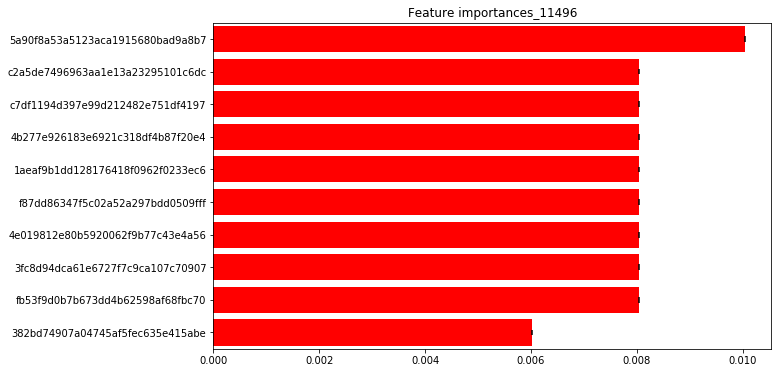

In [125]:
fig, ax = plt.subplots(figsize=(10,6))

plt.title("Feature importances_11496")
ax.barh(range(X_train_11496.shape[1]), importances_11496[indices_11496],
        color="r", yerr=std_11496[indices_11496])
plt.yticks(range(X_train_11496.shape[1]), [feature_names_11496[i] for i in indices_11496])
ax.set_ylim([-0.5,9.5])
ax.invert_yaxis() 
plt.show()

## Study PRJEB11689 ENA

In [126]:
rel_feature_table_11689 = pd.read_csv('rel-feature-table-PRJEB11689.tsv', sep='\t')
rel_feature_table_11689.set_index('#OTU ID', inplace=True)
rel_feature_table_11689.head()

,ERR1111102,ERR1111103,ERR1111104,ERR1111105,ERR1111106,ERR1111107,ERR1111108,ERR1111109,ERR1111110,ERR1111111,...,ERR1111130,ERR1111131,ERR1111132,ERR1111133,ERR1111135,ERR1111136,ERR1111137,ERR1111138,ERR1111139,ERR1111140
#OTU ID,,,,,,,,,,,,,,,,,,,,,
fd0e885fd40b0b4de65f8799316bcaef,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.053397,0.049148,0.0,0.0,0.096042,0.080778,0.094899,0.0,0.0,0.0
8e6ccbb08e88e07f63cd3472762e1c9c,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.024445,0.021859,0.0,0.0,0.058319,0.062648,0.048238,0.0,0.0,0.0
2582d66440cf25acb90350b2ff4a71cc,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.019651,0.018629,0.0,0.0,0.037965,0.038792,0.036497,0.0,0.0,0.0
dbac5f0a8c79c0c6a4879ea77e1a389b,0.0,0.0,0.0,0.006106,0.006065,0.006312,0.0,0.0,0.0,0.0,...,0.007249,0.006827,0.0,0.0,0.050466,0.037156,0.039395,0.0,0.0,0.0
e64afb2ca7d2f51d117d7f8cb6fe5e7c,0.0,0.0,0.0,0.000000,0.000000,0.000522,0.0,0.0,0.0,0.0,...,0.002742,0.002814,0.0,0.0,0.038923,0.035614,0.035821,0.0,0.0,0.0


In [127]:
metadata_11689 = pd.read_csv('Metadata_PRJEB11689.tsv', sep='\t')
metadata_11689.head()

,#SampleID,sample_accession,experiment_accession,tax_id,scientific_name,instrument_model,library_layout,library_strategy,library_source,library_selection,base_count,center_name,first_public,experiment_title,study_title,submitted_ftp,sample_title,first_created
0,ERR1111102,SAMEA3648343,ERX1190644,256318,metagenome,Illumina MiSeq,PAIRED,AMPLICON,METAGENOMIC,PCR,45433795,UNIVERSITY OF WARWICK,11/30/2017,Illumina MiSeq paired end sequencing,metagenomic amplicon sequensing from soils for...,ftp.sra.ebi.ac.uk/vol1/run/ERR111/ERR1111102/I...,iceland,11/6/2015
1,ERR1111103,SAMEA3648343,ERX1190645,256318,metagenome,Illumina MiSeq,PAIRED,AMPLICON,METAGENOMIC,PCR,79864287,UNIVERSITY OF WARWICK,11/30/2017,Illumina MiSeq paired end sequencing,metagenomic amplicon sequensing from soils for...,ftp.sra.ebi.ac.uk/vol1/run/ERR111/ERR1111103/I...,iceland,11/6/2015
2,ERR1111104,SAMEA3648343,ERX1190646,256318,metagenome,Illumina MiSeq,PAIRED,AMPLICON,METAGENOMIC,PCR,48444076,UNIVERSITY OF WARWICK,11/30/2017,Illumina MiSeq paired end sequencing,metagenomic amplicon sequensing from soils for...,ftp.sra.ebi.ac.uk/vol1/run/ERR111/ERR1111104/I...,iceland,11/6/2015
3,ERR1111105,SAMEA3648344,ERX1190647,256318,metagenome,Illumina MiSeq,PAIRED,AMPLICON,METAGENOMIC,PCR,33959148,UNIVERSITY OF WARWICK,11/30/2017,Illumina MiSeq paired end sequencing,metagenomic amplicon sequensing from soils for...,ftp.sra.ebi.ac.uk/vol1/run/ERR111/ERR1111105/T...,Trinidad,11/6/2015
4,ERR1111106,SAMEA3648344,ERX1190648,256318,metagenome,Illumina MiSeq,PAIRED,AMPLICON,METAGENOMIC,PCR,50013177,UNIVERSITY OF WARWICK,11/30/2017,Illumina MiSeq paired end sequencing,metagenomic amplicon sequensing from soils for...,ftp.sra.ebi.ac.uk/vol1/run/ERR111/ERR1111106/T...,Trinidad,11/6/2015


### Removing Rare Features/OTUs

In [128]:
rel_feature_table_11689['non_zero_percent'] = rel_feature_table_11689.apply(lambda 
                                                                          row: non_zero(row), axis=1)
rel_feature_table_11689 = rel_feature_table_11689[rel_feature_table_11689.non_zero_percent > 20]
rel_feature_table_11689.drop('non_zero_percent', axis=1, inplace=True)
rel_feature_table_11689.head()

,ERR1111102,ERR1111103,ERR1111104,ERR1111105,ERR1111106,ERR1111107,ERR1111108,ERR1111109,ERR1111110,ERR1111111,...,ERR1111130,ERR1111131,ERR1111132,ERR1111133,ERR1111135,ERR1111136,ERR1111137,ERR1111138,ERR1111139,ERR1111140
#OTU ID,,,,,,,,,,,,,,,,,,,,,
dbac5f0a8c79c0c6a4879ea77e1a389b,0.000000,0.000000,0.000000,0.006106,0.006065,0.006312,0.000000,0.000000,0.000000,0.000000,...,0.007249,0.006827,0.0,0.0,0.050466,0.037156,0.039395,0.000000,0.000000,0.000000
e64afb2ca7d2f51d117d7f8cb6fe5e7c,0.000000,0.000000,0.000000,0.000000,0.000000,0.000522,0.000000,0.000000,0.000000,0.000000,...,0.002742,0.002814,0.0,0.0,0.038923,0.035614,0.035821,0.000000,0.000000,0.000000
d1316b26e5350da36e6456499ecdfe18,0.004753,0.002499,0.004013,0.003717,0.000000,0.001567,0.000000,0.000000,0.000000,0.013897,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.003751,0.006386,0.007905
9db2817f5c42be6a7bcbca662959982d,0.002647,0.003600,0.005160,0.005310,0.004310,0.003395,0.010032,0.009961,0.010869,0.007126,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.009230,0.010196,0.009989
bbffbe162c4f64bb9fcd7928d821faed,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003316,0.002388,0.0,0.0,0.021147,0.021181,0.020572,0.000000,0.000000,0.000000


#### Renormalize to get sum of featuers (here relative abundance) equal to one for all samples

In [129]:
rel_feature_table_11496 = rel_feature_table_11496.div(rel_feature_table_11496.sum(axis=1), axis=0)
#rel_feature_table_11496['sum'] = rel_feature_table_11496.sum(axis=1)
#rel_feature_table_11496.drop('sum', axis=1, inplace=True)

#### Transfroming data (standardize) by converting to z-score

In [130]:
rel_feature_table_11689_zscore = rel_feature_table_11689.apply(zscore)
rel_feature_table_11689_zscore.head()

,ERR1111102,ERR1111103,ERR1111104,ERR1111105,ERR1111106,ERR1111107,ERR1111108,ERR1111109,ERR1111110,ERR1111111,...,ERR1111130,ERR1111131,ERR1111132,ERR1111133,ERR1111135,ERR1111136,ERR1111137,ERR1111138,ERR1111139,ERR1111140
#OTU ID,,,,,,,,,,,,,,,,,,,,,
dbac5f0a8c79c0c6a4879ea77e1a389b,-0.252939,-0.288239,-0.275753,3.472672,4.045539,4.102423,-0.187685,-0.192173,-0.196986,-0.555018,...,5.601700,5.478749,-0.109957,-0.096424,13.977284,12.377649,12.866181,-0.453864,-0.430081,-0.473209
e64afb2ca7d2f51d117d7f8cb6fe5e7c,-0.252939,-0.288239,-0.275753,-0.244326,-0.261002,0.103830,-0.187685,-0.192173,-0.196986,-0.555018,...,1.942961,2.093597,-0.109957,-0.096424,10.749030,11.857743,11.685862,-0.453864,-0.430081,-0.473209
d1316b26e5350da36e6456499ecdfe18,3.085022,3.051987,3.437233,2.018195,-0.261002,0.825380,-0.187685,-0.192173,-0.196986,8.679984,...,-0.282578,-0.280189,-0.109957,-0.096424,-0.137086,-0.148910,-0.144731,2.849926,4.201143,6.202506
9db2817f5c42be6a7bcbca662959982d,1.606179,4.523277,4.498086,2.987847,2.799845,2.088094,3.697655,4.328030,4.321648,4.180019,...,-0.282578,-0.280189,-0.109957,-0.096424,-0.137086,-0.148910,-0.144731,7.674798,6.963729,7.962167
bbffbe162c4f64bb9fcd7928d821faed,-0.252939,-0.288239,-0.275753,-0.244326,-0.261002,-0.256946,-0.187685,-0.192173,-0.196986,-0.555018,...,2.409042,1.734185,-0.109957,-0.096424,5.777272,6.991889,6.649443,-0.453864,-0.430081,-0.473209


In [131]:
rel_feature_table_11689_transpose = rel_feature_table_11689_zscore.transpose()
rel_feature_table_11689_transpose.reset_index(inplace=True)
rel_feature_table_11689_transpose.head()

#OTU ID,index,dbac5f0a8c79c0c6a4879ea77e1a389b,e64afb2ca7d2f51d117d7f8cb6fe5e7c,d1316b26e5350da36e6456499ecdfe18,9db2817f5c42be6a7bcbca662959982d,bbffbe162c4f64bb9fcd7928d821faed,b4b5cc6beec11d1cf7007cacd559c6d0,ad6142e1c70aa948ed4dd67ed09ec655,67fe68b10effbc7af1e15eb1d66f58af,95571031f42e2852e5f636331270c38d,...,d01e176198c9c03e9aef1f9e9db43276,a9cdfcc85cf0e73fd3ee2c4972e816f7,cdca43cc94790b5605659c7aba78d15a,bd33c00fb73f541870958dad15b880f5,46fac1fe6a09ea8e9d9a87cb2da8abea,ac084688d8bcba63dd710ff8189e4e74,5811999094249f90dbc42282c758b466,d45f0203688ed991623c68092ab16329,8509a699fa1687c29dde05452902718e,f91bd35acf6779609d53f7a9f710889e
0,ERR1111102,-0.252939,-0.252939,3.085022,1.606179,-0.252939,-0.252939,-0.252939,3.465296,-0.252939,...,-0.252939,-0.252939,-0.252939,-0.252939,0.296346,-0.252939,-0.252939,-0.252939,-0.252939,-0.252939
1,ERR1111103,-0.288239,-0.288239,3.051987,4.523277,-0.288239,-0.288239,-0.288239,5.954803,-0.288239,...,-0.288239,-0.288239,-0.288239,-0.288239,-0.168945,-0.288239,-0.288239,-0.288239,-0.288239,-0.288239
2,ERR1111104,-0.275753,-0.275753,3.437233,4.498086,-0.275753,-0.275753,-0.275753,6.089366,-0.275753,...,-0.275753,-0.275753,-0.275753,-0.275753,-0.275753,-0.275753,-0.275753,-0.275753,-0.275753,-0.275753
3,ERR1111105,3.472672,-0.244326,2.018195,2.987847,-0.244326,1.425630,-0.244326,-0.244326,0.725325,...,-0.244326,1.264021,-0.244326,-0.244326,-0.244326,-0.244326,-0.190457,-0.244326,0.294369,0.078891
4,ERR1111106,4.045539,-0.261002,-0.261002,2.799845,-0.261002,0.913509,-0.261002,-0.261002,-0.261002,...,-0.261002,-0.261002,-0.261002,-0.261002,-0.261002,-0.261002,-0.225411,-0.261002,-0.083046,-0.261002


In [132]:
category_metadata_11689 = metadata_11689[['#SampleID', 'sample_title']]
category_metadata_11689.head()

,#SampleID,sample_title
0,ERR1111102,iceland
1,ERR1111103,iceland
2,ERR1111104,iceland
3,ERR1111105,Trinidad
4,ERR1111106,Trinidad


In [133]:
rel_abundance_with_category_11689 = pd.merge(rel_feature_table_11689_transpose,category_metadata_11689, 
                                           left_on = 'index', right_on='#SampleID')
rel_abundance_with_category_11689.set_index('#SampleID',inplace=True)
rel_abundance_with_category_11689.drop('index',axis=1, inplace=True)
rel_abundance_with_category_11689.head()

,dbac5f0a8c79c0c6a4879ea77e1a389b,e64afb2ca7d2f51d117d7f8cb6fe5e7c,d1316b26e5350da36e6456499ecdfe18,9db2817f5c42be6a7bcbca662959982d,bbffbe162c4f64bb9fcd7928d821faed,b4b5cc6beec11d1cf7007cacd559c6d0,ad6142e1c70aa948ed4dd67ed09ec655,67fe68b10effbc7af1e15eb1d66f58af,95571031f42e2852e5f636331270c38d,302f17e6da750b49d617a513ce9c8bc1,...,a9cdfcc85cf0e73fd3ee2c4972e816f7,cdca43cc94790b5605659c7aba78d15a,bd33c00fb73f541870958dad15b880f5,46fac1fe6a09ea8e9d9a87cb2da8abea,ac084688d8bcba63dd710ff8189e4e74,5811999094249f90dbc42282c758b466,d45f0203688ed991623c68092ab16329,8509a699fa1687c29dde05452902718e,f91bd35acf6779609d53f7a9f710889e,sample_title
#SampleID,,,,,,,,,,,,,,,,,,,,,
ERR1111102,-0.252939,-0.252939,3.085022,1.606179,-0.252939,-0.252939,-0.252939,3.465296,-0.252939,-0.252939,...,-0.252939,-0.252939,-0.252939,0.296346,-0.252939,-0.252939,-0.252939,-0.252939,-0.252939,iceland
ERR1111103,-0.288239,-0.288239,3.051987,4.523277,-0.288239,-0.288239,-0.288239,5.954803,-0.288239,-0.288239,...,-0.288239,-0.288239,-0.288239,-0.168945,-0.288239,-0.288239,-0.288239,-0.288239,-0.288239,iceland
ERR1111104,-0.275753,-0.275753,3.437233,4.498086,-0.275753,-0.275753,-0.275753,6.089366,-0.275753,-0.275753,...,-0.275753,-0.275753,-0.275753,-0.275753,-0.275753,-0.275753,-0.275753,-0.275753,-0.275753,iceland
ERR1111105,3.472672,-0.244326,2.018195,2.987847,-0.244326,1.425630,-0.244326,-0.244326,0.725325,-0.244326,...,1.264021,-0.244326,-0.244326,-0.244326,-0.244326,-0.190457,-0.244326,0.294369,0.078891,Trinidad
ERR1111106,4.045539,-0.261002,-0.261002,2.799845,-0.261002,0.913509,-0.261002,-0.261002,-0.261002,-0.261002,...,-0.261002,-0.261002,-0.261002,-0.261002,-0.261002,-0.225411,-0.261002,-0.083046,-0.261002,Trinidad


In [134]:
rel_abundance_with_category_11689['sample_title'] = rel_abundance_with_category_11689['sample_title'].astype('category')
rel_abundance_with_category_11689['sample_title_num'] = rel_abundance_with_category_11689['sample_title'].cat.codes
rel_abundance_with_category_11689.head()

,dbac5f0a8c79c0c6a4879ea77e1a389b,e64afb2ca7d2f51d117d7f8cb6fe5e7c,d1316b26e5350da36e6456499ecdfe18,9db2817f5c42be6a7bcbca662959982d,bbffbe162c4f64bb9fcd7928d821faed,b4b5cc6beec11d1cf7007cacd559c6d0,ad6142e1c70aa948ed4dd67ed09ec655,67fe68b10effbc7af1e15eb1d66f58af,95571031f42e2852e5f636331270c38d,302f17e6da750b49d617a513ce9c8bc1,...,cdca43cc94790b5605659c7aba78d15a,bd33c00fb73f541870958dad15b880f5,46fac1fe6a09ea8e9d9a87cb2da8abea,ac084688d8bcba63dd710ff8189e4e74,5811999094249f90dbc42282c758b466,d45f0203688ed991623c68092ab16329,8509a699fa1687c29dde05452902718e,f91bd35acf6779609d53f7a9f710889e,sample_title,sample_title_num
#SampleID,,,,,,,,,,,,,,,,,,,,,
ERR1111102,-0.252939,-0.252939,3.085022,1.606179,-0.252939,-0.252939,-0.252939,3.465296,-0.252939,-0.252939,...,-0.252939,-0.252939,0.296346,-0.252939,-0.252939,-0.252939,-0.252939,-0.252939,iceland,12
ERR1111103,-0.288239,-0.288239,3.051987,4.523277,-0.288239,-0.288239,-0.288239,5.954803,-0.288239,-0.288239,...,-0.288239,-0.288239,-0.168945,-0.288239,-0.288239,-0.288239,-0.288239,-0.288239,iceland,12
ERR1111104,-0.275753,-0.275753,3.437233,4.498086,-0.275753,-0.275753,-0.275753,6.089366,-0.275753,-0.275753,...,-0.275753,-0.275753,-0.275753,-0.275753,-0.275753,-0.275753,-0.275753,-0.275753,iceland,12
ERR1111105,3.472672,-0.244326,2.018195,2.987847,-0.244326,1.425630,-0.244326,-0.244326,0.725325,-0.244326,...,-0.244326,-0.244326,-0.244326,-0.244326,-0.190457,-0.244326,0.294369,0.078891,Trinidad,9
ERR1111106,4.045539,-0.261002,-0.261002,2.799845,-0.261002,0.913509,-0.261002,-0.261002,-0.261002,-0.261002,...,-0.261002,-0.261002,-0.261002,-0.261002,-0.225411,-0.261002,-0.083046,-0.261002,Trinidad,9


## Random Forest PRJEB11689

In [135]:
X_train_11689, X_test_11689, y_train_11689, y_test_11689 = train_test_split(
    rel_abundance_with_category_11689.drop(['sample_title', 'sample_title_num'], axis=1).dropna(), 
    rel_abundance_with_category_11689.dropna()['sample_title_num'], test_size=0.4, random_state=40)

rfc_11689 = RandomForestClassifier(n_estimators=502, random_state=np.random.seed(151), oob_score=True)
rfc_11689.fit(X_train_11689, y_train_11689)
rfc_pred_11689 = rfc_11689.predict(X_test_11689)

print(rfc_11689.oob_score_)

0.7727272727272727


In [136]:
print(confusion_matrix(y_test_11689,rfc_pred_11689))
print(classification_report(y_test_11689,rfc_pred_11689))

[[1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           3       0.25      1.00      0.40         1
           4       0.00      0.00      0.00         3
           5       0.25      1.00      0.40         1
           6       0.00      0.00      0.00         1
           8       0.50      1.00      0.67         1
           9       0.00      0.00      0.00         3
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1

    accuracy                           0.53        15
   macro avg       0

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [137]:
accuracy_11689 = cross_val_score(rfc_11689, X_train_11689, y_train_11689, scoring='accuracy', cv = 3)
print(accuracy_11689.mean()*100)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


81.14478114478115


### Feature Selection

In [138]:
feature_names_11689 = rel_abundance_with_category_11689.drop(['sample_title', 'sample_title_num'], 
                                                      axis=1).columns
importances_11689 = rfc_11689.feature_importances_
std_11689 = np.std([tree.feature_importances_ for tree in rfc_11689.estimators_],
             axis=0)
indices_11689 = np.argsort(importances_11689)[::-1]
for i in range(20):
    print(str(i+1)+') ' , feature_names_11689[indices_11689[i]], 
          '(', importances_11689[indices_11689[i]], ')')

1)  ad5db97e5236e5b1b1e5728586c8e087 ( 0.007608747921056296 )
2)  8fa1a84e8a0d9a8015b79caf72fdfdcb ( 0.006853243055836625 )
3)  74dd59d3db9620f13ad997a284b153b2 ( 0.00632472870307215 )
4)  d1fbe52105fac37673e2ebb978655b93 ( 0.006259954289293692 )
5)  c4b62ad45bd042f43e52840a083f5705 ( 0.005932320102244276 )
6)  0edc05b786be3adcb6b41fbab1e45225 ( 0.005723733119701669 )
7)  d1316b26e5350da36e6456499ecdfe18 ( 0.005426862165439215 )
8)  c1a56e6a9d52ec4161c96724879a2267 ( 0.005420429986409358 )
9)  3150c2b0dad776f161cd4a0b64c04dbf ( 0.005351465166803441 )
10)  2925d6465330a505274a0a4397799fa1 ( 0.005296231573659494 )
11)  6facb4a6d531f14c944336095e3add8a ( 0.005269487494323683 )
12)  e2545ed71dd3a88b7c438a3a9199b94d ( 0.005266870039971777 )
13)  040e406bd6fd03d394fc848fddaaf30b ( 0.005253828797036876 )
14)  855ed25bf5c8f3d1248afd62f4502023 ( 0.005247528834521518 )
15)  e547a85301c7df5c35e7dd85d0b239c9 ( 0.005186452410400627 )
16)  629465e502a5971f9808ccee2b4e1965 ( 0.005139947144126059 )
17

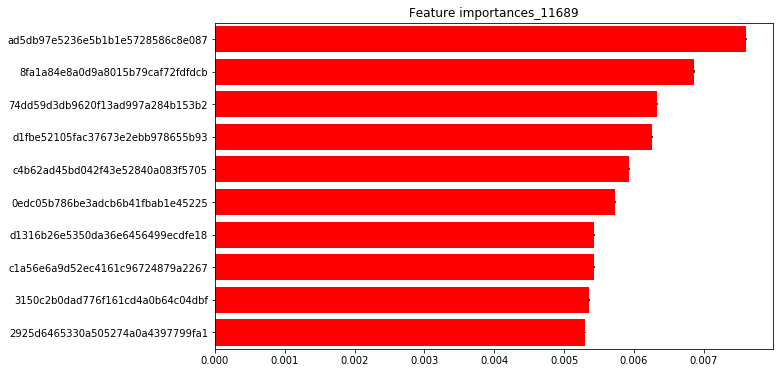

In [139]:
fig, ax = plt.subplots(figsize=(10,6))

plt.title("Feature importances_11689")
ax.barh(range(X_train_11689.shape[1]), importances_11689[indices_11689],
        color="r", yerr=std_11689[indices_11689])
plt.yticks(range(X_train_11689.shape[1]), [feature_names_11689[i] for i in indices_11689])
ax.set_ylim([-0.5,9.5])
ax.invert_yaxis() 
plt.show()

## Study PRJEB15093 ENA 

In [140]:
rel_feature_table_15093 = pd.read_csv('rel-feature-table-PRJEB15093.tsv', sep='\t')
rel_feature_table_15093.set_index('#OTU ID', inplace=True)
rel_feature_table_15093.head()

,ERR2233229,ERR2233230,ERR2233231,ERR2233232,ERR2233233,ERR2233234,ERR2233235,ERR2233236,ERR2233237,ERR2233238,...,ERR2233317,ERR2233318,ERR2233319,ERR2233320,ERR2233321,ERR2233322,ERR2233323,ERR2233324,ERR2233325,ERR2233326
#OTU ID,,,,,,,,,,,,,,,,,,,,,
ac164649e33237f799c1ffee4f344d5d,0.0,0.0,0.0,0.122471,0.0,0.150123,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.096154,0.066667,0.0,0.0,0.0
d509392ff84091c6dc20167e4169ec66,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1e716566f31283625b594cdbb6a02c21,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
076e6e3664a7f92c3890096c31d6d23e,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
61969e23b798da778708ed62bd1ec109,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [141]:
metadata_15093 = pd.read_csv('Metadata_PRJEB15093.tsv', sep='\t')
metadata_15093.head()

,#SampleID,sample_accession,experiment_accession,tax_id,scientific_name,instrument_model,geographic_location,library_name,site_name,sample_description,...,library_strategy,library_source,library_selection,base_count,center_name,first_public,experiment_title,study_title,sample_title,first_created
0,ERR2233229,SAMEA104452298,ERX2286208,408172,marine metagenome,Illumina MiSeq,"Sheepscot River, Maine",EddyWB_2,The Eddy,Worm burrow,...,AMPLICON,METAGENOMIC,PCR,47492293,BIGELOW LABORATORY FOR OCEAN SCIENCES,1/4/2018,Illumina MiSeq paired end sequencing,Biological rejuvenation of iron oxides in biot...,bioturb_EddyWB_2,1/3/2018
1,ERR2233230,SAMEA104452299,ERX2286209,408172,marine metagenome,Illumina MiSeq,"Sheepscot River, Maine",EddyFeS2_2,The Eddy,sediment,...,AMPLICON,METAGENOMIC,PCR,40871307,BIGELOW LABORATORY FOR OCEAN SCIENCES,1/4/2018,Illumina MiSeq paired end sequencing,Biological rejuvenation of iron oxides in biot...,bioturb_EddyFeS2_2,1/3/2018
2,ERR2233231,SAMEA104452300,ERX2286210,408172,marine metagenome,Illumina MiSeq,"Sheepscot River, Maine",Eddy WB 1 cm,The Eddy,Worm burrow,...,AMPLICON,METAGENOMIC,PCR,36047338,BIGELOW LABORATORY FOR OCEAN SCIENCES,1/4/2018,Illumina MiSeq paired end sequencing,Biological rejuvenation of iron oxides in biot...,bioturb_Eddy WB 1 cm,1/3/2018
3,ERR2233232,SAMEA104452301,ERX2286211,408172,marine metagenome,Illumina MiSeq,"Sheepscot River, Maine",Eddy WB 2 cm,The Eddy,Worm burrow,...,AMPLICON,METAGENOMIC,PCR,34964339,BIGELOW LABORATORY FOR OCEAN SCIENCES,1/4/2018,Illumina MiSeq paired end sequencing,Biological rejuvenation of iron oxides in biot...,bioturb_Eddy WB 2 cm,1/3/2018
4,ERR2233233,SAMEA104452302,ERX2286212,408172,marine metagenome,Illumina MiSeq,"Sheepscot River, Maine",Eddy WB 3 cm,The Eddy,Worm burrow,...,AMPLICON,METAGENOMIC,PCR,35630998,BIGELOW LABORATORY FOR OCEAN SCIENCES,1/4/2018,Illumina MiSeq paired end sequencing,Biological rejuvenation of iron oxides in biot...,bioturb_Eddy WB 3 cm,1/3/2018


### Removing Rare Features/OTUs

In [142]:
rel_feature_table_15093['non_zero_percent'] = rel_feature_table_15093.apply(lambda 
                                                                          row: non_zero(row), axis=1)
rel_feature_table_15093 = rel_feature_table_15093[rel_feature_table_15093.non_zero_percent > 20]
rel_feature_table_15093.drop('non_zero_percent', axis=1, inplace=True)
rel_feature_table_15093.head()

,ERR2233229,ERR2233230,ERR2233231,ERR2233232,ERR2233233,ERR2233234,ERR2233235,ERR2233236,ERR2233237,ERR2233238,...,ERR2233317,ERR2233318,ERR2233319,ERR2233320,ERR2233321,ERR2233322,ERR2233323,ERR2233324,ERR2233325,ERR2233326
#OTU ID,,,,,,,,,,,,,,,,,,,,,
d509392ff84091c6dc20167e4169ec66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
076e6e3664a7f92c3890096c31d6d23e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6ab73c4f04811cce50c13f7fe0221df5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7202fe403bae1f219c232f96e4741efd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
efacdb6e44d89e0e60627a1a3616485f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Renormalize to get sum of features (here relative abundance) equal to one for each sample

In [143]:
rel_feature_table_15093 = rel_feature_table_15093.div(rel_feature_table_15093.sum(axis=1), axis=0)
#rel_feature_table_15093['sum'] = rel_feature_table_15093.sum(axis=1)
#rel_feature_table_15093.drop('sum', axis=1, inplace=True)

#### Transforming data (standardize) by converting to z-score 

In [144]:
rel_feature_table_15093_zscore = rel_feature_table_15093.apply(zscore)
rel_feature_table_15093_zscore.head()

C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


,ERR2233229,ERR2233230,ERR2233231,ERR2233232,ERR2233233,ERR2233234,ERR2233235,ERR2233236,ERR2233237,ERR2233238,...,ERR2233317,ERR2233318,ERR2233319,ERR2233320,ERR2233321,ERR2233322,ERR2233323,ERR2233324,ERR2233325,ERR2233326
#OTU ID,,,,,,,,,,,,,,,,,,,,,
d509392ff84091c6dc20167e4169ec66,-0.984824,-1.218898,-1.151693,-1.127478,-1.206309,-1.184965,-1.234325,-1.265375,-0.975862,-1.022891,...,-0.347112,-0.320557,-0.304588,-0.322082,-0.271814,NaN,-0.055044,NaN,NaN,NaN
076e6e3664a7f92c3890096c31d6d23e,-0.984824,-1.218898,-1.151693,-1.127478,-1.206309,-1.184965,-1.234325,-1.265375,-0.975862,-1.022891,...,-0.347112,-0.320557,-0.304588,-0.322082,-0.271814,NaN,-0.055044,NaN,NaN,NaN
6ab73c4f04811cce50c13f7fe0221df5,-0.984824,-1.218898,-1.151693,-1.127478,-1.206309,-1.184965,-1.234325,-1.265375,-0.975862,-1.022891,...,-0.347112,-0.320557,-0.304588,-0.322082,-0.271814,NaN,-0.055044,NaN,NaN,NaN
7202fe403bae1f219c232f96e4741efd,-0.984824,-1.218898,-1.151693,-1.127478,-1.206309,-1.184965,-1.234325,-1.265375,-0.975862,-1.022891,...,-0.347112,-0.320557,-0.304588,-0.322082,-0.271814,NaN,-0.055044,NaN,NaN,NaN
efacdb6e44d89e0e60627a1a3616485f,-0.984824,-1.218898,-1.151693,-1.127478,-1.206309,-1.184965,-1.234325,-1.265375,-0.975862,-1.022891,...,-0.347112,-0.320557,-0.304588,-0.322082,-0.271814,NaN,-0.055044,NaN,NaN,NaN


In [145]:
rel_feature_table_15093_transpose = rel_feature_table_15093_zscore.transpose()
rel_feature_table_15093_transpose.reset_index(inplace=True)
rel_feature_table_15093_transpose.head()

#OTU ID,index,d509392ff84091c6dc20167e4169ec66,076e6e3664a7f92c3890096c31d6d23e,6ab73c4f04811cce50c13f7fe0221df5,7202fe403bae1f219c232f96e4741efd,efacdb6e44d89e0e60627a1a3616485f,cd2ac5683cff81e9114db5ca62ea0faa,25982fd0742e2639f6ef52ea4405a89e,b2fd574e7ae74800b915b4d2c9ac1703,d9088c187fe0f71e0ab8615cc7f695bf,...,77ffcddaa9c28515979126f423cd1426,acc2635be71b67ee02481449cc40463e,ecc24577b83372b9e74650c592451456,b2d182384dfc201cc404a9f41382084c,18d939e901d52839be5d8347c8bbb137,6d962ccbb6dc6480f93025bb1348fd3f,49989d5e34ac9e8db4a99d053bf0a2ff,ea755980748b381bb3f799ff7e08dfea,172e041e2317eaa4555d6da1e0d6f726,8f0af5af8019a944f5afaeefd7195dca
0,ERR2233229,-0.984824,-0.984824,-0.984824,-0.984824,-0.984824,-0.395557,0.864115,-0.041529,0.394814,...,-0.145429,2.075272,-0.984824,-0.984824,-0.984824,1.512835,0.175693,-0.984824,3.498744,-0.984824
1,ERR2233230,-1.218898,-1.218898,-1.218898,-1.218898,-1.218898,-0.018160,0.273691,0.078080,-0.046217,...,0.072347,-1.218898,-1.218898,-1.218898,1.841252,1.251060,1.905249,-0.736526,0.720908,-1.218898
2,ERR2233231,-1.151693,-1.151693,-1.151693,-1.151693,-1.151693,-0.734404,0.952598,-0.028366,0.299352,...,2.624903,-1.151693,0.358505,1.520065,-0.338035,-0.276049,2.171004,-1.151693,-0.463998,1.161423
3,ERR2233232,-1.127478,-1.127478,-1.127478,-1.127478,-1.127478,-0.571288,1.002379,0.090495,0.370280,...,2.341970,1.149199,0.398634,0.801031,0.928103,1.084700,1.750560,2.501562,-1.127478,0.041268
4,ERR2233233,-1.206309,-1.206309,-1.206309,-1.206309,-1.206309,-0.649052,0.174448,-0.062614,0.555648,...,1.211163,1.437628,1.452135,1.097284,0.021381,-1.206309,1.181053,-0.174197,4.327722,-1.206309


In [146]:
category_metadata_15093 = metadata_15093[['#SampleID', 'geographic_location']]
category_metadata_15093.head()

,#SampleID,geographic_location
0,ERR2233229,"Sheepscot River, Maine"
1,ERR2233230,"Sheepscot River, Maine"
2,ERR2233231,"Sheepscot River, Maine"
3,ERR2233232,"Sheepscot River, Maine"
4,ERR2233233,"Sheepscot River, Maine"


In [147]:
rel_abundance_with_category_15093 = pd.merge(rel_feature_table_15093_transpose,category_metadata_15093, 
                                           left_on = 'index', right_on='#SampleID')
rel_abundance_with_category_15093.set_index('#SampleID',inplace=True)
rel_abundance_with_category_15093.drop('index',axis=1, inplace=True)
rel_abundance_with_category_15093.head()

,d509392ff84091c6dc20167e4169ec66,076e6e3664a7f92c3890096c31d6d23e,6ab73c4f04811cce50c13f7fe0221df5,7202fe403bae1f219c232f96e4741efd,efacdb6e44d89e0e60627a1a3616485f,cd2ac5683cff81e9114db5ca62ea0faa,25982fd0742e2639f6ef52ea4405a89e,b2fd574e7ae74800b915b4d2c9ac1703,d9088c187fe0f71e0ab8615cc7f695bf,5eea14d9885768eafe3cd046a6e975a7,...,acc2635be71b67ee02481449cc40463e,ecc24577b83372b9e74650c592451456,b2d182384dfc201cc404a9f41382084c,18d939e901d52839be5d8347c8bbb137,6d962ccbb6dc6480f93025bb1348fd3f,49989d5e34ac9e8db4a99d053bf0a2ff,ea755980748b381bb3f799ff7e08dfea,172e041e2317eaa4555d6da1e0d6f726,8f0af5af8019a944f5afaeefd7195dca,geographic_location
#SampleID,,,,,,,,,,,,,,,,,,,,,
ERR2233229,-0.984824,-0.984824,-0.984824,-0.984824,-0.984824,-0.395557,0.864115,-0.041529,0.394814,-0.984824,...,2.075272,-0.984824,-0.984824,-0.984824,1.512835,0.175693,-0.984824,3.498744,-0.984824,"Sheepscot River, Maine"
ERR2233230,-1.218898,-1.218898,-1.218898,-1.218898,-1.218898,-0.018160,0.273691,0.078080,-0.046217,-1.218898,...,-1.218898,-1.218898,-1.218898,1.841252,1.251060,1.905249,-0.736526,0.720908,-1.218898,"Sheepscot River, Maine"
ERR2233231,-1.151693,-1.151693,-1.151693,-1.151693,-1.151693,-0.734404,0.952598,-0.028366,0.299352,-1.151693,...,-1.151693,0.358505,1.520065,-0.338035,-0.276049,2.171004,-1.151693,-0.463998,1.161423,"Sheepscot River, Maine"
ERR2233232,-1.127478,-1.127478,-1.127478,-1.127478,-1.127478,-0.571288,1.002379,0.090495,0.370280,-1.127478,...,1.149199,0.398634,0.801031,0.928103,1.084700,1.750560,2.501562,-1.127478,0.041268,"Sheepscot River, Maine"
ERR2233233,-1.206309,-1.206309,-1.206309,-1.206309,-1.206309,-0.649052,0.174448,-0.062614,0.555648,-1.206309,...,1.437628,1.452135,1.097284,0.021381,-1.206309,1.181053,-0.174197,4.327722,-1.206309,"Sheepscot River, Maine"


In [148]:
rel_abundance_with_category_15093['geographic_location'] = rel_abundance_with_category_15093['geographic_location'].astype('category')
rel_abundance_with_category_15093['geographic_location_num'] = rel_abundance_with_category_15093['geographic_location'].cat.codes
rel_abundance_with_category_15093.head()

,d509392ff84091c6dc20167e4169ec66,076e6e3664a7f92c3890096c31d6d23e,6ab73c4f04811cce50c13f7fe0221df5,7202fe403bae1f219c232f96e4741efd,efacdb6e44d89e0e60627a1a3616485f,cd2ac5683cff81e9114db5ca62ea0faa,25982fd0742e2639f6ef52ea4405a89e,b2fd574e7ae74800b915b4d2c9ac1703,d9088c187fe0f71e0ab8615cc7f695bf,5eea14d9885768eafe3cd046a6e975a7,...,ecc24577b83372b9e74650c592451456,b2d182384dfc201cc404a9f41382084c,18d939e901d52839be5d8347c8bbb137,6d962ccbb6dc6480f93025bb1348fd3f,49989d5e34ac9e8db4a99d053bf0a2ff,ea755980748b381bb3f799ff7e08dfea,172e041e2317eaa4555d6da1e0d6f726,8f0af5af8019a944f5afaeefd7195dca,geographic_location,geographic_location_num
#SampleID,,,,,,,,,,,,,,,,,,,,,
ERR2233229,-0.984824,-0.984824,-0.984824,-0.984824,-0.984824,-0.395557,0.864115,-0.041529,0.394814,-0.984824,...,-0.984824,-0.984824,-0.984824,1.512835,0.175693,-0.984824,3.498744,-0.984824,"Sheepscot River, Maine",8
ERR2233230,-1.218898,-1.218898,-1.218898,-1.218898,-1.218898,-0.018160,0.273691,0.078080,-0.046217,-1.218898,...,-1.218898,-1.218898,1.841252,1.251060,1.905249,-0.736526,0.720908,-1.218898,"Sheepscot River, Maine",8
ERR2233231,-1.151693,-1.151693,-1.151693,-1.151693,-1.151693,-0.734404,0.952598,-0.028366,0.299352,-1.151693,...,0.358505,1.520065,-0.338035,-0.276049,2.171004,-1.151693,-0.463998,1.161423,"Sheepscot River, Maine",8
ERR2233232,-1.127478,-1.127478,-1.127478,-1.127478,-1.127478,-0.571288,1.002379,0.090495,0.370280,-1.127478,...,0.398634,0.801031,0.928103,1.084700,1.750560,2.501562,-1.127478,0.041268,"Sheepscot River, Maine",8
ERR2233233,-1.206309,-1.206309,-1.206309,-1.206309,-1.206309,-0.649052,0.174448,-0.062614,0.555648,-1.206309,...,1.452135,1.097284,0.021381,-1.206309,1.181053,-0.174197,4.327722,-1.206309,"Sheepscot River, Maine",8


## Random Forest PRJEB15093

In [149]:
X_train_15093, X_test_15093, y_train_15093, y_test_15093 = train_test_split(
    rel_abundance_with_category_15093.drop(['geographic_location', 'geographic_location_num'], axis=1).dropna(), 
    rel_abundance_with_category_15093.dropna()['geographic_location_num'], test_size=0.4, random_state=40)

rfc_15093 = RandomForestClassifier(n_estimators=502, random_state=np.random.seed(151), oob_score=True)
rfc_15093.fit(X_train_15093, y_train_15093)
rfc_pred_15093 = rfc_15093.predict(X_test_15093)

print(rfc_15093.oob_score_)

0.8928571428571429


In [150]:
print(confusion_matrix(y_test_15093,rfc_pred_15093))
print(classification_report(y_test_15093,rfc_pred_15093))

[[ 2  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0]
 [ 0  0  0  0  3  0  0  0]
 [ 0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.00      0.00         1
           3       0.91      1.00      0.95        10
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00        10

    accuracy                           0.97        38
   macro avg       0.86      0.88      0.87        38
weighted avg       0.95      0.97      0.96        38



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [151]:
accuracy_15093 = cross_val_score(rfc_15093, X_train_15093, y_train_15093, scoring='accuracy', cv = 10)
print(accuracy_15093.mean()*100)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


93.55555555555556


### Feature Selection

In [152]:
feature_names_15093 = rel_abundance_with_category_15093.drop(['geographic_location', 'geographic_location_num'], 
                                                      axis=1).columns
importances_15093 = rfc_15093.feature_importances_
std_15093 = np.std([tree.feature_importances_ for tree in rfc_15093.estimators_],
             axis=0)
indices_15093 = np.argsort(importances_15093)[::-1]
for i in range(20):
    print(str(i+1)+') ' , feature_names_15093[indices_15093[i]], 
          '(', importances_15093[indices_15093[i]], ')')

1)  dff1e5f99d2ba7ba900cd3177c97851d ( 0.013272289862424118 )
2)  76ae305dc46ab36e674a8c4ebc0f4740 ( 0.011797129123226705 )
3)  6ab73c4f04811cce50c13f7fe0221df5 ( 0.010807575594764222 )
4)  a9513e36980880a2a418796d9a4a795a ( 0.01043758015462896 )
5)  7202fe403bae1f219c232f96e4741efd ( 0.010287930825232036 )
6)  6360e85cff2ef9097432ed79c1b4ac4e ( 0.010279240921304382 )
7)  f97a7d83e3df202c7a2e8d765ee65b5d ( 0.009852796099675258 )
8)  e0769878c054165e5a99615b527edd92 ( 0.009834065895314435 )
9)  17ce7c681b78db270401052230d12f69 ( 0.0095788238675978 )
10)  9d074f399332ff62007192f99a9db0fb ( 0.009485197917804094 )
11)  3ecf29f36edf2776cfb9142d5a8c2645 ( 0.009311163665474782 )
12)  41d2418f8f4a8dbf84d62c10f60d5bda ( 0.009295494978127669 )
13)  a494ec30c5342a4a2743aaf45a64ced5 ( 0.008815499426736307 )
14)  07dd2c9efa67842146312b7af5d9e3b7 ( 0.008647671718407746 )
15)  30d04b916dccf036a9726aa306784795 ( 0.008647314302232548 )
16)  f9c694325ce817e4668a229fed7f8e23 ( 0.008518424641913595 )
17) 

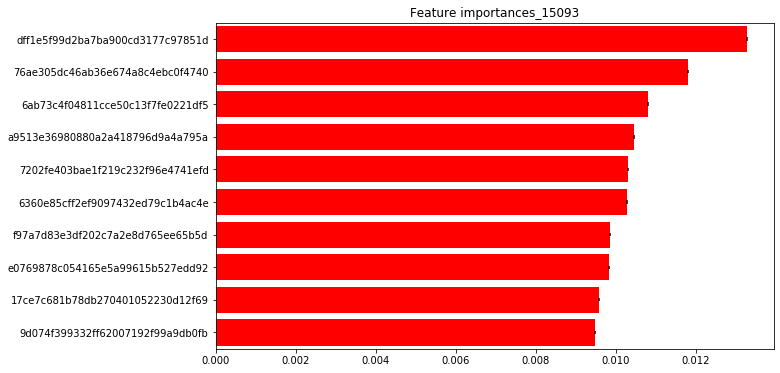

In [153]:
fig, ax = plt.subplots(figsize=(10,6))

plt.title("Feature importances_15093")
ax.barh(range(X_train_15093.shape[1]), importances_15093[indices_15093],
        color="r", yerr=std_15093[indices_15093])
plt.yticks(range(X_train_15093.shape[1]), [feature_names_15093[i] for i in indices_15093])
ax.set_ylim([-0.5,9.5])
ax.invert_yaxis() 
plt.show()